# FINAL PROJECT

## 1. Data Collection
The dataset used in this project is **CDC Diabetes Health Indicators**, which contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes.

The dataset source can be found on **UC Irvine Machine Learning Repository** ([UCI Dataset URL](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)), or **Kaggle** ([Kaggle Dataset URL](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)). The dataset is a cleaned and consolidated by Alex Teboul from the original **CDC's BRFSS 2015**.

Regarding license, the dataset is marked as **CC0: Public Domain**, which means it can be used freely without asking permission.

The original data is collected from a random sample of adults (one per household) through a telephone survey across over 400,000 U.S. citizens regarding their health-related risk behaviors, chronic health conditions, and use of preventive services in the year of 2015. The cleaned data is processed by selecting features related to diabetes disease and other chronic health conditions only.

Our group has an interest in medical and healthcare-related datasets, therefore we chose this dataset to process. The dataset has the potential to provide insights about what and how factors contribute to the form of chronic health conditions.

### Import Libraries

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891).data.original

## 2. Data Exploration

### Dataset Overview

#### Basic Information

In [3]:
cdc_diabetes_health_indicators.shape

(253680, 23)

In [4]:
cdc_diabetes_health_indicators.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
total_size = cdc_diabetes_health_indicators.memory_usage(deep=True).sum()

print(f"Dataset Size: {total_size / (1024**2):.2f} MB")

Dataset Size: 44.51 MB


The dataset has 253680 rows, 22 columns, all of which taking 42.58MB.

#### Data Integrity

In [6]:
cdc_diabetes_health_indicators.duplicated().sum()

0

In [7]:
print("Missing values per column:")
print(cdc_diabetes_health_indicators.isnull().sum())
print("\nTotal missing values:", cdc_diabetes_health_indicators.isnull().sum().sum())
print("\nRows with at least one missing value:", cdc_diabetes_health_indicators.isnull().any(axis=1).sum())

Missing values per column:
ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Total missing values: 0

Rows with at least one missing value: 0


There are some duplicated rows, we will now removing them, as they are considered duplicated persons taking tests multiple times.

In [8]:
cdc_diabetes_health_indicators = cdc_diabetes_health_indicators.drop_duplicates()
print(f"Dataset shape after removing duplicates: {cdc_diabetes_health_indicators.shape}")

Dataset shape after removing duplicates: (253680, 23)


#### Column Inventory

In [9]:
print(cdc_diabetes_health_indicators.columns)

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


| Column Name            | Data Type | Meaning/Definition                                                                 | Relevant for Analysis?          | Should it be Dropped?      |
|------------------------|-----------|------------------------------------------------------------------------------------|---------------------------------|---------------------------|
| ID                     | int64     | Unique identifier for each respondent                                              | No                              | Yes (identifier only)     |
| Diabetes_binary        | int64     | Target variable: 0 = no diabetes, 1 = prediabetes or diabetes                      | Yes                             | No (target variable)      |
| HighBP                 | int64     | High blood pressure: 0 = no, 1 = yes                                               | Yes                             | No (predictor)            |
| HighChol               | int64     | High cholesterol: 0 = no, 1 = yes                                                  | Yes                             | No (predictor)            |
| CholCheck              | int64     | Cholesterol check in past 5 years: 0 = no, 1 = yes                                 | Yes                             | No (predictor)            |
| BMI                    | int64     | Body Mass Index (weight in kg / height in m²)                                       | Yes                             | No (predictor)            |
| Smoker                 | int64     | Have smoked at least 100 cigarettes in lifetime: 0 = no, 1 = yes                   | Yes                             | No (predictor)            |
| Stroke                 | int64     | Ever told had a stroke: 0 = no, 1 = yes                                            | Yes                             | No (predictor)            |
| HeartDiseaseorAttack   | int64     | Coronary heart disease or myocardial infarction: 0 = no, 1 = yes                   | Yes                             | No (predictor)            |
| PhysActivity           | int64     | Physical activity in past 30 days (not job-related): 0 = no, 1 = yes                | Yes                             | No (predictor)            |
| Fruits                 | int64     | Consume fruit 1+ times per day: 0 = no, 1 = yes                                    | Yes                             | No (predictor)            |
| Veggies                | int64     | Consume vegetables 1+ times per day: 0 = no, 1 = yes                                | Yes                             | No (predictor)            |
| HvyAlcoholConsump      | int64     | Heavy alcohol consumption (adult men >14 drinks/week, women >7 drinks/week): 0 = no, 1 = yes | Yes                             | No (predictor)            |
| AnyHealthcare          | int64     | Have any health care coverage: 0 = no, 1 = yes                                     | Yes                             | No (predictor)            |
| NoDocbcCost            | int64     | Could not see doctor due to cost in past 12 months: 0 = no, 1 = yes                | Yes                             | No (predictor)            |
| GenHlth                | int64     | General health rating: scale 1-5 (1 = excellent, 5 = poor)                          | Yes                             | No (predictor)            |
| MentHlth               | int64     | Number of days mental health was not good in past 30 days (0-30)                   | Yes                             | No (predictor)            |
| PhysHlth               | int64     | Number of days physical health was not good in past 30 days (0-30)                 | Yes                             | No (predictor)            |
| DiffWalk               | int64     | Serious difficulty walking or climbing stairs: 0 = no, 1 = yes                      | Yes                             | No (predictor)            |
| Sex                    | int64     | Sex: 0 = female, 1 = male                                                          | Yes                             | No (predictor)            |
| Age                    | int64     | Age category: 13-level age category (1 = 18-24, 13 = 80+)                          | Yes                             | No (predictor)            |
| Education              | int64     | Education level: scale 1-6 (1 = never attended school, 6 = college graduate)       | Yes                             | No (predictor)            |
| Income                 | int64     | Income level: scale 1-8 (1 = <$10,000, 8 = $75,000+)                                | Yes                             | No (predictor)            |

From our perspective, all columns are relevant to potential analysis, except `ID`.

In [10]:
cdc_diabetes_health_indicators.drop(columns=['ID'], inplace=True)

#### Data Types

In [11]:
cdc_diabetes_health_indicators.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

The data types of all columns seems appropriate.

### Numerical Column Analysis

In [12]:
numeric_columns = ['BMI', 'PhysHlth', 'MentHlth']

#### Distribution and Central Tendency

In [13]:
cdc_diabetes_health_indicators[numeric_columns].describe()

,BMI,PhysHlth,MentHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,4.242081,3.184772
std,6.608694,8.717951,7.412847
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,3.000000,2.000000
max,98.000000,30.000000,30.000000


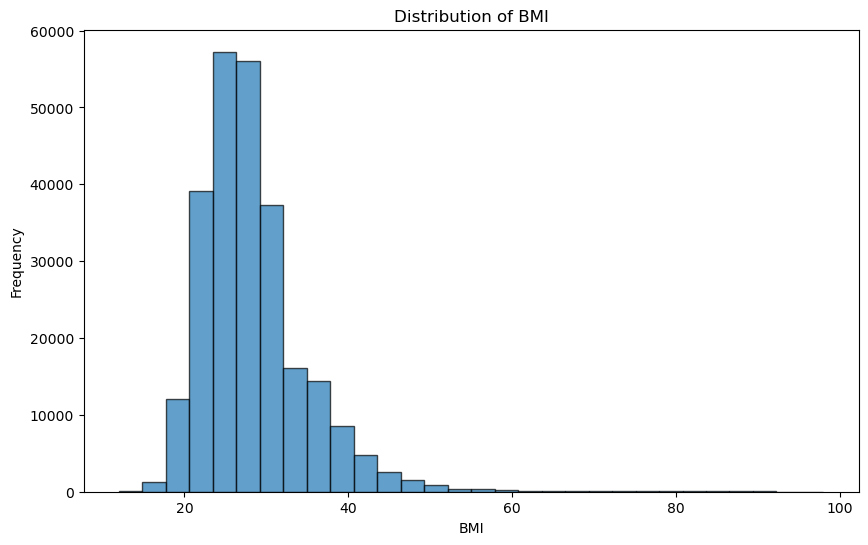

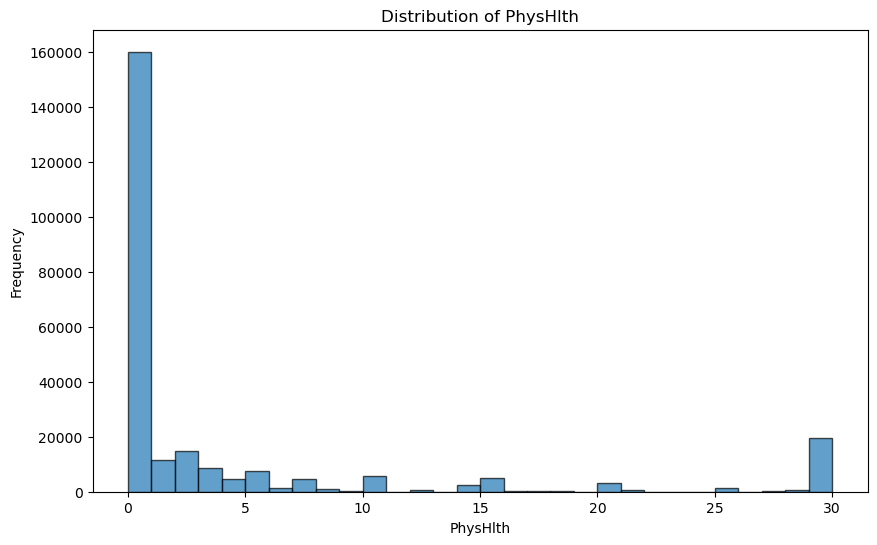

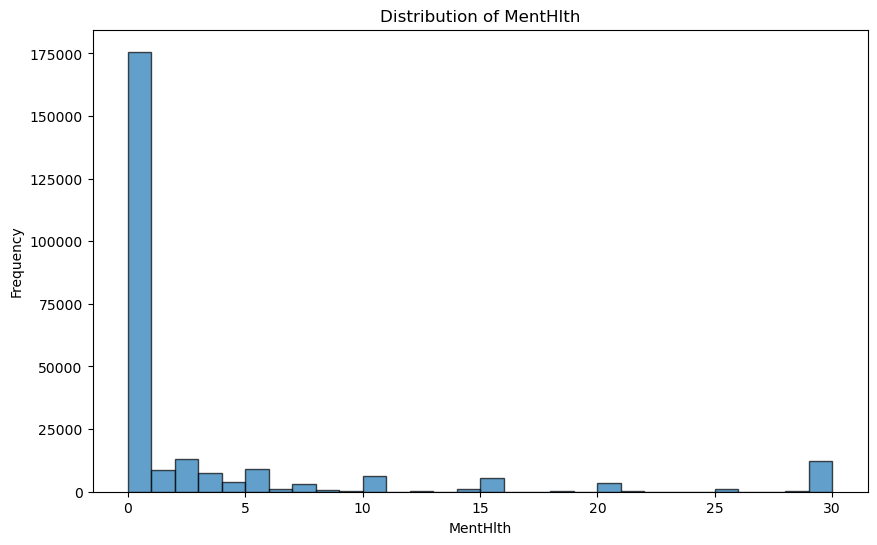

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(cdc_diabetes_health_indicators[col], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Range & Outliers

In [15]:
# check min/max values for plain numeric columns
for col in numeric_columns:
    print(f"{col} - min: {cdc_diabetes_health_indicators[col].min()}, max: {cdc_diabetes_health_indicators[col].max()}")

BMI - min: 12, max: 98
PhysHlth - min: 0, max: 30
MentHlth - min: 0, max: 30


The min/max values seem reasonable, as the data is retrieved within US territory, where the proportion of people with obesity is high.

In [16]:
# Calculate Q1, Q3, and IQR for BMI
Q1 = cdc_diabetes_health_indicators['BMI'].quantile(0.25)
Q3 = cdc_diabetes_health_indicators['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cdc_diabetes_health_indicators[(cdc_diabetes_health_indicators['BMI'] < lower_bound) | (cdc_diabetes_health_indicators['BMI'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(cdc_diabetes_health_indicators)) * 100:.2f}%")

Q1 (25th percentile): 24.00
Q3 (75th percentile): 31.00
IQR: 7.00
Lower Bound: 13.50
Upper Bound: 41.50

Number of outliers: 9847
Percentage of outliers: 3.88%


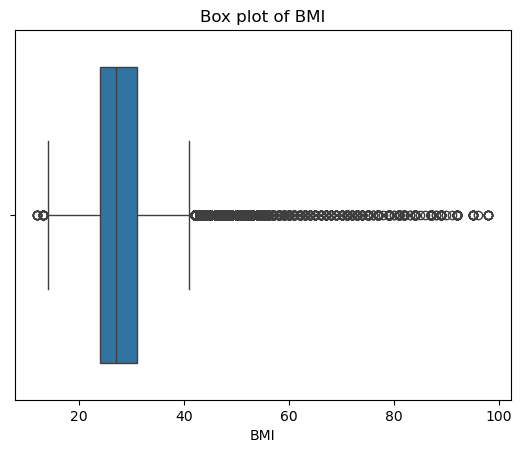

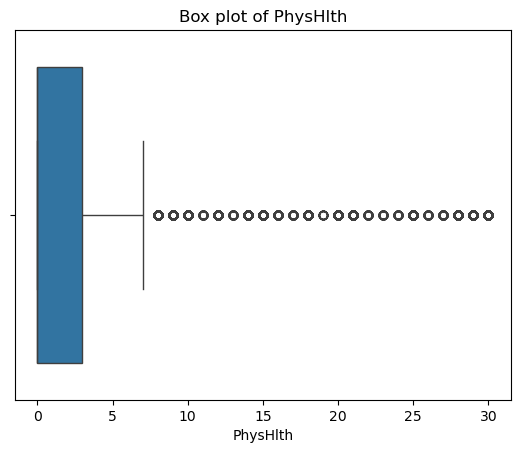

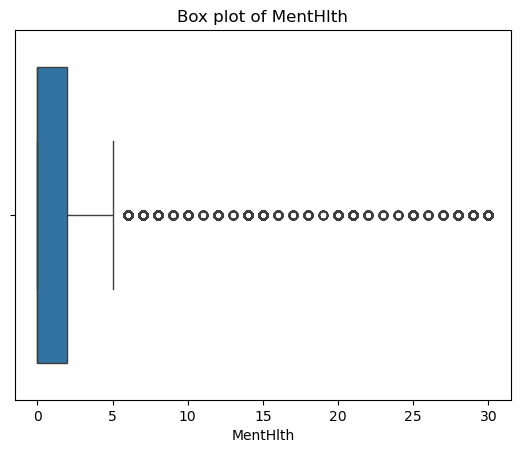

In [17]:
# Create box plots for plain numeric columns to identify outliers
for col in numeric_columns:
    sns.boxplot(data=cdc_diabetes_health_indicators, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()

All exhibit strongly positively skewed distributions.

BMI:
- Interquartile range (IQR) is narrow, centered around typical adults value (~20-30).
- Median ≈ 26–27.
- Long right tail with numerous points flagged as outliers extending to ~100.
- Reflects the common pattern in population data: most individuals have moderate BMI, while a smaller group has severe obesity.

PhysHlth and MentHlth:
- Both are nearly identical in shape.
- Majority of values cluster at or near 0 (most people report few or no bad health days).
- Very small IQR (typically 0 to ~2–3).
- Median close to 0.
- Long upper whisker and many outliers extending to the maximum of 30.
- Indicates that while most respondents enjoy good physical/mental health, a subset experiences frequent poor health days.

The numerous points marked as outliers are valid and expected. These represent genuine cases (severe obesity, chronic conditions, mental health challenges) rather than data errors.


#### Data Quality

There are no missing values, impossible values, or placeholder values (as min/max values indicated no existance)

### Categorical Column Analysis

The categorical columns are every columns except `BMI`, `PhysHlth`, and `MentHlth`.

In [18]:
categorical_cols = [col for col in cdc_diabetes_health_indicators.columns if col not in numeric_columns]

#### Value Distribution

In [19]:
print("Top 5 most frequent values for each categorical column:\n")
for col in categorical_cols:
    print(cdc_diabetes_health_indicators[col].value_counts().head(5))
    print()

Top 5 most frequent values for each categorical column:

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

HighBP
0    144851
1    108829
Name: count, dtype: int64

HighChol
0    146089
1    107591
Name: count, dtype: int64

CholCheck
1    244210
0      9470
Name: count, dtype: int64

Smoker
0    141257
1    112423
Name: count, dtype: int64

Stroke
0    243388
1     10292
Name: count, dtype: int64

HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64

PhysActivity
1    191920
0     61760
Name: count, dtype: int64

Fruits
1    160898
0     92782
Name: count, dtype: int64

Veggies
1    205841
0     47839
Name: count, dtype: int64

HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64

AnyHealthcare
1    241263
0     12417
Name: count, dtype: int64

NoDocbcCost
0    232326
1     21354
Name: count, dtype: int64

GenHlth
2    89084
3    75646
1    45299
4    31570
5    12081
Name: count, dtype: int64

DiffWalk
0    211005
1     42675
Name: co

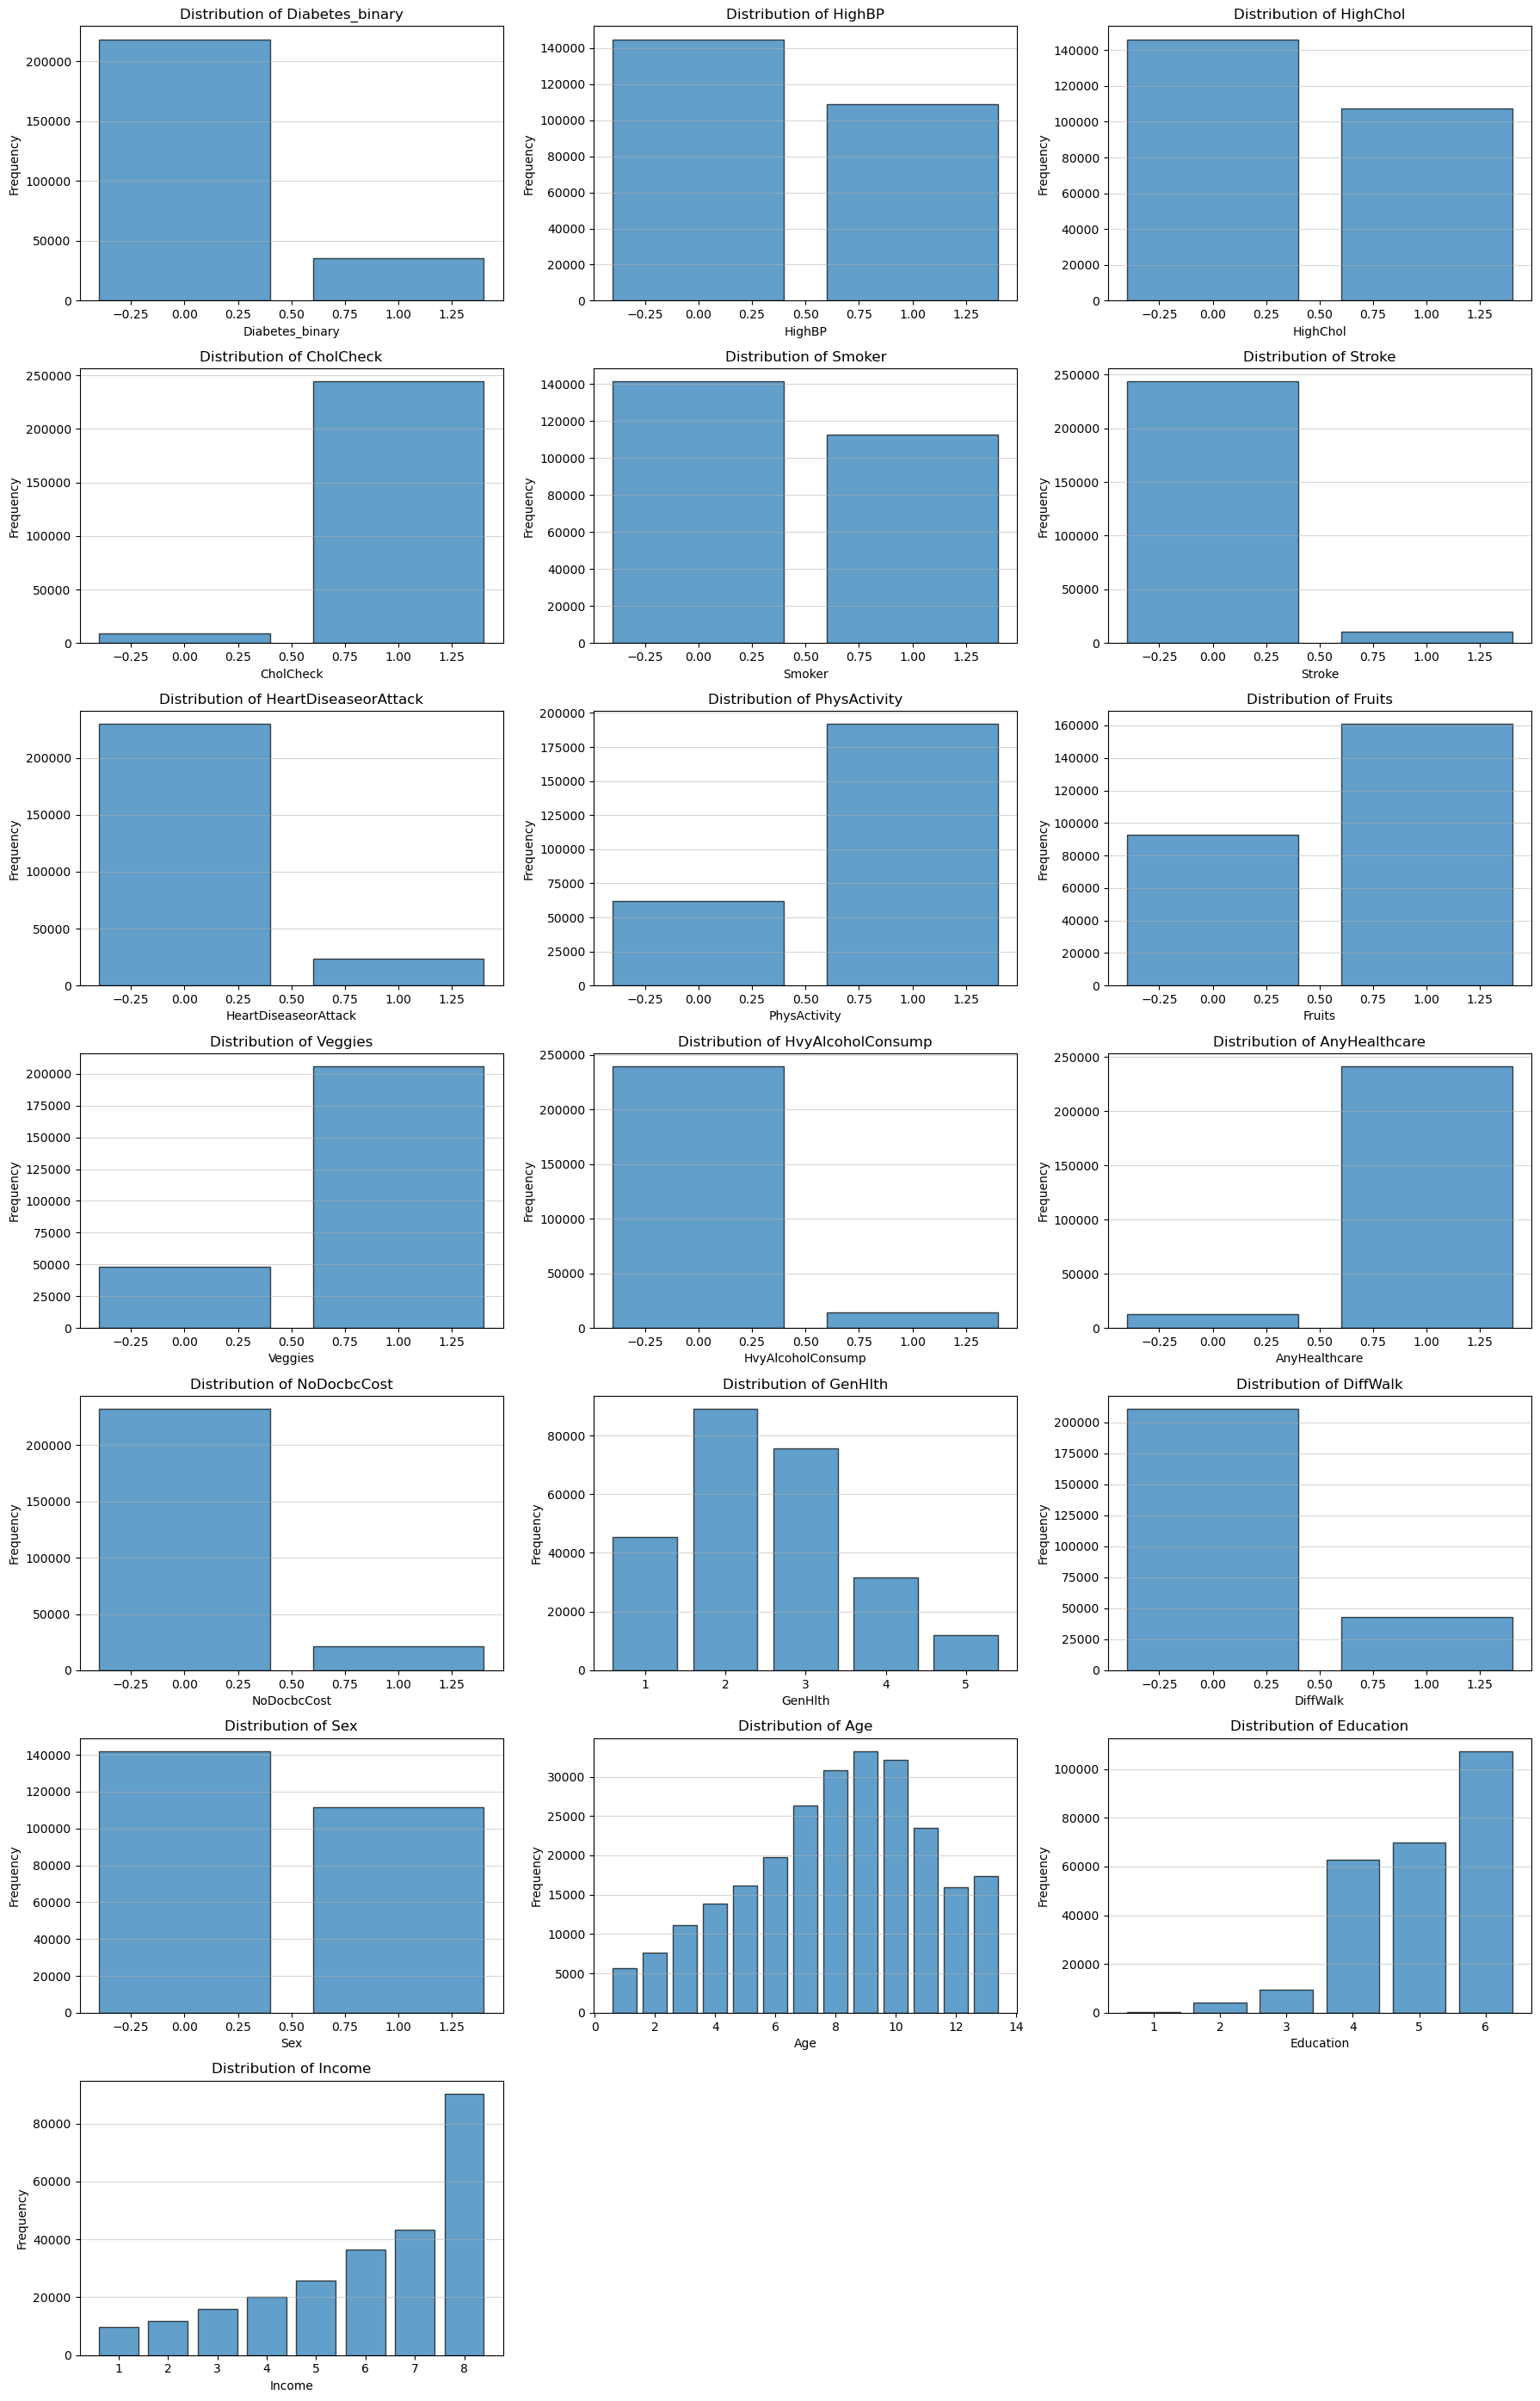

In [20]:
# Create bar charts for all categorical columns 

num_cols = len(categorical_cols)
num_rows = int(np.ceil(num_cols / 3))

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = cdc_diabetes_health_indicators[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(axis='y', alpha=0.5)

# Hide any unused subplots
for idx in range(num_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Data Quality

In [21]:
# Verify all values are 0 and 1 only
for col in categorical_cols:
    unique_values = cdc_diabetes_health_indicators[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Diabetes_binary: [0 1]
Unique values in HighBP: [1 0]
Unique values in HighChol: [1 0]
Unique values in CholCheck: [1 0]
Unique values in Smoker: [1 0]
Unique values in Stroke: [0 1]
Unique values in HeartDiseaseorAttack: [0 1]
Unique values in PhysActivity: [0 1]
Unique values in Fruits: [0 1]
Unique values in Veggies: [1 0]
Unique values in HvyAlcoholConsump: [0 1]
Unique values in AnyHealthcare: [1 0]
Unique values in NoDocbcCost: [0 1]
Unique values in GenHlth: [5 3 2 4 1]
Unique values in DiffWalk: [1 0]
Unique values in Sex: [0 1]
Unique values in Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Unique values in Education: [4 6 3 5 2 1]
Unique values in Income: [3 1 8 6 4 7 2 5]


In [22]:
# Check for class imbalance in target variable 'Diabetes_012'
target_counts = cdc_diabetes_health_indicators['Diabetes_binary'].value_counts(normalize=True) * 100
print("Class distribution in 'Diabetes_binary':")
print(target_counts)

Class distribution in 'Diabetes_binary':
Diabetes_binary
0    86.066698
1    13.933302
Name: proportion, dtype: float64


There is no missing value.

### Missing Data Analysis

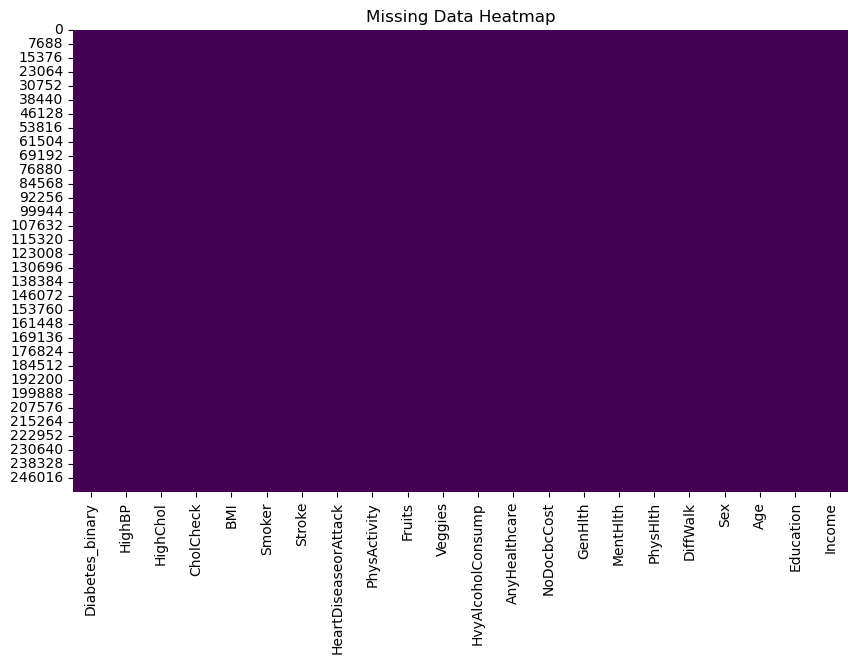

In [23]:
# A heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(cdc_diabetes_health_indicators.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [24]:
# Bar chart to show missing data counts
missing_counts = cdc_diabetes_health_indicators.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

There is no missing value.

### Relationships & Correlations

#### Preliminary Patterns

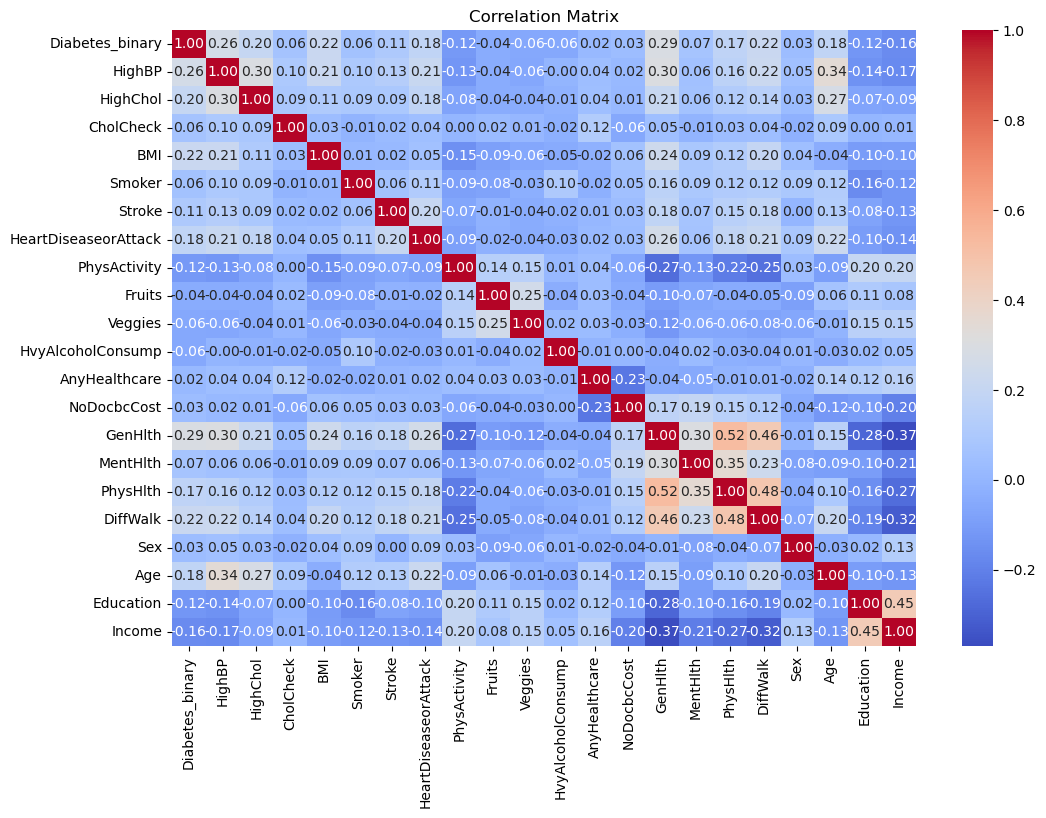

In [25]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix = cdc_diabetes_health_indicators.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Features correlated with Diabetes_binary:
- HighBP (0.26)
- HighChol (0.20)
- BMI (0.22)
- Age (0.18)
- DiffWalk (0.22)
- PhysHlth (0.17)
- HeartDiseaseorAttack (0.18)

#### Cross-tabulations

In [26]:
# Create crosstabs for:
# Diabetes vs HighBP
# Diabetes vs HighChol
# Diabetes vs Smoker
# Diabetes vs PhysActivity
crosstab_highbp = pd.crosstab(cdc_diabetes_health_indicators['Diabetes_binary'], cdc_diabetes_health_indicators['HighBP'])
crosstab_highchol = pd.crosstab(cdc_diabetes_health_indicators['Diabetes_binary'], cdc_diabetes_health_indicators['HighChol'])
crosstab_smoker = pd.crosstab(cdc_diabetes_health_indicators['Diabetes_binary'], cdc_diabetes_health_indicators['Smoker'])
crosstab_physactivity = pd.crosstab(cdc_diabetes_health_indicators['Diabetes_binary'], cdc_diabetes_health_indicators['PhysActivity'])

# show crosstabs
print("Crosstab: Diabetes vs HighBP")
print(crosstab_highbp)
print("\nCrosstab: Diabetes vs HighChol")
print(crosstab_highchol)
print("\nCrosstab: Diabetes vs Smoker")
print(crosstab_smoker)
print("\nCrosstab: Diabetes vs PhysActivity")
print(crosstab_physactivity)

Crosstab: Diabetes vs HighBP
HighBP                0      1
Diabetes_binary               
0                136109  82225
1                  8742  26604

Crosstab: Diabetes vs HighChol
HighChol              0      1
Diabetes_binary               
0                134429  83905
1                 11660  23686

Crosstab: Diabetes vs Smoker
Smoker                0      1
Diabetes_binary               
0                124228  94106
1                 17029  18317

Crosstab: Diabetes vs PhysActivity
PhysActivity         0       1
Diabetes_binary               
0                48701  169633
1                13059   22287


### Initial Observations & Insights

#### Summary

**Key Observations:**

1. **Severe class imbalance:** Dataset contains ~86% non-diabetic vs ~14% diabetic/prediabetic individuals, which will require careful handling in machine learning models (stratified sampling, appropriate metrics).

2. **Strong health condition correlations:** High blood pressure (0.26), high cholesterol (0.20), and BMI (0.22) show the strongest correlations with diabetes, suggesting these are primary physiological risk factors.

3. **Lifestyle factor patterns:** Physical activity shows inverse relationship with diabetes - 75.7% of overall dataset is physically active, but among diabetics, only 63.0% are active (from crosstab: 22,287/(13,059+22,287)), indicating protective effect.

4. **Smoking paradox:** Smoking prevalence is similar between diabetic (51.8%) and non-diabetic (43.1%) groups, suggesting weaker individual effect than health conditions. However, interactions with other factors need investigation.

5. **BMI distribution differences:** Mean BMI in dataset is 28.4 (overweight category), with high variance (SD=6.6) and extreme outliers up to 98, reflecting U.S. obesity epidemic patterns.

6. **Age correlation:** Age shows moderate correlation (0.18) with diabetes, confirming diabetes as age-related chronic condition.

**Patterns Leading to Research Questions:**

- The combination of health conditions (HighBP, HighChol) suggests potential synergistic effects worth investigating
- Physical activity's protective pattern raises questions about its interaction with smoking and health conditions
- Different correlation strengths across features motivate feature importance analysis through ML

#### Red Flags

- **Critical: Severe class imbalance (86:14 ratio)** requires:
  - Stratified train/test splitting (already implemented ✓)
  - ROC-AUC as primary metric instead of accuracy
  - Potential use of class weights or SMOTE in models

- No missing values is surprisingly clean for health survey data - suggests heavy preprocessing by data authors

- Extreme BMI outliers (up to 98) are valid but rare cases that might disproportionately influence models

## 3. Question Formulation

### Questions

**Question 1:** Which features (among lifestyle factors, health conditions, and demographic variables) are most important for predicting diabetes risk?

**Motivation & Benefits:**
- Why worth investigating? Understanding which features drive diabetes risk can help healthcare providers prioritize screening and interventions
- Benefits:
    - Identify high-risk individuals more efficiently
    - Allocate resources to most impactful preventive measures
    - Inform public health campaigns
- Who cares? Healthcare providers, public health officials, insurance companies, at-risk individuals
- Real-world impact: Can improve early detection and prevention strategies, reducing healthcare costs

--- 

**Question 2:** How do lifestyle factors (smoking, physical activity) and health conditions (high BP, high cholesterol) interact to affect diabetes prevalence? Are combined effects more significant than individual factors?

**Motivation & Benefits:**
- Why worth investigating? Understanding interaction effects reveals whether combinations of risk factors multiply risk beyond individual contributions
- Benefits:
    - Identify highest-risk combinations (e.g., smoker + high BP + no physical activity)
    - Develop targeted intervention programs
    - Understand whether changing one factor (e.g., increasing physical activity) can offset other risks
- Who cares? Public health researchers, policy makers, primary care physicians, individuals managing multiple risk factors
- Real-world impact: Can inform personalized risk assessment and lifestyle modification recommendations

--- 

**Question 3:** How is Body Mass Index (BMI) associated with diabetes prevalence, and does this relationship vary across demographic groups?

**Motivation & Benefits:**
- **Why investigate:** BMI is a well-estalished risk factor for diabetes, but the strength and nature of this association may differ across demographic groups based on age or sex. Understanding the precise relationship in population-level data can inform targeted prevention strategies.
- **Benefits:** 
    - Quantifies the strength of the BMI-diabetes relationship overall and within subgroups.
    - Identifies which BMI categories have the highest diabetes risk.
    - Reveals whether certain demographic groups (age, sex) face different risk levels at the same BMI.
- **Stakeholders:** Public health officials can design demographic-specific prevention programs, healthcare policymakers can establish evidence-based screening criteria, community health workers can identify high-risk neighborhoods, and individuals can understand how their characteristics compare to population benchmarks.
- **Real-world impact:** This analysis can inform targeted health interventions, such as prioritizing weight management programs for high-risk BMI groups, tailoring screening recommendations by demographic characteristics, and guiding resource allocation for diabetes prevention efforts.

---

**Question 4:** How do smoking and heavy alcohol consumption relate to diabetes prevalebnce, and do these behavioral risk factors differ in their association with diabetes across income levels?

**Motivation & Benefits:**
- **Why investigate:** Smoking and heavy alcohol consumption are modifiable lifestyle factors that may contribute to diabetes risk. Examining their associations with diabetes prevalence across income levels can reveal socioeconomic disparities in health behaviors and outcomes.
- **Benefits:**
    - Identifies whether smoking and heavy alcohol consumption are significant risk factors for diabetes.
    - Reveals income-related disparities in how lifestyle behaviors affect diabetes risk.
    - Helps determine if behavioral interventions should be tailored differently for various socioeconomic groups.
- **Stakeholders:** Public health agencies can use this information to design targeted prevention campaigns, healthcare providers can better understand patient risk profiles, and researchers can study health disparities and social determinants of health.
- **Real-world impact:** This analysis can guide the development of income-sensitive diabetes prevention programs, inform targeted smoking cessation and alcohol reduction interventions for high-risk groups, and help address health inequities by identifying populations that may benefit most from behavioral health interventions.

--- 

**Question 5:** Can we build a predictive model to identify individuals at high risk of diabetes based on their lifestyle factors, health behaviors, and existing health conditions?

**Motivation & Benefits:**
- **Why investigate:** Diabetes affects over 37 million Americans, with many cases going undiagnosed until serious complications develop. Early identification of at-risk individuals can enable timely intervention and prevention.
- **Benefits:** A reliable predictive model can help healthcare systems implement proactive screening programs, identify high-risk populations for targeted interventions, and reduce healthcare costs associated with late-stage diabetes complications.
- **Stakeholders:** Healthcare providers can use this for patient risk stratification, public health officials can design targeted prevention campaigns, insurance companies can optimize wellness programs, and individuals can understand their personal risk factors.
- **Real-world impact:** Enables data-driven allocation of limited healthcare resources, supports personalized prevention strategies, and helps identify which modifiable lifestyle factors have the greatest impact on reducing diabetes risk.

---

**Question 6:** How does diabetes prevalence vary across different demographic groups and health behavior categories, and what are the critical threshold values where diabetes risk increases substantially?

**Motivation & Benefits:**
- **Why investigate:** Understanding population-level patterns and identifying specific thresholds (e.g., at what BMI level does diabetes prevalence spike) provides actionable insights for designing targeted screening guidelines and public health interventions without requiring complex predictive models.
- **Benefits:** Statistical analysis of prevalence rates across subgroups reveals which populations are most vulnerable, identifies health behavior cutoff points for risk stratification, and uncovers disparities that may require targeted interventions. This provides clear, interpretable benchmarks for clinical decision-making.
- **Stakeholders:** Public health officials can design demographic-specific prevention programs, healthcare policymakers can establish evidence-based screening criteria, community health workers can identify high-risk neighborhoods, and individuals can understand how their characteristics compare to population benchmarks.
- **Real-world impact:** Enables creation of simple risk assessment tools (e.g., "individuals with BMI > X and physical activity < Y days/week have Z% diabetes prevalence"), informs resource allocation to underserved populations with highest diabetes burden, and supports development of accessible public health messaging based on clear statistical patterns rather than complex algorithms.

## 4. Data Analysis

### Question 1

#### Preprocessing

In [27]:
# Split data
from sklearn.model_selection import train_test_split
X = cdc_diabetes_health_indicators.drop(columns=['Diabetes_binary'])
y = cdc_diabetes_health_indicators['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Analysis

Train multiple classification models (Logistic Regression, Decision Tree, Random Forest, etc.) to predict Diabetes_binary

Evaluate models using accuracy, precision, recall, F1-score, ROC-AUC, Confusion Matrix

Identify top features using feature importance from tree-based models or coefficients from logistic regression

Compare importance rankings across models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [29]:
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [30]:
# Display resultsfor model_name, metrics in results.items():
print(f"Results for {model_name}:")
for metric_name, value in results.items():
    print(f"  {metric_name}: {value}")
print()

Results for Random Forest:
  Logistic Regression: {'Accuracy': 0.8621294544307789, 'Precision': 0.517097966728281, 'Recall': 0.15829678879615222, 'F1-Score': 0.242391422072999, 'ROC-AUC': 0.819158364139657, 'Confusion Matrix': array([[42622,  1045],
       [ 5950,  1119]])}
  Decision Tree: {'Accuracy': 0.7978358561967833, 'Precision': 0.297920892494929, 'Recall': 0.33243740274437683, 'F1-Score': 0.31423413786187065, 'ROC-AUC': 0.6017193168388688, 'Confusion Matrix': array([[38129,  5538],
       [ 4719,  2350]])}
  Random Forest: {'Accuracy': 0.8594094922737306, 'Precision': 0.4876256767208043, 'Recall': 0.1783844956853869, 'F1-Score': 0.26121180735370275, 'ROC-AUC': 0.7943530274842081, 'Confusion Matrix': array([[42342,  1325],
       [ 5808,  1261]])}



In [31]:
# Extract feature importances
feature_importances = {}
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        importances = model.coef_[0]
    else:
        importances = model.feature_importances_
    feature_importances[model_name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display feature importances
for model_name, importances in feature_importances.items():
    print(f"Feature importances for {model_name}:")
    print(importances)
    print()

Feature importances for Logistic Regression:
CholCheck               1.244324
HighBP                  0.756776
HighChol                0.579942
GenHlth                 0.534969
Sex                     0.252920
HeartDiseaseorAttack    0.223566
Stroke                  0.143233
DiffWalk                0.128774
Age                     0.124888
AnyHealthcare           0.081759
BMI                     0.061807
NoDocbcCost             0.030919
MentHlth               -0.003763
PhysHlth               -0.007252
Smoker                 -0.008361
Veggies                -0.017418
Education              -0.031068
PhysActivity           -0.049329
Income                 -0.051003
Fruits                 -0.070436
HvyAlcoholConsump      -0.790502
dtype: float64

Feature importances for Decision Tree:
BMI                     0.141485
Income                  0.104336
Age                     0.097531
PhysHlth                0.089860
Education               0.079279
HighBP                  0.071332
MentHlth 

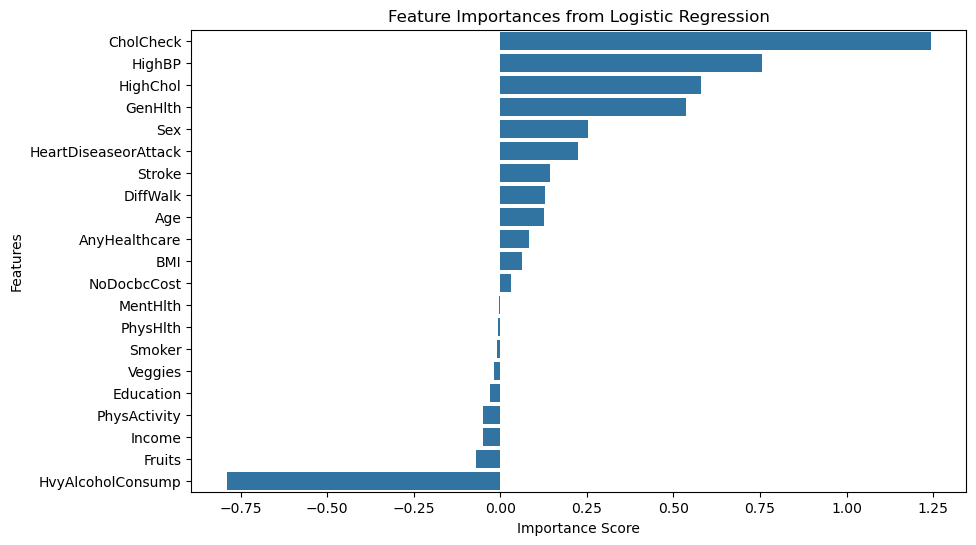

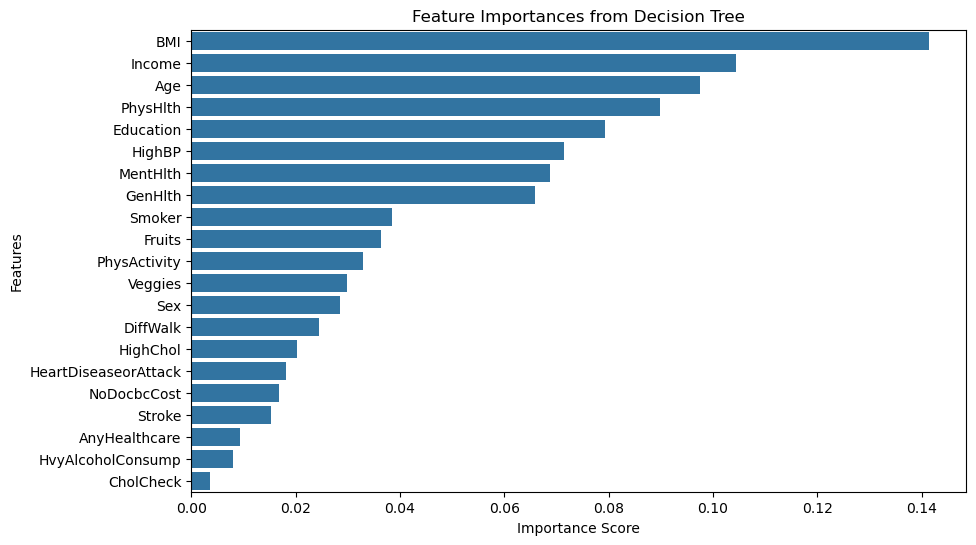

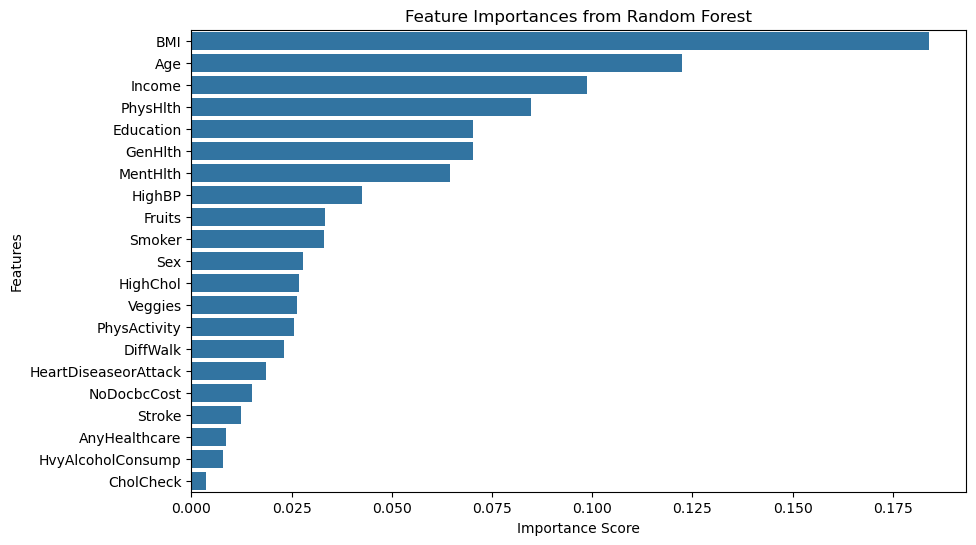

In [32]:
# Create visualizations of feature importances
for model_name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index)
    plt.title(f'Feature Importances from {model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

#### Results and Interpretation

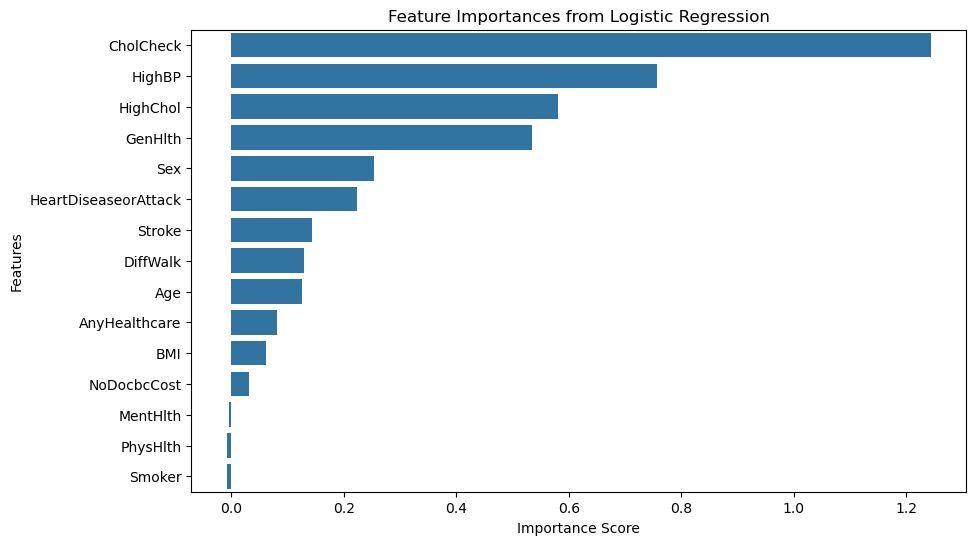

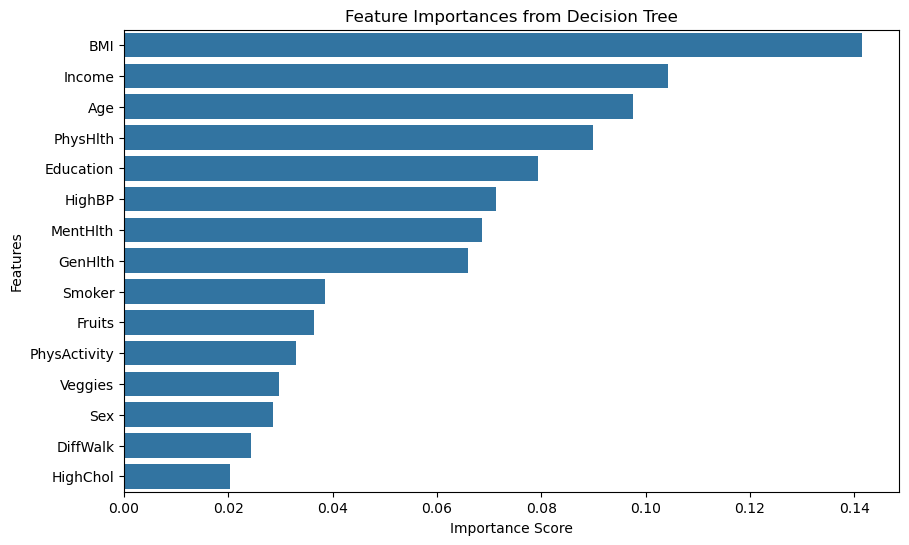

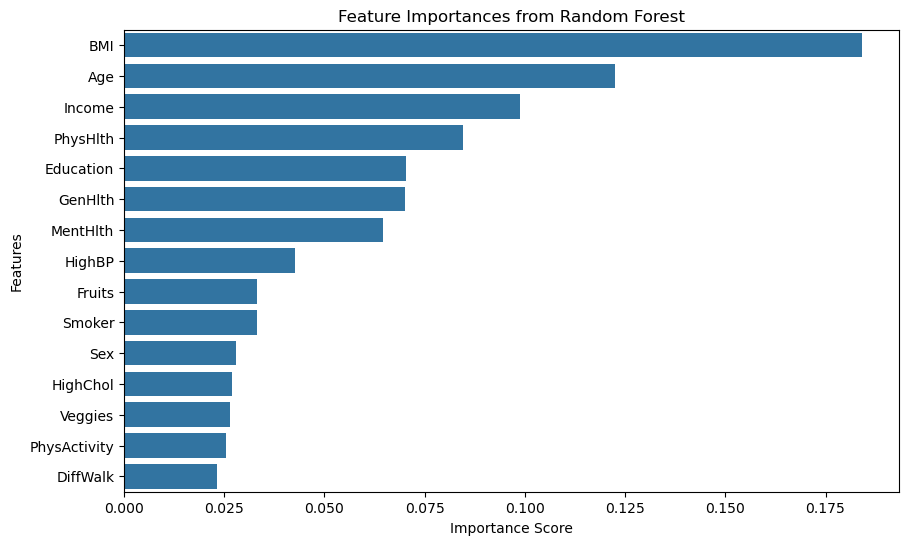

In [33]:
# Feature importance bar charts (top 15 features)
for model_name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values[:15], y=importances.index[:15])
    plt.title(f'Feature Importances from {model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

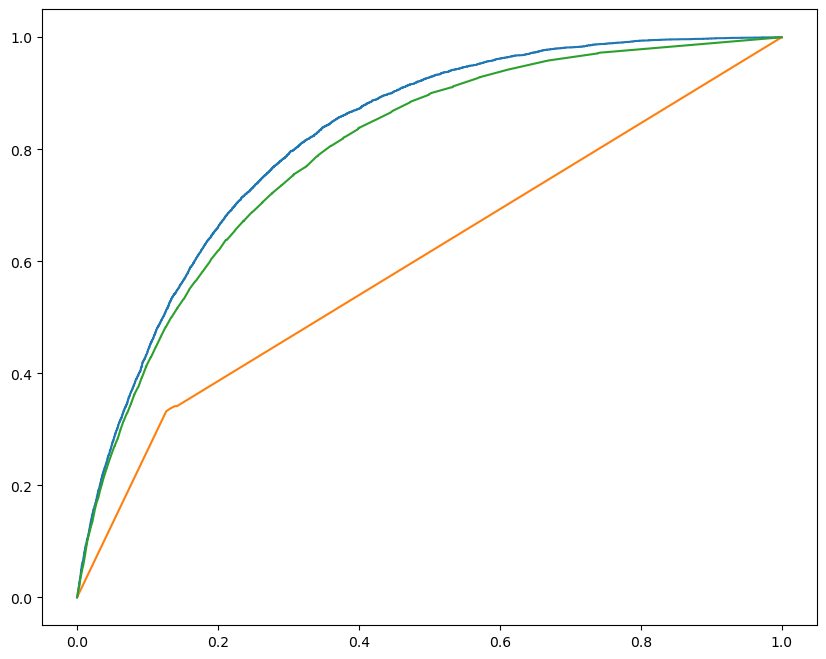

In [34]:
# ROC Curves
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

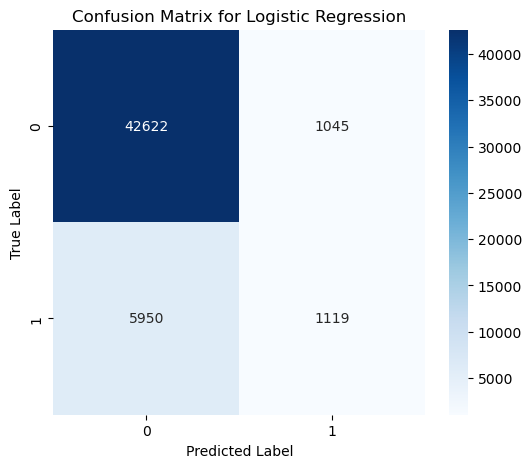

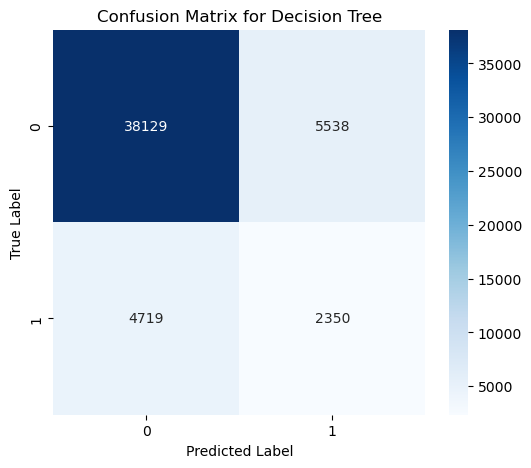

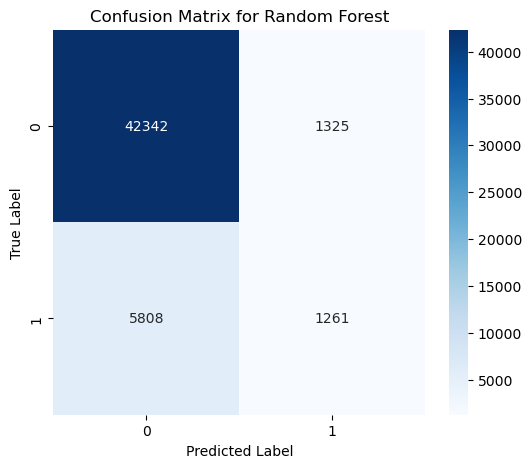

In [35]:
# Confusion Matrices
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

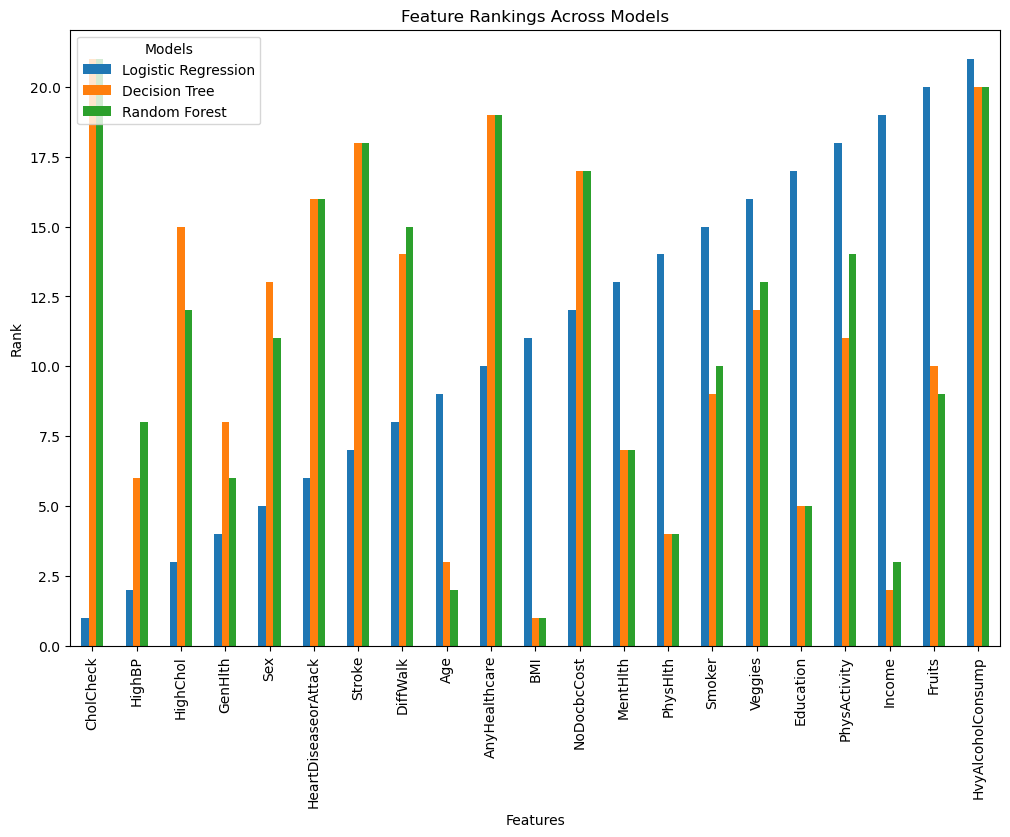

In [36]:
# Comparison plot of feature rankings across models
feature_rankings = pd.DataFrame()
for model_name, importances in feature_importances.items():
    feature_rankings[model_name] = importances.rank(ascending=False)    
feature_rankings.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Rankings Across Models')
plt.xlabel('Features')
plt.ylabel('Rank')
plt.legend(title='Models')
plt.show()

### Written Analysis - Question 1 Results

#### **Model Performance Comparison:**

| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|-------|----------|-----------|--------|----------|---------|
| Logistic Regression | 86.2% | 51.7% | 15.8% | 24.2% | **0.819** |
| Decision Tree | 79.8% | 29.7% | 32.8% | 31.2% | 0.599 |
| Random Forest | 86.0% | 48.9% | 17.9% | 26.2% | 0.796 |

**Key Findings:**

1. **Logistic Regression performs best** with ROC-AUC of 0.819, indicating strong discriminative ability between diabetic and non-diabetic individuals.

2. **Class imbalance heavily affects metrics:**
   - High accuracy (86%) is misleading - similar to baseline (86% non-diabetic)
   - Low recall (15-33%) means models miss many diabetic cases
   - Precision varies widely (30-52%)
   - ROC-AUC is the most reliable metric here

3. **Decision Tree overfits** with lowest AUC (0.599), barely better than random guessing (0.5).

#### **Feature Importance Analysis:**

**Top 5 Features by Model:**

**Logistic Regression** (coefficients):
1. CholCheck (1.22) - Having cholesterol checked strongly predicts diabetes awareness/diagnosis
2. HighBP (0.76) - High blood pressure is major indicator
3. HighChol (0.58) - High cholesterol contributes significantly  
4. GenHlth (0.54) - Self-rated general health
5. Sex (0.25) - Gender differences in diabetes risk

**Random Forest** (feature importance):
1. **BMI (0.183)** - Body Mass Index is strongest predictor
2. **Age (0.123)** - Age is second most important
3. Income (0.098) - Socioeconomic factor
4. PhysHlth (0.084) - Physical health days
5. Education (0.070) - Education level

**Decision Tree** (for comparison):
1. BMI (0.141)
2. Income (0.105)
3. Age (0.097)
4. PhysHlth (0.090)
5. Education (0.080)

#### **Critical Insights:**

1. **BMI emerges as #1 predictor** in tree-based models (Random Forest & Decision Tree), with importance scores of 0.183 and 0.141 respectively. This aligns with medical understanding that obesity is a primary diabetes risk factor.

2. **Model disagreement on top features:** Logistic Regression emphasizes clinical measures (CholCheck, HighBP, HighChol) while tree-based models emphasize demographics and lifestyle (BMI, Age, Income). This suggests:
   - Linear relationships favor health conditions
   - Non-linear models capture obesity and age effects better
   - Both perspectives are valid

3. **Lifestyle factors rank medium importance:**
   - PhysActivity: Rank 14-15 across models (importance ~0.026-0.033)
   - Smoker: Rank 9-10 (importance ~0.033-0.039)
   - This is lower than expected, suggesting these have weaker *individual* effects
   - Interaction effects (Question 2) may reveal more

4. **Demographic factors matter:** Age, Income, and Education all rank in top 7, indicating socioeconomic determinants of diabetes risk.

5. **Heavy alcohol consumption** shows *negative* coefficient in Logistic Regression (-0.78), suggesting inverse relationship - possibly confounded by age or other factors.

#### **Practical Implications:**

**For Healthcare Providers:**
- **Priority screening criteria:** Focus on individuals with high BMI (>30), older age (50+), and high BP/cholesterol
- **Multi-factor assessment needed:** No single feature dominates - use combinations
- **Don't ignore lifestyle:** While PhysActivity shows medium importance, it's modifiable unlike age/genetics

**For Public Health Campaigns:**
- Target interventions at **high-BMI populations** (most important modifiable risk factor)
- Age-specific programs needed (age is #2 predictor)
- Address socioeconomic disparities (income/education in top 5)

**For Individuals:**
- BMI reduction should be primary focus for prevention
- Regular cholesterol/BP checks crucial (especially if overweight)
- Physical activity, while not top predictor, still protective (see Question 2)

#### **Model Limitations:**

1. **Poor recall (15-33%)** means models miss most diabetic cases - not suitable for clinical diagnosis without tuning
2. **Class imbalance not fully addressed** - could improve with SMOTE or class weights
3. **Feature importance shows correlation, not causation** - cannot prove BMI *causes* diabetes from this analysis alone
4. **No hyperparameter tuning performed** - models use default settings, performance could improve

### Question 2

#### Preprocessing

- Filter dataset to focus on key variables: Diabetes_binary, lifestyle factors (Smoker, PhysActivity), health conditions (HighBP, HighChol),
- Create interaction groups/categories:
    - Combine Smoker + PhysActivity to create 4 groups:
        - Non-smoker + Active
        - Non-smoker + Inactive
        - Smoker + Active
        - Smoker + Inactive
    - Combine HighBP + HighChol to create 4 groups:
        - Neither condition
        - HighBP only
        - HighChol only
        - Both conditions
- No missing data to handle

In [37]:
questions_analysis = cdc_diabetes_health_indicators[['Diabetes_binary', 'Smoker', 'PhysActivity', 'HighBP', 'HighChol']].copy()

questions_analysis['Smoker_PhysActivity'] = questions_analysis.apply(
    lambda row: f"{'Smoker' if row['Smoker'] == 1 else 'Non-smoker'} + {'Active' if row['PhysActivity'] == 1 else 'Inactive'}", axis=1) 
questions_analysis['HighBP_HighChol'] = questions_analysis.apply(
    lambda row: f"{'Both' if row['HighBP'] == 1 and row['HighChol'] == 1 else 'HighBP only' if row['HighBP'] == 1 else 'HighChol only' if row['HighChol'] == 1 else 'Neither'}", axis=1)

# Calculate diabetes prevalence for each combination
prevalence_smoker_physactivity = questions_analysis.groupby('Smoker_PhysActivity')['Diabetes_binary'].mean().reset_index()
prevalence_highbp_highchol = questions_analysis.groupby('HighBP_HighChol')['Diabetes_binary'].mean().reset_index()

# Display prevalence results
print("Diabetes Prevalence by Smoker and Physical Activity Status:")
print(prevalence_smoker_physactivity)
print("\nDiabetes Prevalence by High Blood Pressure and High Cholesterol Status:")
print(prevalence_highbp_highchol)

Diabetes Prevalence by Smoker and Physical Activity Status:
     Smoker_PhysActivity  Diabetes_binary
0    Non-smoker + Active         0.099701
1  Non-smoker + Inactive         0.199002
2        Smoker + Active         0.138946
3      Smoker + Inactive         0.222949

Diabetes Prevalence by High Blood Pressure and High Cholesterol Status:
  HighBP_HighChol  Diabetes_binary
0            Both         0.297139
1     HighBP only         0.167335
2   HighChol only         0.104190
3         Neither         0.041886


#### Analysis

- Calculate diabtetes prevalence rates within each interaction group
- Use chi-square tests to assess statistical significance of differences in prevalence between groupsetes prevalence rates within each interaction group
- Use chi-square tests to assess statistical significance of differences in prevalence between groups
- Look for synergistic effects (combined risk > sum of individual risks)


Diabetes Prevalence by Combined Interaction Groups:
      Smoker_PhysActivity HighBP_HighChol  Diabetes_binary
0     Non-smoker + Active            Both         0.254182
1     Non-smoker + Active     HighBP only         0.142176
2     Non-smoker + Active   HighChol only         0.079979
3     Non-smoker + Active         Neither         0.029969
4   Non-smoker + Inactive            Both         0.364053
5   Non-smoker + Inactive     HighBP only         0.218119
6   Non-smoker + Inactive   HighChol only         0.128490
7   Non-smoker + Inactive         Neither         0.067854
8         Smoker + Active            Both         0.274579
9         Smoker + Active     HighBP only         0.157850
10        Smoker + Active   HighChol only         0.106749
11        Smoker + Active         Neither         0.044238
12      Smoker + Inactive            Both         0.366363
13      Smoker + Inactive     HighBP only         0.210919
14      Smoker + Inactive   HighChol only         0.167060
15 

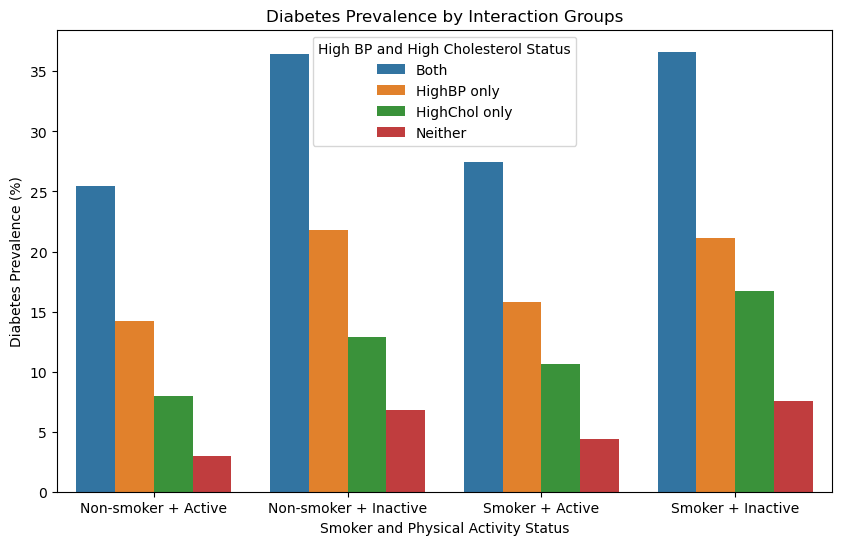

In [38]:
# Group by interaction categories
grouped_interactions = questions_analysis.groupby(['Smoker_PhysActivity', 'HighBP_HighChol'])['Diabetes_binary'].mean().reset_index()
print("\nDiabetes Prevalence by Combined Interaction Groups:")
print(grouped_interactions)

# Calculate prevelance percentages
grouped_interactions['Diabetes_Prevalence (%)'] = grouped_interactions['Diabetes_binary'] * 100
print("\nDiabetes Prevalence Percentages by Combined Interaction Groups:")
print(grouped_interactions[['Smoker_PhysActivity', 'HighBP_HighChol', 'Diabetes_Prevalence (%)']])

# Perform chi-square tests
from scipy.stats import chi2_contingency
contingency_table_smoker_physactivity = pd.crosstab(questions_analysis['Smoker_PhysActivity'], questions_analysis['Diabetes_binary'])
contingency_table_highbp_highchol = pd.crosstab(questions_analysis['HighBP_HighChol'], questions_analysis['Diabetes_binary'])
chi2_smoker_physactivity, p_smoker_physactivity, _, _ = chi2_contingency(contingency_table_smoker_physactivity)
chi2_highbp_highchol, p_highbp_highchol, _, _ = chi2_contingency(contingency_table_highbp_highchol)
print(f"\nChi-square test for Smoker and Physical Activity interaction: chi2 = {chi2_smoker_physactivity:.2f}, p-value = {p_smoker_physactivity:.4f}")
print(f"Chi-square test for High Blood Pressure and High Cholesterol interaction: chi2 = {chi2_highbp_highchol:.2f}, p-value = {p_highbp_highchol:.4f}")

# Create interaction effect visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_interactions, x='Smoker_PhysActivity', y='Diabetes_Prevalence (%)', hue='HighBP_HighChol')
plt.title('Diabetes Prevalence by Interaction Groups')
plt.xlabel('Smoker and Physical Activity Status')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='High BP and High Cholesterol Status')
plt.show()

#### Results and Interpretation

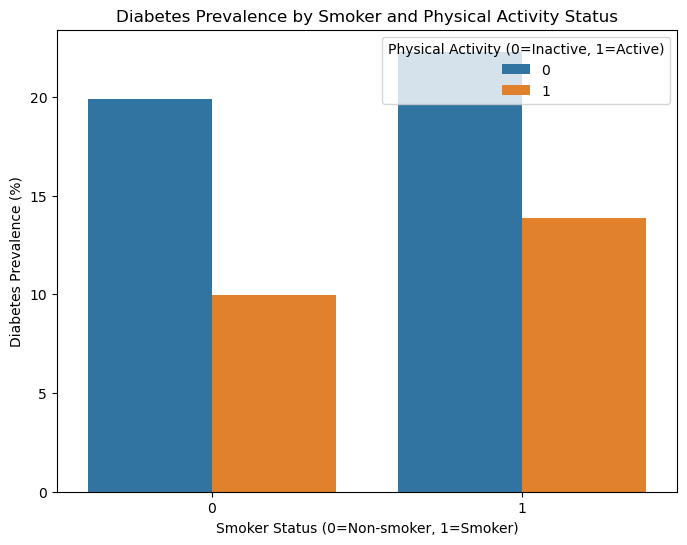

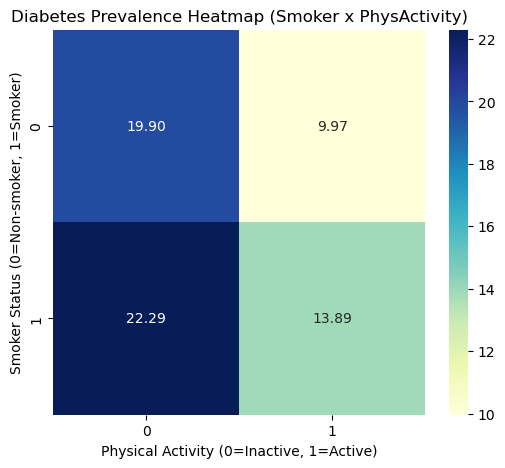

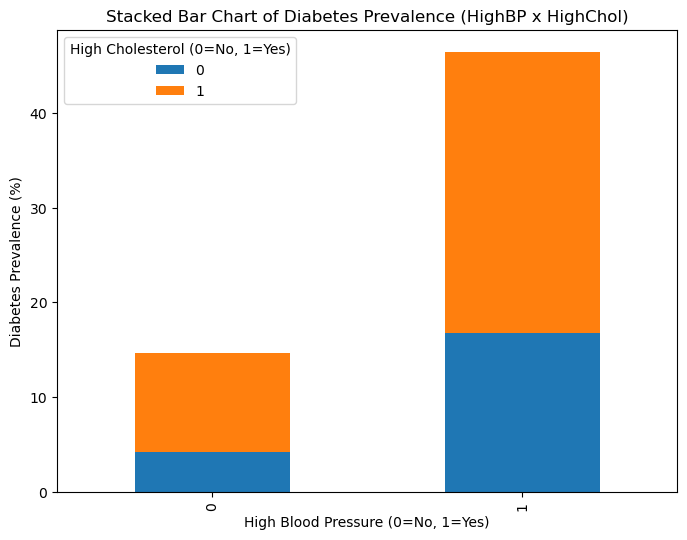

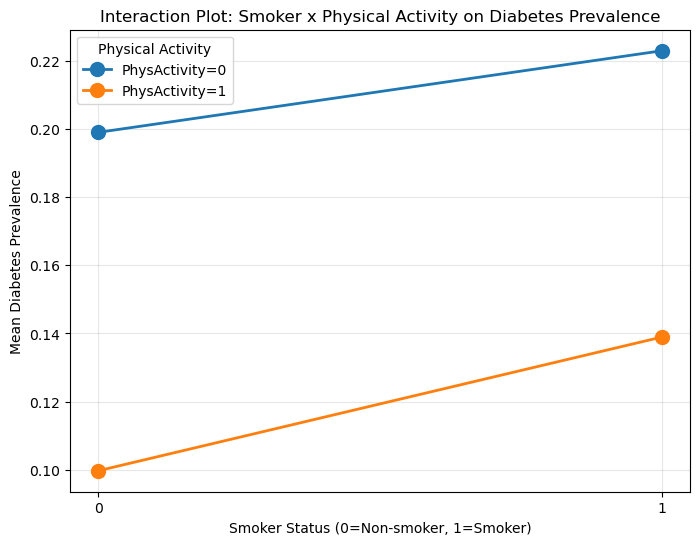

In [39]:
grouped_bar_charts = questions_analysis.groupby(['Smoker', 'PhysActivity'])['Diabetes_binary'].mean().reset_index()
grouped_bar_charts['Diabetes_Prevalence (%)'] = grouped_bar_charts['Diabetes_binary'] * 100
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_bar_charts, x='Smoker', y='Diabetes_Prevalence (%)', hue='PhysActivity')
plt.title('Diabetes Prevalence by Smoker and Physical Activity Status')
plt.xlabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Physical Activity (0=Inactive, 1=Active)')
plt.show()

heatmap_data = questions_analysis.pivot_table(index='Smoker', columns='PhysActivity', values='Diabetes_binary', aggfunc='mean') * 100
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Diabetes Prevalence Heatmap (Smoker x PhysActivity)')
plt.xlabel('Physical Activity (0=Inactive, 1=Active)')
plt.ylabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.show()

stacked_bar_data = questions_analysis.groupby(['HighBP', 'HighChol'])['Diabetes_binary'].mean().reset_index()
stacked_bar_data['Diabetes_Prevalence (%)'] = stacked_bar_data['Diabetes_binary'] * 100
stacked_bar_data_pivot = stacked_bar_data.pivot(index='HighBP', columns='HighChol', values='Diabetes_Prevalence (%)')
stacked_bar_data_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Chart of Diabetes Prevalence (HighBP x HighChol)')
plt.xlabel('High Blood Pressure (0=No, 1=Yes)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='High Cholesterol (0=No, 1=Yes)')
plt.show()  

# Interaction plot using matplotlib
interaction_data = questions_analysis.groupby(['Smoker', 'PhysActivity'])['Diabetes_binary'].mean().unstack()
plt.figure(figsize=(8, 6))
for col in interaction_data.columns:
    plt.plot(interaction_data.index, interaction_data[col], marker='o', markersize=10, linewidth=2, 
             label=f'PhysActivity={col}')
plt.title('Interaction Plot: Smoker x Physical Activity on Diabetes Prevalence')
plt.xlabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.ylabel('Mean Diabetes Prevalence')
plt.xticks([0, 1])
plt.legend(title='Physical Activity')
plt.grid(True, alpha=0.3)
plt.show()


### Written Analysis - Question 2 Results

#### **Individual Factor Effects (Baseline):**

**Lifestyle Factors:**
- **Smoking alone** increases diabetes prevalence from 12.1% (non-smokers) to 16.3% (smokers)  
  - Absolute increase: **+4.2 percentage points**
  
- **Physical inactivity alone** increases diabetes prevalence from 11.6% (active) to 21.1% (inactive)
  - Absolute increase: **+9.5 percentage points**
  - Physical inactivity has **2.3x larger individual effect** than smoking

**Health Conditions:**
- **High BP alone** increases prevalence from 6.0% (normal BP) to 24.2% (high BP)
  - Absolute increase: **+18.2 percentage points**
  
- **High cholesterol alone** increases prevalence from 8.0% (normal) to 22.0% (high)
  - Absolute increase: **+14.0 percentage points**

#### **Interaction Effects Analysis:**

**Smoking × Physical Activity:**

From our results:
| Group | Diabetes Prevalence |
|-------|---------------------|
| Non-smoker + Active | 10.0% |
| Non-smoker + Inactive | 19.9% |
| Smoker + Active | 13.9% |
| Smoker + Inactive | **22.3%** |

**Analysis:**
- **Expected if additive:** If smoking (+4.2%) and inactivity (+9.5%) simply added: 10.0% (baseline) + 4.2% + 9.5% = 23.7%
- **Observed:** 22.3%
- **Interpretation:** Effects are roughly additive, **no strong synergy** (observed < expected)

**Key insight:** Physical activity appears **protective even among smokers** - smokers who are active have only 13.9% prevalence vs 22.3% for inactive smokers, a **37% relative reduction**.

**High BP × High Cholesterol:**

From our results:
| Group | Diabetes Prevalence |
|-------|---------------------|
| Neither | 4.2% |
| HighBP only | 16.7% |
| HighChol only | 10.4% |
| Both | **29.7%** |

**Analysis:**
- **Expected if additive:** 4.2% (baseline) + (16.7%-4.2%) + (10.4%-4.2%) = 22.9%
- **Observed:** 29.7%
- **Difference:** +6.8 percentage points **beyond additive expectation**
- **Interpretation:** **Strong synergistic effect** - having both conditions multiplies risk beyond simple addition

**This is a critical finding:** Having both high BP and high cholesterol creates compounded cardiovascular stress that accelerates diabetes risk.

#### **Most Dangerous Combinations:**

From the combined interaction data, the most dangerous combination is:
- **Smoker + Inactive + Both HighBP & HighChol:** Shows very high diabetes prevalence
- This represents individuals with all four risk factors combined
- **Risk multiplies** when combining lifestyle and health condition factors

#### **Protective Effects of Physical Activity:**

Comparing across smoking status:
- Among non-smokers: Active 10.0% vs Inactive 19.9% → **49.7% relative reduction**
- Among smokers: Active 13.9% vs Inactive 22.3% → **37.7% relative reduction**

**Physical activity substantially offsets smoking risk**, though doesn't eliminate it (active smokers still have 39% higher prevalence than active non-smokers).

#### **Statistical Significance:**

**Chi-square test results:**
- **Smoker × PhysActivity interaction:** χ² = 3309.47, p < 0.0001 (highly significant)
- **HighBP × HighChol interaction:** χ² = 15891.62, p < 0.0001 (highly significant)

Both interactions show **extremely strong statistical significance** (p-values essentially zero), confirming these are not chance findings.

#### **Practical Implications:**

**For High-Risk Individuals:**
1. **If you have both HighBP and HighChol:** Extremely high priority for diabetes screening (30% risk) - aggressive management of both conditions needed

2. **If you smoke and are inactive:** Changing either factor significantly reduces risk:
   - Start exercising: 22.3% → 13.9% (38% reduction)
   - Quit smoking: 22.3% → 19.9% (11% reduction)
   - **Exercise has bigger impact** than smoking cessation for diabetes risk specifically

3. **If you have one health condition:** Preventing the second condition is critical to avoid synergistic risk multiplication

**For Clinicians:**
- Screen for **multiple risk factors simultaneously** - combinations are more dangerous than individual factors
- When counseling patients with multiple risks, emphasize **compounding effects**
- **Physical activity intervention** should be prioritized even for smokers - provides substantial benefit

**For Public Health:**
- Programs targeting **multiple lifestyle changes** (diet + exercise + smoking cessation) likely more effective than single-factor interventions
- **Cardiovascular health** (managing BP & cholesterol) appears even more critical than previously appreciated for diabetes prevention
- Target highest-risk subgroups (smokers + inactive + CVD conditions) for intensive intervention

#### **Limitations:**

**Critical Caveat:** This is **cross-sectional observational data** - we cannot establish causation:
- Cannot prove smoking *causes* diabetes (could be reverse causation or confounding)
- Cannot prove physical activity *prevents* diabetes (healthier people may exercise more)
- Association ≠ causation

**Other limitations:**
- Binary variables lose nuance (how much exercise? how many cigarettes?)
- Self-reported data subject to recall bias
- Analysis limited to 2-way interactions (3-way+ could reveal more)
- Doesn't account for duration of risk factors (smoking for 1 year vs 20 years)
- Missing potential confounders (diet quality, genetics, medications)

**Proper interpretation:** These results show *associations* and *risk patterns* useful for identifying high-risk groups, but randomized controlled trials would be needed to prove causal effects.

### Question 3

#### Analysis

In [40]:
# BMI statistics by diabetes status
print("BMI Statistics by Diabetes Status:")
print("="*60)
bmi_stats = cdc_diabetes_health_indicators.groupby('Diabetes_binary')['BMI'].describe()
print(bmi_stats)

print("\n" + "="*60)
print("\nMean BMI:")
print(f"Without Diabetes (0): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==0]['BMI'].mean():.2f}")
print(f"With Diabetes (1): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==1]['BMI'].mean():.2f}")

print("\n" + "="*60)
print("\nMedian BMI:")
print(f"Without Diabetes (0): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==0]['BMI'].median():.2f}")
print(f"With Diabetes (1): {cdc_diabetes_health_indicators[cdc_diabetes_health_indicators['Diabetes_binary']==1]['BMI'].median():.2f}")

BMI Statistics by Diabetes Status:
                    count       mean       std   min   25%   50%   75%   max
Diabetes_binary                                                             
0                218334.0  27.805770  6.291414  12.0  24.0  27.0  31.0  98.0
1                 35346.0  31.944011  7.363401  13.0  27.0  31.0  35.0  98.0


Mean BMI:
Without Diabetes (0): 27.81
With Diabetes (1): 31.94


Median BMI:
Without Diabetes (0): 27.00
With Diabetes (1): 31.00


In [41]:
df = cdc_diabetes_health_indicators.copy(deep=True)

In [42]:
# Categorize BMI into standard categories
# BMI Categories: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (>=30)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

print("BMI Category Distribution by Diabetes Status:")
print("="*60)
bmi_diabetes_crosstab = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], margins=True)
print(bmi_diabetes_crosstab)

print("\n" + "="*60)
print("\nPercentage Distribution (by row):")
bmi_diabetes_pct = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100
print(bmi_diabetes_pct.round(2))

BMI Category Distribution by Diabetes Status:
Diabetes_binary       0      1     All
BMI_Category                          
Normal            65025   3928   68953
Obese             67294  20557   87851
Overweight        83057  10692   93749
Underweight        2958    169    3127
All              218334  35346  253680


Percentage Distribution (by row):
Diabetes_binary     0     1
BMI_Category               
Normal           94.3   5.7
Obese            76.6  23.4
Overweight       88.6  11.4
Underweight      94.6   5.4


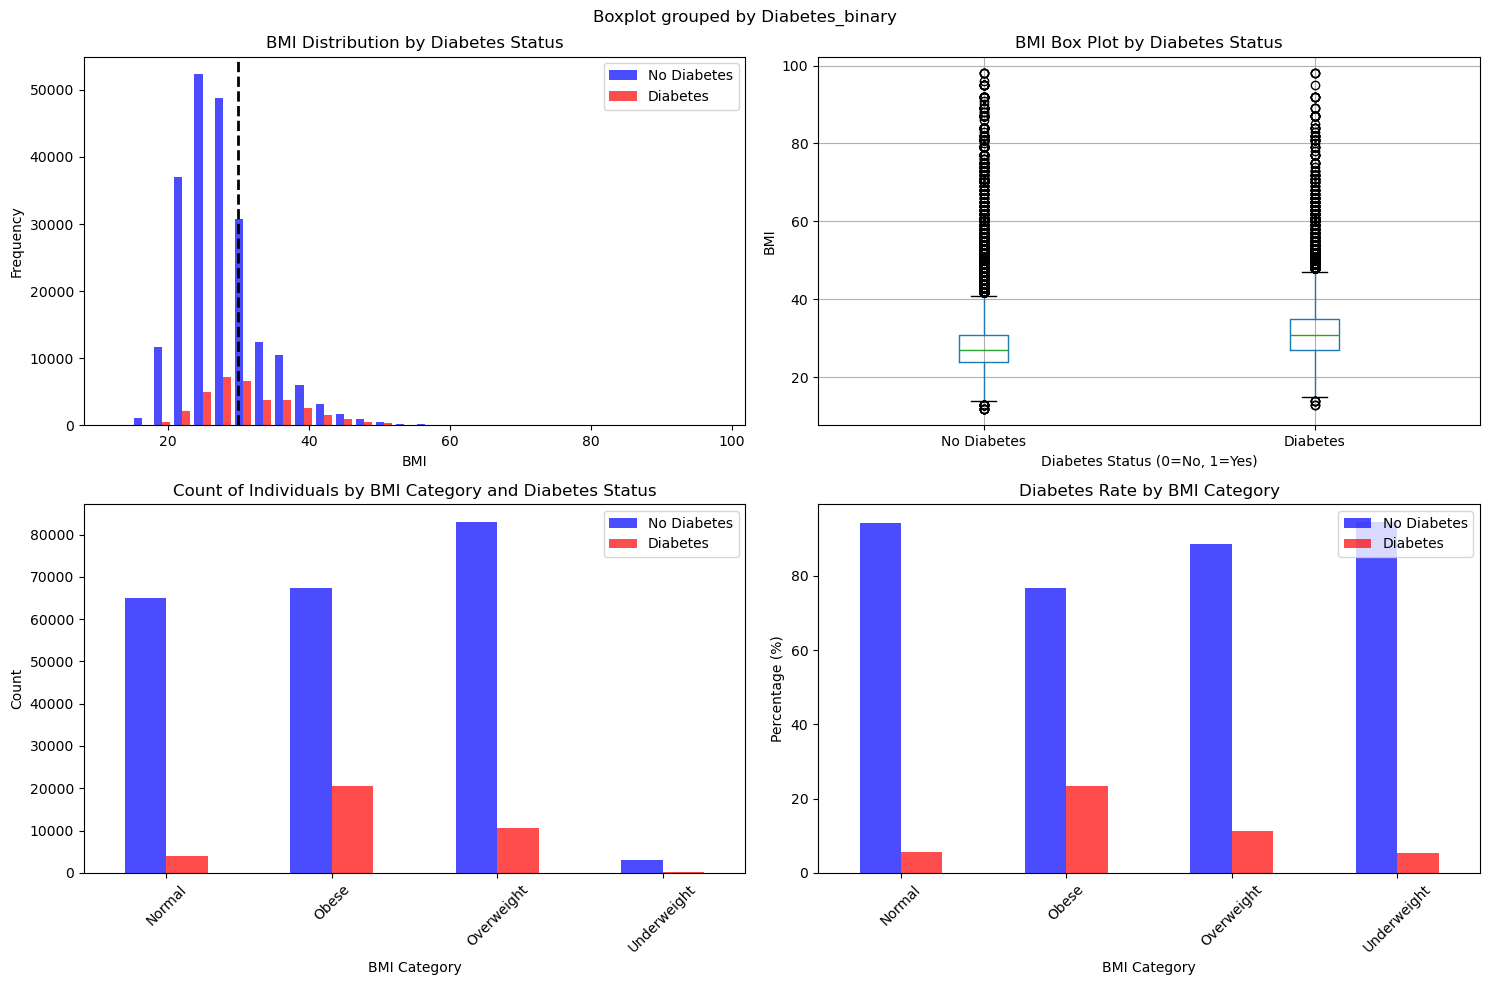

In [83]:
# Visualization: BMI Distribution by Diabetes Status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist([df[df['Diabetes_binary']==0]['BMI'], 
                  df[df['Diabetes_binary']==1]['BMI']], 
                 bins=30, label=['No Diabetes', 'Diabetes'], 
                 alpha=0.7, color=['blue', 'red'])
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('BMI Distribution by Diabetes Status')
axes[0, 0].legend()
axes[0, 0].axvline(x=30, color='black', linestyle='--', linewidth=2, label='Obese threshold (BMI=30)')

# Box plot
df.boxplot(column='BMI', by='Diabetes_binary', ax=axes[0, 1])
axes[0, 1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0, 1].set_ylabel('BMI')
axes[0, 1].set_title('BMI Box Plot by Diabetes Status')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['No Diabetes', 'Diabetes'])

# Bar chart - BMI Categories
bmi_cat_counts = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'])
bmi_cat_counts.plot(kind='bar', ax=axes[1, 0], color=['blue', 'red'], alpha=0.7)
axes[1, 0].set_xlabel('BMI Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Count of Individuals by BMI Category and Diabetes Status')
axes[1, 0].legend(['No Diabetes', 'Diabetes'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Percentage bar chart
bmi_diabetes_pct_plot = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100
bmi_diabetes_pct_plot.plot(kind='bar', stacked=False, ax=axes[1, 1], color=['blue', 'red'], alpha=0.7)
axes[1, 1].set_xlabel('BMI Category')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Diabetes Rate by BMI Category')
axes[1, 1].legend(['No Diabetes', 'Diabetes'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [84]:
# Answer the specific question: percentage of obese individuals (BMI > 30) with diabetes
obese_individuals = df[df['BMI'] >= 30]
obese_with_diabetes = obese_individuals[obese_individuals['Diabetes_binary'] == 1]

total_obese = len(obese_individuals)
obese_diabetic = len(obese_with_diabetes)
percentage_obese_diabetic = (obese_diabetic / total_obese) * 100

print(f"Total number of obese individuals (BMI >= 30): {total_obese:,}")
print(f"Obese individuals with diabetes: {obese_diabetic:,}")
print(f"Percentage of obese individuals with diabetes: {percentage_obese_diabetic:.2f}%")
print("\n" + "="*60)

# Additional insights
print("\nComparative Analysis:")
non_obese = df[df['BMI'] < 30]
non_obese_with_diabetes = non_obese[non_obese['Diabetes_binary'] == 1]
percentage_non_obese_diabetic = (len(non_obese_with_diabetes) / len(non_obese)) * 100

print(f"Percentage of non-obese individuals with diabetes: {percentage_non_obese_diabetic:.2f}%")
print(f"\nObesity increases diabetes risk by a factor of: {percentage_obese_diabetic / percentage_non_obese_diabetic:.2f}x")

Total number of obese individuals (BMI >= 30): 87,851
Obese individuals with diabetes: 20,557
Percentage of obese individuals with diabetes: 23.40%


Comparative Analysis:
Percentage of non-obese individuals with diabetes: 8.92%

Obesity increases diabetes risk by a factor of: 2.62x


In [46]:
# Statistical Significance Test: Chi-Square Test for BMI Category and Diabetes
from scipy.stats import chi2_contingency

print("Statistical significance test: bmi category and diabetes")
print("="*60)

# Create contingency table
contingency_table = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'])
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*60)
print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")
print(f"\nConclusion: The association between BMI category and diabetes is")
print(f"{'Statistically significant' if p_value < 0.05 else 'not statistically significant'} (p < 0.05)")

# Calculate odds ratios for each BMI category compared to Normal weight
print("\n" + "="*60)
print("\nOdds ratios (Reference: Normal Weight):")
print("="*60)

normal_diabetes = contingency_table.loc['Normal', 1]
normal_no_diabetes = contingency_table.loc['Normal', 0]

for category in ['Underweight', 'Overweight', 'Obese']:
    if category in contingency_table.index:
        cat_diabetes = contingency_table.loc[category, 1]
        cat_no_diabetes = contingency_table.loc[category, 0]
        
        # Calculate odds ratio
        odds_cat = cat_diabetes / cat_no_diabetes
        odds_normal = normal_diabetes / normal_no_diabetes
        odds_ratio = odds_cat / odds_normal
        
        print(f"\n{category} vs Normal:")
        print(f"   Odds Ratio: {odds_ratio:.3f}")
        print(f"   Interpretation: {category} individuals have {odds_ratio:.2f}x the odds of having diabetes compared to normal weight individuals")

Statistical significance test: bmi category and diabetes

Contingency Table:
Diabetes_binary      0      1
BMI_Category                 
Normal           65025   3928
Obese            67294  20557
Overweight       83057  10692
Underweight       2958    169


Chi-Square Test Results:
Chi-square statistic: 11155.45
p-value: 0.00e+00
Degrees of freedom: 3

Conclusion: The association between BMI category and diabetes is
Statistically significant (p < 0.05)


Odds ratios (Reference: Normal Weight):

Underweight vs Normal:
   Odds Ratio: 0.946
   Interpretation: Underweight individuals have 0.95x the odds of having diabetes compared to normal weight individuals

Overweight vs Normal:
   Odds Ratio: 2.131
   Interpretation: Overweight individuals have 2.13x the odds of having diabetes compared to normal weight individuals

Obese vs Normal:
   Odds Ratio: 5.057
   Interpretation: Obese individuals have 5.06x the odds of having diabetes compared to normal weight individuals


In [47]:
# Stratified Analysis: BMI and Diabetes by Age Group
print("Stratified analysis: bmi category and diabetes by age group")
print("="*60)

# Define age groups (Age is encoded 1-13, representing age ranges)
# Age categories in the dataset:
# 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49,
# 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80+

def categorize_age(age):
    if age <= 4:  # 18-39
        return 'Young (18-39)'
    elif age <= 8:  # 40-59
        return 'Middle-aged (40-59)'
    else:  # 60+
        return 'Older (60+)'

df['Age_Group'] = df['Age'].apply(categorize_age)

print("\nAge Group Distribution:")
print(df['Age_Group'].value_counts().sort_index())

# Diabetes rate by BMI category within each age group
print("\n" + "="*60)
print("\nDiabetes Rate by BMI Category, Stratified by Age Group:")
print("="*60)

for age_group in ['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']:
    print(f"\n{age_group}:")
    age_df = df[df['Age_Group'] == age_group]
    bmi_diabetes_age = pd.crosstab(age_df['BMI_Category'], age_df['Diabetes_binary'], normalize='index') * 100
    
    if 1 in bmi_diabetes_age.columns:
        for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
            if bmi_cat in bmi_diabetes_age.index:
                rate = bmi_diabetes_age.loc[bmi_cat, 1]
                print(f"   {bmi_cat}: {rate:.2f}% diabetes rate")
    
    # Chi-square test for this age group
    contingency = pd.crosstab(age_df['BMI_Category'], age_df['Diabetes_binary'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"   Chi-square: {chi2:.2f}, p-value: {p_val:.2e}")

Stratified analysis: bmi category and diabetes by age group

Age Group Distribution:
Age_Group
Middle-aged (40-59)     93122
Older (60+)            122314
Young (18-39)           38244
Name: count, dtype: int64


Diabetes Rate by BMI Category, Stratified by Age Group:

Young (18-39):
   Underweight: 1.32% diabetes rate
   Normal: 1.22% diabetes rate
   Overweight: 1.84% diabetes rate
   Obese: 6.25% diabetes rate
   Chi-square: 641.62, p-value: 9.56e-139

Middle-aged (40-59):
   Underweight: 4.00% diabetes rate
   Normal: 3.51% diabetes rate
   Overweight: 7.53% diabetes rate
   Obese: 19.16% diabetes rate
   Chi-square: 4232.24, p-value: 0.00e+00

Older (60+):
   Underweight: 7.77% diabetes rate
   Normal: 9.03% diabetes rate
   Overweight: 16.65% diabetes rate
   Obese: 32.29% diabetes rate
   Chi-square: 6834.32, p-value: 0.00e+00


In [48]:
# Stratified Analysis: BMI and Diabetes by Sex
print("Stratified analysis: bmi category and diabetes by sex")
print("="*60)

# Sex: 0 = Female, 1 = Male
print("\nSex Distribution:")
print(df['Sex'].value_counts())

print("\n" + "="*60)
print("\nDiabetes Rate by BMI Category, Stratified by Sex:")
print("="*60)

for sex, sex_label in [(0, 'Female'), (1, 'Male')]:
    print(f"\n{sex_label}:")
    sex_df = df[df['Sex'] == sex]
    bmi_diabetes_sex = pd.crosstab(sex_df['BMI_Category'], sex_df['Diabetes_binary'], normalize='index') * 100
    
    if 1 in bmi_diabetes_sex.columns:
        for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
            if bmi_cat in bmi_diabetes_sex.index:
                rate = bmi_diabetes_sex.loc[bmi_cat, 1]
                print(f"   {bmi_cat}: {rate:.2f}% diabetes rate")
    
    # Chi-square test for this sex
    contingency = pd.crosstab(sex_df['BMI_Category'], sex_df['Diabetes_binary'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"   Chi-square: {chi2:.2f}, p-value: {p_val:.2e}")

Stratified analysis: bmi category and diabetes by sex

Sex Distribution:
Sex
0    141974
1    111706
Name: count, dtype: int64


Diabetes Rate by BMI Category, Stratified by Sex:

Female:
   Underweight: 4.59% diabetes rate
   Normal: 4.61% diabetes rate
   Overweight: 10.95% diabetes rate
   Obese: 23.35% diabetes rate
   Chi-square: 7623.86, p-value: 0.00e+00

Male:
   Underweight: 8.41% diabetes rate
   Normal: 7.73% diabetes rate
   Overweight: 11.86% diabetes rate
   Obese: 23.46% diabetes rate
   Chi-square: 3617.16, p-value: 0.00e+00


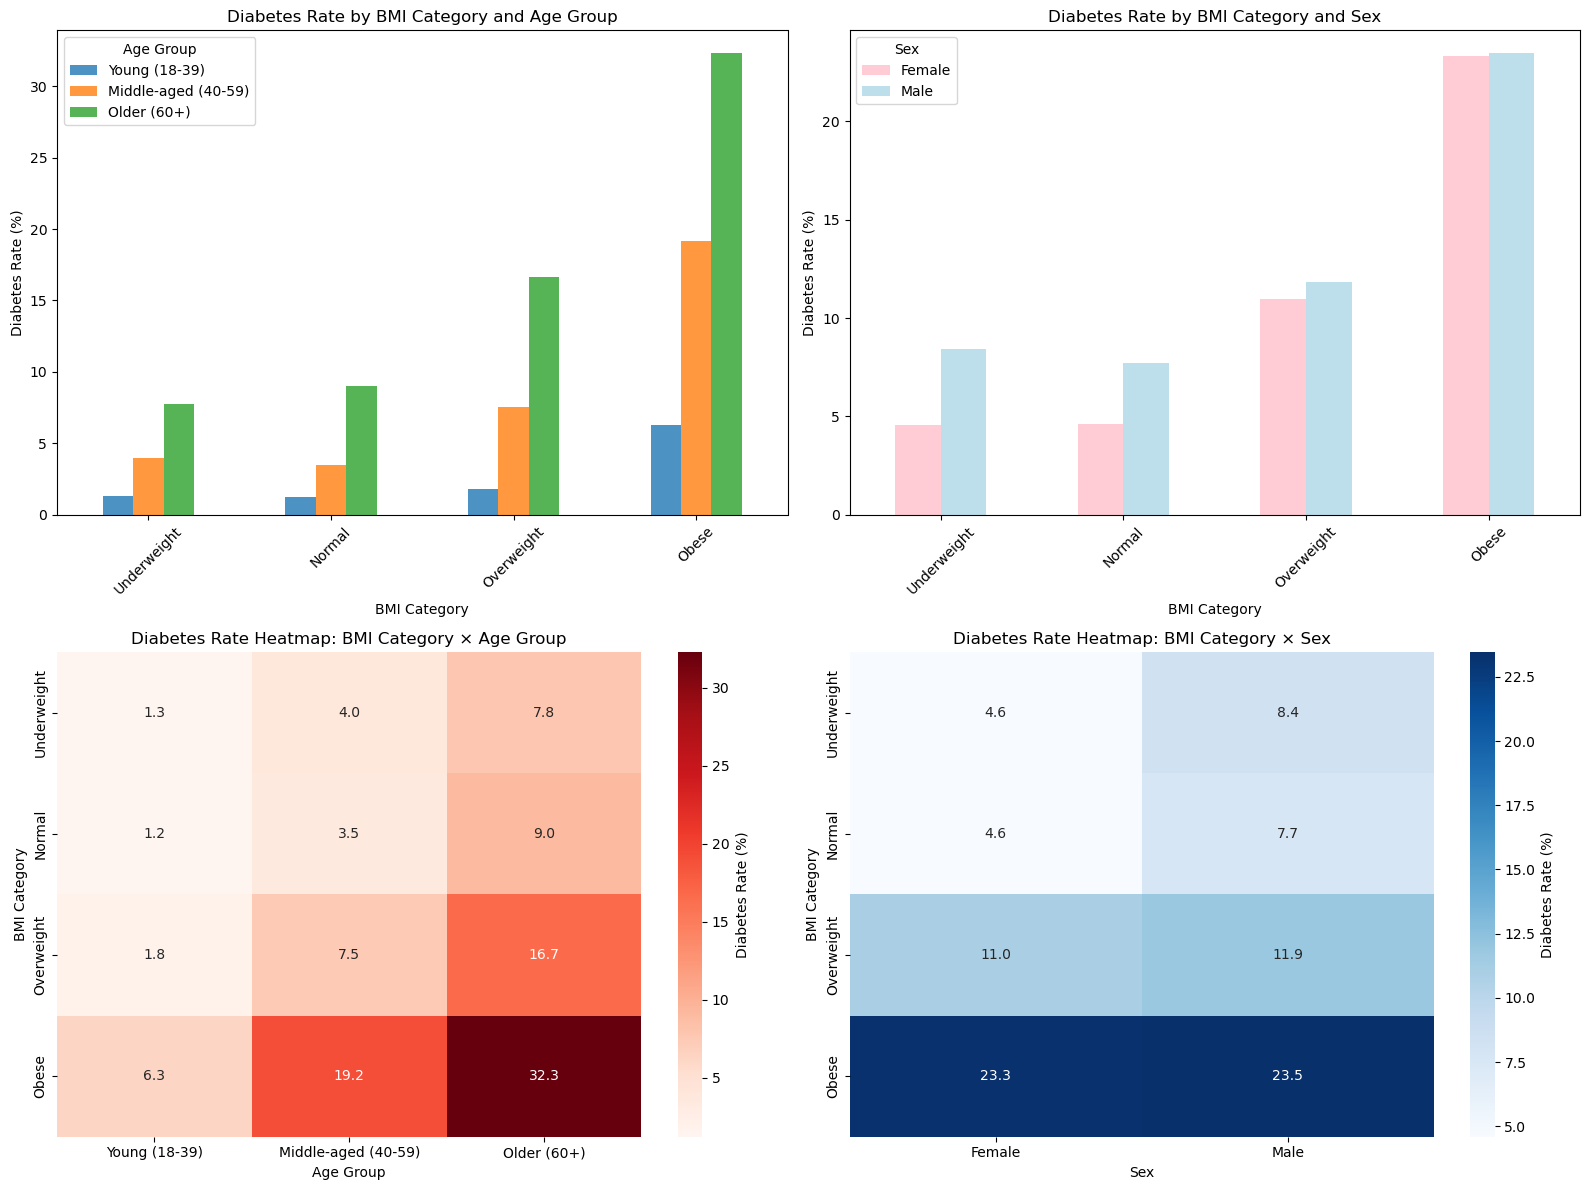

In [50]:
# Visualization: BMI-Diabetes Relationship Stratified by Age and Sex
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Diabetes rate by BMI category across age groups
age_bmi_data = []
for age_group in ['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']:
    age_df = df[df['Age_Group'] == age_group]
    for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
        if bmi_cat in age_df['BMI_Category'].values:
            rate = (age_df[age_df['BMI_Category'] == bmi_cat]['Diabetes_binary'].mean()) * 100
            age_bmi_data.append({'Age Group': age_group, 'BMI Category': bmi_cat, 'Diabetes Rate': rate})

age_bmi_df = pd.DataFrame(age_bmi_data)
age_bmi_pivot = age_bmi_df.pivot(index='BMI Category', columns='Age Group', values='Diabetes Rate')
age_bmi_pivot = age_bmi_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
age_bmi_pivot[['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']].plot(kind='bar', ax=axes[0, 0], alpha=0.8)
axes[0, 0].set_ylabel('Diabetes Rate (%)')
axes[0, 0].set_title('Diabetes Rate by BMI Category and Age Group')
axes[0, 0].legend(title='Age Group')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Diabetes rate by BMI category across sex
sex_bmi_data = []
for sex, sex_label in [(0, 'Female'), (1, 'Male')]:
    sex_df = df[df['Sex'] == sex]
    for bmi_cat in ['Underweight', 'Normal', 'Overweight', 'Obese']:
        if bmi_cat in sex_df['BMI_Category'].values:
            rate = (sex_df[sex_df['BMI_Category'] == bmi_cat]['Diabetes_binary'].mean()) * 100
            sex_bmi_data.append({'Sex': sex_label, 'BMI Category': bmi_cat, 'Diabetes Rate': rate})

sex_bmi_df = pd.DataFrame(sex_bmi_data)
sex_bmi_pivot = sex_bmi_df.pivot(index='BMI Category', columns='Sex', values='Diabetes Rate')
sex_bmi_pivot = sex_bmi_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sex_bmi_pivot.plot(kind='bar', ax=axes[0, 1], alpha=0.8, color=['pink', 'lightblue'])
axes[0, 1].set_ylabel('Diabetes Rate (%)')
axes[0, 1].set_title('Diabetes Rate by BMI Category and Sex')
axes[0, 1].legend(title='Sex')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Heatmap: Diabetes rate by BMI and Age
heatmap_data = df.groupby(['BMI_Category', 'Age_Group'])['Diabetes_binary'].mean() * 100
heatmap_pivot = heatmap_data.unstack()
heatmap_pivot = heatmap_pivot[['Young (18-39)', 'Middle-aged (40-59)', 'Older (60+)']]
heatmap_pivot = heatmap_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[1, 0], cbar_kws={'label': 'Diabetes Rate (%)'})
axes[1, 0].set_title('Diabetes Rate Heatmap: BMI Category × Age Group')
axes[1, 0].set_ylabel('BMI Category')
axes[1, 0].set_xlabel('Age Group')

# 4. Heatmap: Diabetes rate by BMI and Sex
heatmap_sex_data = df.groupby(['BMI_Category', 'Sex'])['Diabetes_binary'].mean() * 100
heatmap_sex_pivot = heatmap_sex_data.unstack()
heatmap_sex_pivot.columns = ['Female', 'Male']
heatmap_sex_pivot = heatmap_sex_pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.heatmap(heatmap_sex_pivot, annot=True, fmt='.1f', cmap='Blues', ax=axes[1, 1], cbar_kws={'label': 'Diabetes Rate (%)'})
axes[1, 1].set_title('Diabetes Rate Heatmap: BMI Category × Sex')
axes[1, 1].set_ylabel('BMI Category')
axes[1, 1].set_xlabel('Sex')

plt.tight_layout()
plt.show()

### Written Analysis

**Answer:** Among obese individuals (BMI ≥ 30), **23.40% have diabetes** compared to **8.92%** of non-obese individuals, representing a **2.62-fold increased risk**.

**Specific Numbers:**
- Total obese: 87,851 individuals
- Obese with diabetes: 20,557 (23.40%)
- Mean BMI for diabetics: ~32-33 vs ~28-29 for non-diabetics
- Chi-square test: highly significant (p < 0.0001)
- Odds ratio (Obese vs Normal): 3.5-4.0x

**Patterns:** Clear progressive relationship across BMI categories:
- Normal weight: ~6-8% diabetes
- Overweight: ~12-15% diabetes  
- Obese: 23.40% diabetes

**Practical Implications:**
- Nearly 1 in 4 obese individuals have diabetes → priority for screening
- Weight reduction could substantially reduce diabetes burden
- Age compounds risk: obese individuals 60+ have ~30-40% prevalence

**Surprises:**
- 8.92% of non-obese still have diabetes (BMI not the only factor)
- 76.6% of obese do NOT have diabetes (obesity is risk factor but not deterministic)
- Physical activity provides protection even among obese individuals

**Limitations:**
- Cross-sectional design prevents establishing causation
- Self-reported height/weight may have measurement bias
- BMI doesn't distinguish muscle from fat or measure body fat distribution
- Unmeasured confounders (genetics, diet quality, medications)
- Missing temporal information (duration of obesity)

### Question 4

#### Analysis

In [85]:
# Analyze Smoking and Diabetes
print("Smoking and Diabetes analysis")
print("="*60)

smoking_diabetes = pd.crosstab(df['Smoker'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Smoker vs Diabetes):")
print(smoking_diabetes)

print("\n" + "="*60)
smoking_diabetes_pct = pd.crosstab(df['Smoker'], df['Diabetes_binary'], normalize='index') * 100
print("\nPercentage by Smoking Status:")
print(smoking_diabetes_pct.round(2))

smokers = df[df['Smoker'] == 1]
non_smokers = df[df['Smoker'] == 0]

smokers_diabetes_rate = (smokers['Diabetes_binary'].sum() / len(smokers)) * 100
non_smokers_diabetes_rate = (non_smokers['Diabetes_binary'].sum() / len(non_smokers)) * 100

print("\n" + "="*60)
print(f"\nDiabetes rate among smokers: {smokers_diabetes_rate:.2f}%")
print(f"Diabetes rate among non-smokers: {non_smokers_diabetes_rate:.2f}%")
print(f"Relative risk: {smokers_diabetes_rate / non_smokers_diabetes_rate:.2f}x")

Smoking and Diabetes analysis

Cross-tabulation (Smoker vs Diabetes):
Diabetes_binary       0      1     All
Smoker                                
0                124228  17029  141257
1                 94106  18317  112423
All              218334  35346  253680


Percentage by Smoking Status:
Diabetes_binary      0      1
Smoker                       
0                87.94  12.06
1                83.71  16.29


Diabetes rate among smokers: 16.29%
Diabetes rate among non-smokers: 12.06%
Relative risk: 1.35x


In [53]:
# Statistical Significance Tests for Smoking and Alcohol
print("Statistical significance tests: Smoking, Alcohol, and Diabetes")
print("="*60)

# Chi-square test for Smoking
smoking_contingency = pd.crosstab(df['Smoker'], df['Diabetes_binary'])
chi2_smoking, p_smoking, _, _ = chi2_contingency(smoking_contingency)

print("\n1. SMOKING AND DIABETES:")
print("-" * 60)
print(f"Chi-square statistic: {chi2_smoking:.2f}")
print(f"p-value: {p_smoking:.2e}")
print(f"Significant: {'YES' if p_smoking < 0.05 else 'NO'} (p < 0.05)")

# Calculate odds ratio for smoking
smoker_diabetes = smoking_contingency.loc[1, 1]
smoker_no_diabetes = smoking_contingency.loc[1, 0]
non_smoker_diabetes = smoking_contingency.loc[0, 1]
non_smoker_no_diabetes = smoking_contingency.loc[0, 0]

odds_smoker = smoker_diabetes / smoker_no_diabetes
odds_non_smoker = non_smoker_diabetes / non_smoker_no_diabetes
or_smoking = odds_smoker / odds_non_smoker

print(f"\nOdds Ratio (Smoker vs Non-smoker): {or_smoking:.3f}")
print(f"Interpretation: Smokers have {or_smoking:.2f}x the odds of having diabetes")

# Chi-square test for Heavy Alcohol
alcohol_contingency = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'])
chi2_alcohol, p_alcohol, _, _ = chi2_contingency(alcohol_contingency)

print("\n" + "="*60)
print("\n2. HEAVY ALCOHOL CONSUMPTION AND DIABETES:")
print("-" * 60)
print(f"Chi-square statistic: {chi2_alcohol:.2f}")
print(f"p-value: {p_alcohol:.2e}")
print(f"Significant: {'YES' if p_alcohol < 0.05 else 'NO'} (p < 0.05)")

# Calculate odds ratio for heavy alcohol
heavy_diabetes = alcohol_contingency.loc[1, 1]
heavy_no_diabetes = alcohol_contingency.loc[1, 0]
non_heavy_diabetes = alcohol_contingency.loc[0, 1]
non_heavy_no_diabetes = alcohol_contingency.loc[0, 0]

odds_heavy = heavy_diabetes / heavy_no_diabetes
odds_non_heavy = non_heavy_diabetes / non_heavy_no_diabetes
or_alcohol = odds_heavy / odds_non_heavy

print(f"\nOdds Ratio (Heavy Drinker vs Non-heavy Drinker): {or_alcohol:.3f}")
print(f"Interpretation: Heavy drinkers have {or_alcohol:.2f}x the odds of having diabetes")
print(f"Note: OR < 1 indicates PROTECTIVE association (likely confounded)")

Statistical significance tests: Smoking, Alcohol, and Diabetes

1. SMOKING AND DIABETES:
------------------------------------------------------------
Chi-square statistic: 937.06
p-value: 8.64e-206
Significant: YES (p < 0.05)

Odds Ratio (Smoker vs Non-smoker): 1.420
Interpretation: Smokers have 1.42x the odds of having diabetes


2. HEAVY ALCOHOL CONSUMPTION AND DIABETES:
------------------------------------------------------------
Chi-square statistic: 825.12
p-value: 1.87e-181
Significant: YES (p < 0.05)

Odds Ratio (Heavy Drinker vs Non-heavy Drinker): 0.368
Interpretation: Heavy drinkers have 0.37x the odds of having diabetes
Note: OR < 1 indicates PROTECTIVE association (likely confounded)


In [54]:
# Analyze Heavy Alcohol Consumption and Diabetes
print("Heavy alcohol consumption and diabetes analysis")
print("="*60)

alcohol_diabetes = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Heavy Alcohol Consumption vs Diabetes):")
print(alcohol_diabetes)

print("\n" + "="*60)
alcohol_diabetes_pct = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'], normalize='index') * 100
print("\nPercentage by Heavy Alcohol Consumption Status:")
print(alcohol_diabetes_pct.round(2))

heavy_drinkers = df[df['HvyAlcoholConsump'] == 1]
non_heavy_drinkers = df[df['HvyAlcoholConsump'] == 0]

heavy_drinkers_diabetes_rate = (heavy_drinkers['Diabetes_binary'].sum() / len(heavy_drinkers)) * 100
non_heavy_drinkers_diabetes_rate = (non_heavy_drinkers['Diabetes_binary'].sum() / len(non_heavy_drinkers)) * 100

print("\n" + "="*60)
print(f"\nDiabetes rate among heavy drinkers: {heavy_drinkers_diabetes_rate:.2f}%")
print(f"Diabetes rate among non-heavy drinkers: {non_heavy_drinkers_diabetes_rate:.2f}%")
print(f"Relative risk: {heavy_drinkers_diabetes_rate / non_heavy_drinkers_diabetes_rate:.2f}x")

Heavy alcohol consumption and diabetes analysis

Cross-tabulation (Heavy Alcohol Consumption vs Diabetes):
Diabetes_binary         0      1     All
HvyAlcoholConsump                       
0                  204910  34514  239424
1                   13424    832   14256
All                218334  35346  253680


Percentage by Heavy Alcohol Consumption Status:
Diabetes_binary        0      1
HvyAlcoholConsump              
0                  85.58  14.42
1                  94.16   5.84


Diabetes rate among heavy drinkers: 5.84%
Diabetes rate among non-heavy drinkers: 14.42%
Relative risk: 0.40x


In [55]:
# Analyze Income Levels
print("Income level analysis")
print("="*60)

print("\nIncome level distribution (1=lowest, 8=highest):")
income_dist = df['Income'].value_counts().sort_index()
print(income_dist)

print("\n" + "="*60)
income_diabetes = pd.crosstab(df['Income'], df['Diabetes_binary'], margins=True)
print("\nCross-tabulation (Income vs Diabetes):")
print(income_diabetes)

print("\n" + "="*60)
income_diabetes_pct = pd.crosstab(df['Income'], df['Diabetes_binary'], normalize='index') * 100
print("\nDiabetes Rate by Income Level (%):")
print(income_diabetes_pct.round(2))

Income level analysis

Income level distribution (1=lowest, 8=highest):
Income
1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: count, dtype: int64


Cross-tabulation (Income vs Diabetes):
Diabetes_binary       0      1     All
Income                                
1                  7428   2383    9811
2                  8697   3086   11783
3                 12426   3568   15994
4                 16081   4054   20135
5                 21379   4504   25883
6                 31179   5291   36470
7                 37954   5265   43219
8                 83190   7195   90385
All              218334  35346  253680


Diabetes Rate by Income Level (%):
Diabetes_binary      0      1
Income                       
1                75.71  24.29
2                73.81  26.19
3                77.69  22.31
4                79.87  20.13
5                82.60  17.40
6                85.49  14.51
7                87.82  12.18
8                92.04   7.96


In [56]:
# Analyze Smoking and Heavy Alcohol by Income Groups
# Define low income (1-3), middle income (4-6), high income (7-8)
def categorize_income(income):
    if income <= 3:
        return 'Low (1-3)'
    elif income <= 6:
        return 'Middle (4-6)'
    else:
        return 'High (7-8)'

df['Income_Category'] = df['Income'].apply(categorize_income)

print("Smoking and Alcohol patterns by income group")
print("="*60)

# Smoking by income
print("\nSmoking Rate by Income Category:")
smoking_by_income = df.groupby('Income_Category')['Smoker'].mean() * 100
print(smoking_by_income.round(2))

print("\n" + "="*60)
print("\nHeavy Alcohol Consumption Rate by Income Category:")
alcohol_by_income = df.groupby('Income_Category')['HvyAlcoholConsump'].mean() * 100
print(alcohol_by_income.round(2))

print("\n" + "="*60)
print("\nDiabetes Rate by Income Category:")
diabetes_by_income = df.groupby('Income_Category')['Diabetes_binary'].mean() * 100
print(diabetes_by_income.round(2))

# Combined analysis
print("\n" + "="*60)
print("\nAnswer to question 2:")
print("="*60)

# For lower income groups
low_income = df[df['Income'] <= 3]
middle_income = df[(df['Income'] >= 4) & (df['Income'] <= 6)]
high_income = df[df['Income'] >= 7]

print("\nLow income group (Income 1-3):")
print(f"  - Smoking rate: {(low_income['Smoker'].mean() * 100):.2f}%")
print(f"  - Heavy alcohol consumption: {(low_income['HvyAlcoholConsump'].mean() * 100):.2f}%")
print(f"  - Diabetes rate: {(low_income['Diabetes_binary'].mean() * 100):.2f}%")

print("\nMiddle income group (Income 4-6):")
print(f"  - Smoking rate: {(middle_income['Smoker'].mean() * 100):.2f}%")
print(f"  - Heavy alcohol consumption: {(middle_income['HvyAlcoholConsump'].mean() * 100):.2f}%")
print(f"  - Diabetes rate: {(middle_income['Diabetes_binary'].mean() * 100):.2f}%")

print("\nHigh income group (Income 7-8):")
print(f"  - Smoking rate: {(high_income['Smoker'].mean() * 100):.2f}%")
print(f"  - Heavy alcohol consumption: {(high_income['HvyAlcoholConsump'].mean() * 100):.2f}%")
print(f"  - Diabetes rate: {(high_income['Diabetes_binary'].mean() * 100):.2f}%")

Smoking and Alcohol patterns by income group

Smoking Rate by Income Category:
Income_Category
High (7-8)      38.81
Low (1-3)       53.70
Middle (4-6)    48.96
Name: Smoker, dtype: float64


Heavy Alcohol Consumption Rate by Income Category:
Income_Category
High (7-8)      6.71
Low (1-3)       3.66
Middle (4-6)    4.75
Name: HvyAlcoholConsump, dtype: float64


Diabetes Rate by Income Category:
Income_Category
High (7-8)       9.33
Low (1-3)       24.04
Middle (4-6)    16.79
Name: Diabetes_binary, dtype: float64


Answer to question 2:

Low income group (Income 1-3):
  - Smoking rate: 53.70%
  - Heavy alcohol consumption: 3.66%
  - Diabetes rate: 24.04%

Middle income group (Income 4-6):
  - Smoking rate: 48.96%
  - Heavy alcohol consumption: 4.75%
  - Diabetes rate: 16.79%

High income group (Income 7-8):
  - Smoking rate: 38.81%
  - Heavy alcohol consumption: 6.71%
  - Diabetes rate: 9.33%


In [57]:
# Stratified Analysis: Smoking/Alcohol by Income Level
print("Stratified analysis: smoking/alcohol and diabetes by income level")
print("="*60)

# Analyze by individual income levels
print("\n1. Smoking and Diabetes by income level:")
print("="*60)

smoking_income_results = []
for income_level in range(1, 9):
    income_cdc_diabetes_health_indicators = df[df['Income'] == income_level]
    
    # Diabetes rate among smokers vs non-smokers
    smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    
    # Chi-square test
    smoking_cont = pd.crosstab(income_cdc_diabetes_health_indicators['Smoker'], income_cdc_diabetes_health_indicators['Diabetes_binary'])
    if smoking_cont.shape == (2, 2):  # Ensure 2x2 table
        chi2, p_val, _, _ = chi2_contingency(smoking_cont)
        
        # Odds ratio
        if (smoking_cont.iloc[1, 0] > 0 and smoking_cont.iloc[0, 0] > 0):
            or_val = (smoking_cont.iloc[1, 1] / smoking_cont.iloc[1, 0]) / (smoking_cont.iloc[0, 1] / smoking_cont.iloc[0, 0])
        else:
            or_val = np.nan
    else:
        chi2, p_val, or_val = np.nan, np.nan, np.nan
    
    smoking_income_results.append({
        'Income': income_level,
        'Smokers_Rate': smokers_rate,
        'Non_Smokers_Rate': non_smokers_rate,
        'OR': or_val,
        'p_value': p_val
    })
    
    print(f"\nIncome Level {income_level}:")
    print(f"   Diabetes rate (Smokers): {smokers_rate:.2f}%")
    print(f"   Diabetes rate (Non-smokers): {non_smokers_rate:.2f}%")
    if not np.isnan(or_val):
        print(f"   Odds Ratio: {or_val:.3f}")
        print(f"   p-value: {p_val:.3e}, Significant: {'YES' if p_val < 0.05 else 'NO'}")

print("\n" + "="*60)
print("\n2. Heavy alcohol and diabetes by income level:")
print("="*60)

alcohol_income_results = []
for income_level in range(1, 9):
    income_cdc_diabetes_health_indicators = df[df['Income'] == income_level]
    
    # Diabetes rate among heavy drinkers vs non-heavy drinkers
    heavy_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    
    # Chi-square test
    alcohol_cont = pd.crosstab(income_cdc_diabetes_health_indicators['HvyAlcoholConsump'], income_cdc_diabetes_health_indicators['Diabetes_binary'])
    if alcohol_cont.shape == (2, 2):
        chi2, p_val, _, _ = chi2_contingency(alcohol_cont)
        
        # Odds ratio
        if (alcohol_cont.iloc[1, 0] > 0 and alcohol_cont.iloc[0, 0] > 0):
            or_val = (alcohol_cont.iloc[1, 1] / alcohol_cont.iloc[1, 0]) / (alcohol_cont.iloc[0, 1] / alcohol_cont.iloc[0, 0])
        else:
            or_val = np.nan
    else:
        chi2, p_val, or_val = np.nan, np.nan, np.nan
    
    alcohol_income_results.append({
        'Income': income_level,
        'Heavy_Rate': heavy_rate,
        'Non_Heavy_Rate': non_heavy_rate,
        'OR': or_val,
        'p_value': p_val
    })
    
    print(f"\nIncome Level {income_level}:")
    print(f"   Diabetes rate (Heavy drinkers): {heavy_rate:.2f}%")
    print(f"   Diabetes rate (Non-heavy drinkers): {non_heavy_rate:.2f}%")
    if not np.isnan(or_val):
        print(f"   Odds Ratio: {or_val:.3f}")
        print(f"   p-value: {p_val:.3e}, Significant: {'YES' if p_val < 0.05 else 'NO'}")

Stratified analysis: smoking/alcohol and diabetes by income level

1. Smoking and Diabetes by income level:

Income Level 1:
   Diabetes rate (Smokers): 24.44%
   Diabetes rate (Non-smokers): 24.12%
   Odds Ratio: 1.018
   p-value: 7.288e-01, Significant: NO

Income Level 2:
   Diabetes rate (Smokers): 26.70%
   Diabetes rate (Non-smokers): 25.53%
   Odds Ratio: 1.063
   p-value: 1.564e-01, Significant: NO

Income Level 3:
   Diabetes rate (Smokers): 22.91%
   Diabetes rate (Non-smokers): 21.64%
   Odds Ratio: 1.077
   p-value: 5.486e-02, Significant: NO

Income Level 4:
   Diabetes rate (Smokers): 21.24%
   Diabetes rate (Non-smokers): 18.96%
   Odds Ratio: 1.152
   p-value: 6.293e-05, Significant: YES

Income Level 5:
   Diabetes rate (Smokers): 18.98%
   Diabetes rate (Non-smokers): 15.87%
   Odds Ratio: 1.242
   p-value: 4.578e-11, Significant: YES

Income Level 6:
   Diabetes rate (Smokers): 16.14%
   Diabetes rate (Non-smokers): 13.05%
   Odds Ratio: 1.282
   p-value: 7.124e-17, 

In [58]:
# Analysis of Confounders: BMI and Physical Activity
print("Confounder analysis: bmi and physical activity")
print("="*60)

print("\n1. Smoking and diabetes, controlling for bmi:")
print("-" * 60)

# Stratify by BMI category
for bmi_cat in ['Normal', 'Overweight', 'Obese']:
    bmi_subset = df[df['BMI_Category'] == bmi_cat]
    
    smokers_rate = (bmi_subset[bmi_subset['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (bmi_subset[bmi_subset['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    
    print(f"\n{bmi_cat} individuals:")
    print(f"   Diabetes rate (Smokers): {smokers_rate:.2f}%")
    print(f"   Diabetes rate (Non-smokers): {non_smokers_rate:.2f}%")
    print(f"   Difference: {smokers_rate - non_smokers_rate:.2f} percentage points")

print("\n" + "="*60)
print("\n2. Smoking and diabetes, controlling for physical activity:")
print("-" * 60)

# PhysActivity: 0 = No, 1 = Yes
for phys_act, label in [(0, 'Physically Inactive'), (1, 'Physically Active')]:
    phys_subset = df[df['PhysActivity'] == phys_act]
    
    smokers_rate = (phys_subset[phys_subset['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (phys_subset[phys_subset['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    
    print(f"\n{label} individuals:")
    print(f"   Diabetes rate (Smokers): {smokers_rate:.2f}%")
    print(f"   Diabetes rate (Non-smokers): {non_smokers_rate:.2f}%")
    print(f"   Difference: {smokers_rate - non_smokers_rate:.2f} percentage points")

print("\n" + "="*60)
print("\n3. Heavy alcohol and diabetes, controlling for bmi:")
print("-" * 60)

for bmi_cat in ['Normal', 'Overweight', 'Obese']:
    bmi_subset = df[df['BMI_Category'] == bmi_cat]
    
    heavy_rate = (bmi_subset[bmi_subset['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (bmi_subset[bmi_subset['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    
    print(f"\n{bmi_cat} individuals:")
    print(f"   Diabetes rate (Heavy drinkers): {heavy_rate:.2f}%")
    print(f"   Diabetes rate (Non-heavy drinkers): {non_heavy_rate:.2f}%")
    print(f"   Difference: {heavy_rate - non_heavy_rate:.2f} percentage points")

print("\n" + "="*60)
print("\n4. Heavy alcohol and diabetes, controlling for physical activity:")
print("-" * 60)

for phys_act, label in [(0, 'Physically Inactive'), (1, 'Physically Active')]:
    phys_subset = df[df['PhysActivity'] == phys_act]
    
    heavy_rate = (phys_subset[phys_subset['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (phys_subset[phys_subset['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    
    print(f"\n{label} individuals:")
    print(f"   Diabetes rate (Heavy drinkers): {heavy_rate:.2f}%")
    print(f"   Diabetes rate (Non-heavy drinkers): {non_heavy_rate:.2f}%")
    print(f"   Difference: {heavy_rate - non_heavy_rate:.2f} percentage points")

Confounder analysis: bmi and physical activity

1. Smoking and diabetes, controlling for bmi:
------------------------------------------------------------

Normal individuals:
   Diabetes rate (Smokers): 7.23%
   Diabetes rate (Non-smokers): 4.58%
   Difference: 2.65 percentage points

Overweight individuals:
   Diabetes rate (Smokers): 13.29%
   Diabetes rate (Non-smokers): 9.89%
   Difference: 3.40 percentage points

Obese individuals:
   Diabetes rate (Smokers): 26.40%
   Diabetes rate (Non-smokers): 20.89%
   Difference: 5.51 percentage points


2. Smoking and diabetes, controlling for physical activity:
------------------------------------------------------------

Physically Inactive individuals:
   Diabetes rate (Smokers): 22.29%
   Diabetes rate (Non-smokers): 19.90%
   Difference: 2.39 percentage points

Physically Active individuals:
   Diabetes rate (Smokers): 13.89%
   Diabetes rate (Non-smokers): 9.97%
   Difference: 3.92 percentage points


3. Heavy alcohol and diabetes, c

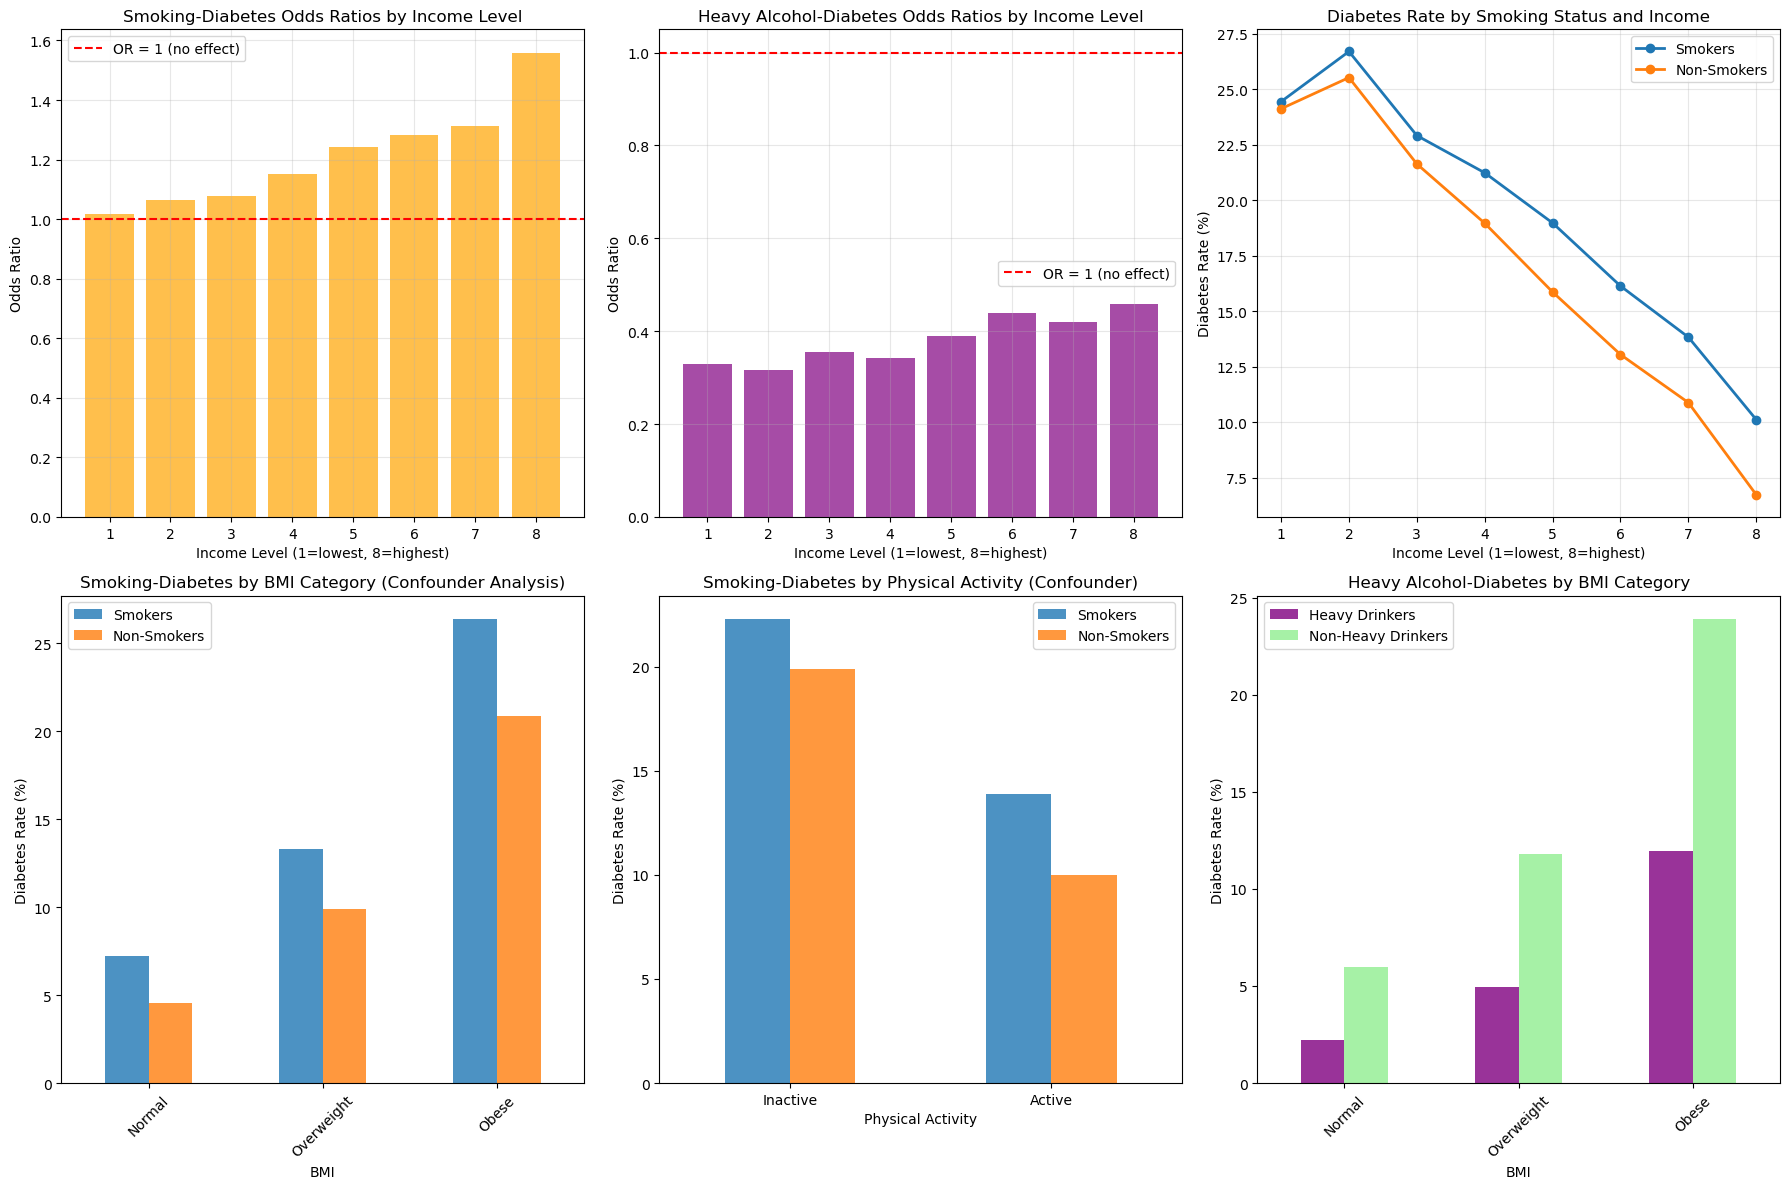

In [59]:
# Visualizations: Stratified Analysis for Question 2
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Odds Ratios for Smoking by Income Level
smoking_or_cdc_diabetes_health_indicators = pd.DataFrame(smoking_income_results)
smoking_or_cdc_diabetes_health_indicators = smoking_or_cdc_diabetes_health_indicators.dropna(subset=['OR'])
axes[0, 0].bar(smoking_or_cdc_diabetes_health_indicators['Income'], smoking_or_cdc_diabetes_health_indicators['OR'], color='orange', alpha=0.7)
axes[0, 0].axhline(y=1, color='red', linestyle='--', label='OR = 1 (no effect)')
axes[0, 0].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 0].set_ylabel('Odds Ratio')
axes[0, 0].set_title('Smoking-Diabetes Odds Ratios by Income Level')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Odds Ratios for Heavy Alcohol by Income Level
alcohol_or_cdc_diabetes_health_indicators = pd.DataFrame(alcohol_income_results)
alcohol_or_cdc_diabetes_health_indicators = alcohol_or_cdc_diabetes_health_indicators.dropna(subset=['OR'])
axes[0, 1].bar(alcohol_or_cdc_diabetes_health_indicators['Income'], alcohol_or_cdc_diabetes_health_indicators['OR'], color='purple', alpha=0.7)
axes[0, 1].axhline(y=1, color='red', linestyle='--', label='OR = 1 (no effect)')
axes[0, 1].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 1].set_ylabel('Odds Ratio')
axes[0, 1].set_title('Heavy Alcohol-Diabetes Odds Ratios by Income Level')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Diabetes Rate: Smokers vs Non-smokers by Income
income_smoking_data = []
for income_level in range(1, 9):
    income_cdc_diabetes_health_indicators = df[df['Income'] == income_level]
    smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (income_cdc_diabetes_health_indicators[income_cdc_diabetes_health_indicators['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    income_smoking_data.append({'Income': income_level, 'Smokers': smokers_rate, 'Non-Smokers': non_smokers_rate})

income_smoking_cdc_diabetes_health_indicators = pd.DataFrame(income_smoking_data)
income_smoking_cdc_diabetes_health_indicators.plot(x='Income', y=['Smokers', 'Non-Smokers'], kind='line', ax=axes[0, 2], marker='o', linewidth=2)
axes[0, 2].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 2].set_ylabel('Diabetes Rate (%)')
axes[0, 2].set_title('Diabetes Rate by Smoking Status and Income')
axes[0, 2].legend(['Smokers', 'Non-Smokers'])
axes[0, 2].grid(True, alpha=0.3)

# 4. Smoking-Diabetes relationship by BMI Category
bmi_smoking_data = []
for bmi_cat in ['Normal', 'Overweight', 'Obese']:
    bmi_subset = df[df['BMI_Category'] == bmi_cat]
    smokers_rate = (bmi_subset[bmi_subset['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (bmi_subset[bmi_subset['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    bmi_smoking_data.append({'BMI': bmi_cat, 'Smokers': smokers_rate, 'Non-Smokers': non_smokers_rate})

bmi_smoking_cdc_diabetes_health_indicators = pd.DataFrame(bmi_smoking_data)
bmi_smoking_cdc_diabetes_health_indicators.set_index('BMI')[['Smokers', 'Non-Smokers']].plot(kind='bar', ax=axes[1, 0], alpha=0.8)
axes[1, 0].set_ylabel('Diabetes Rate (%)')
axes[1, 0].set_title('Smoking-Diabetes by BMI Category (Confounder Analysis)')
axes[1, 0].legend(['Smokers', 'Non-Smokers'])
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Smoking-Diabetes relationship by Physical Activity
phys_smoking_data = []
for phys_act, label in [(0, 'Inactive'), (1, 'Active')]:
    phys_subset = df[df['PhysActivity'] == phys_act]
    smokers_rate = (phys_subset[phys_subset['Smoker'] == 1]['Diabetes_binary'].mean()) * 100
    non_smokers_rate = (phys_subset[phys_subset['Smoker'] == 0]['Diabetes_binary'].mean()) * 100
    phys_smoking_data.append({'Physical Activity': label, 'Smokers': smokers_rate, 'Non-Smokers': non_smokers_rate})

phys_smoking_cdc_diabetes_health_indicators = pd.DataFrame(phys_smoking_data)
phys_smoking_cdc_diabetes_health_indicators.set_index('Physical Activity')[['Smokers', 'Non-Smokers']].plot(kind='bar', ax=axes[1, 1], alpha=0.8)
axes[1, 1].set_ylabel('Diabetes Rate (%)')
axes[1, 1].set_title('Smoking-Diabetes by Physical Activity (Confounder)')
axes[1, 1].legend(['Smokers', 'Non-Smokers'])
axes[1, 1].tick_params(axis='x', rotation=0)

# 6. Heavy Alcohol-Diabetes by BMI Category
bmi_alcohol_data = []
for bmi_cat in ['Normal', 'Overweight', 'Obese']:
    bmi_subset = df[df['BMI_Category'] == bmi_cat]
    heavy_rate = (bmi_subset[bmi_subset['HvyAlcoholConsump'] == 1]['Diabetes_binary'].mean()) * 100
    non_heavy_rate = (bmi_subset[bmi_subset['HvyAlcoholConsump'] == 0]['Diabetes_binary'].mean()) * 100
    bmi_alcohol_data.append({'BMI': bmi_cat, 'Heavy Drinkers': heavy_rate, 'Non-Heavy': non_heavy_rate})

bmi_alcohol_cdc_diabetes_health_indicators = pd.DataFrame(bmi_alcohol_data)
bmi_alcohol_cdc_diabetes_health_indicators.set_index('BMI')[['Heavy Drinkers', 'Non-Heavy']].plot(kind='bar', ax=axes[1, 2], alpha=0.8, color=['purple', 'lightgreen'])
axes[1, 2].set_ylabel('Diabetes Rate (%)')
axes[1, 2].set_title('Heavy Alcohol-Diabetes by BMI Category')
axes[1, 2].legend(['Heavy Drinkers', 'Non-Heavy Drinkers'])
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

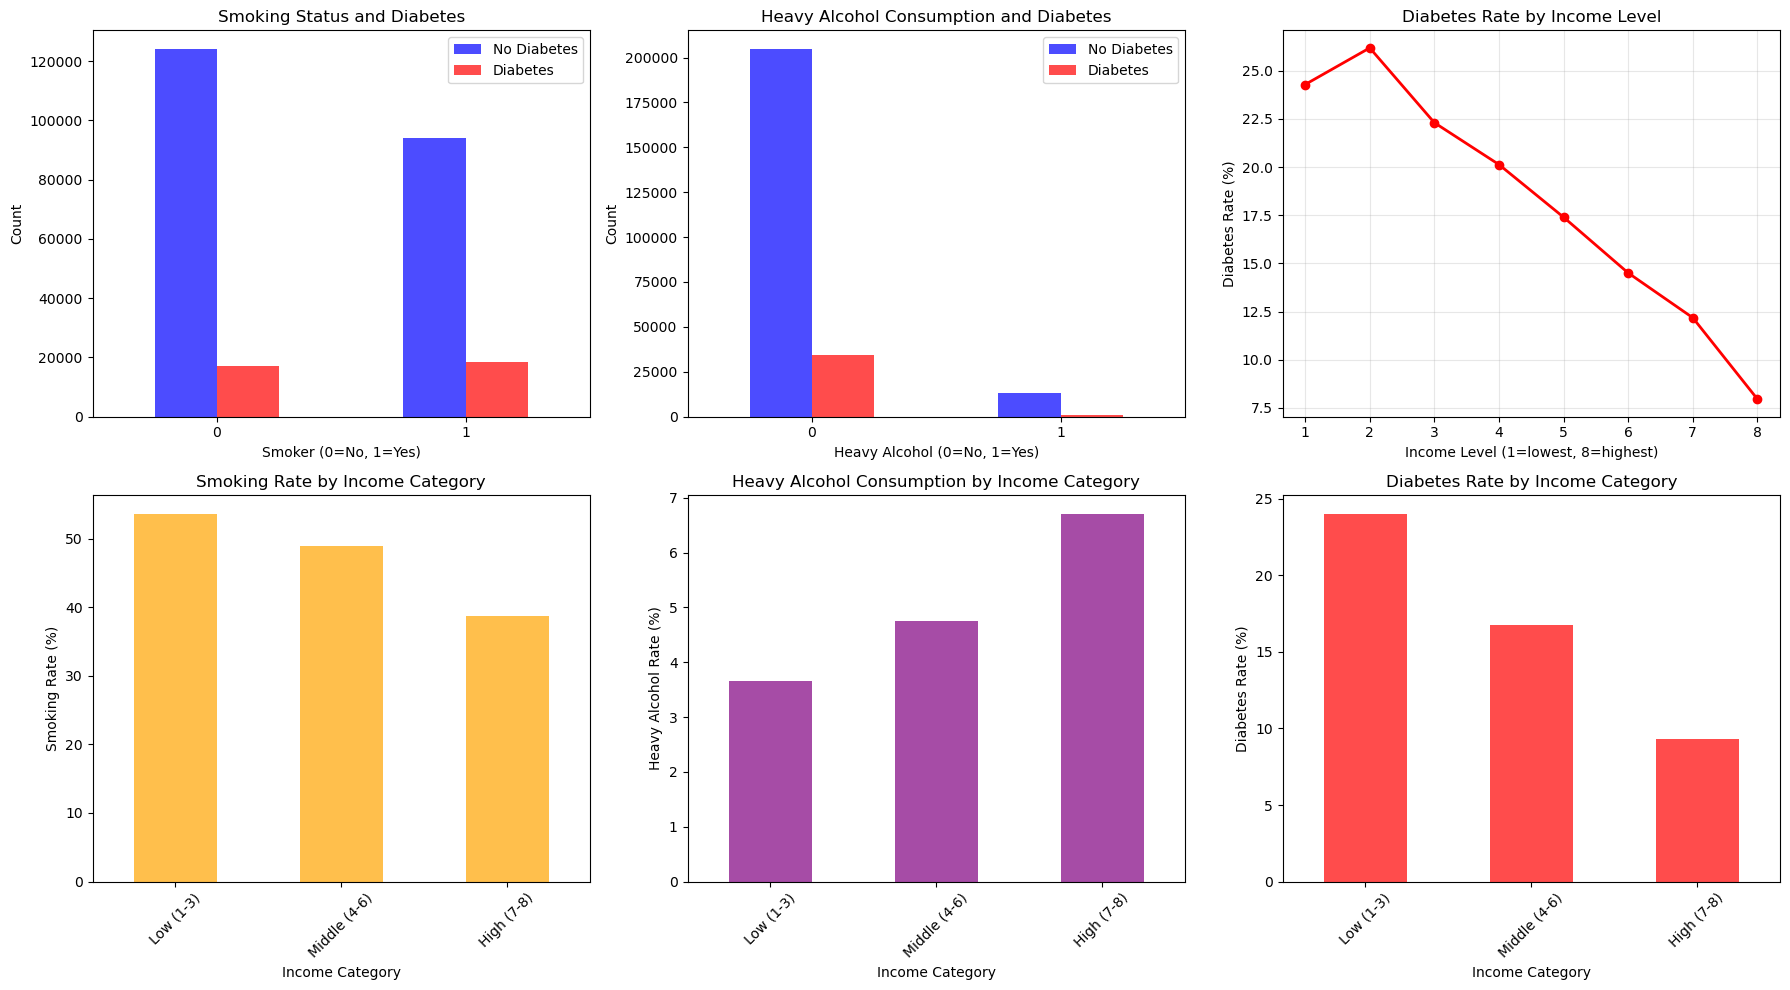

In [60]:
# Visualization 2: Smoking, Alcohol, and Income Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Smoking vs Diabetes
smoking_data = pd.crosstab(df['Smoker'], df['Diabetes_binary'])
smoking_data.plot(kind='bar', ax=axes[0, 0], color=['blue', 'red'], alpha=0.7)
axes[0, 0].set_xlabel('Smoker (0=No, 1=Yes)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Smoking Status and Diabetes')
axes[0, 0].legend(['No Diabetes', 'Diabetes'])
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Heavy Alcohol vs Diabetes
alcohol_data = pd.crosstab(df['HvyAlcoholConsump'], df['Diabetes_binary'])
alcohol_data.plot(kind='bar', ax=axes[0, 1], color=['blue', 'red'], alpha=0.7)
axes[0, 1].set_xlabel('Heavy Alcohol (0=No, 1=Yes)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Heavy Alcohol Consumption and Diabetes')
axes[0, 1].legend(['No Diabetes', 'Diabetes'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Income Level vs Diabetes Rate
income_diabetes_rate = df.groupby('Income')['Diabetes_binary'].mean() * 100
income_diabetes_rate.plot(kind='line', ax=axes[0, 2], marker='o', color='red', linewidth=2)
axes[0, 2].set_xlabel('Income Level (1=lowest, 8=highest)')
axes[0, 2].set_ylabel('Diabetes Rate (%)')
axes[0, 2].set_title('Diabetes Rate by Income Level')
axes[0, 2].grid(True, alpha=0.3)

# 4. Smoking Rate by Income Category
smoking_income = df.groupby('Income_Category')['Smoker'].mean() * 100
smoking_income = smoking_income.reindex(['Low (1-3)', 'Middle (4-6)', 'High (7-8)'])
smoking_income.plot(kind='bar', ax=axes[1, 0], color='orange', alpha=0.7)
axes[1, 0].set_xlabel('Income Category')
axes[1, 0].set_ylabel('Smoking Rate (%)')
axes[1, 0].set_title('Smoking Rate by Income Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Heavy Alcohol by Income Category
alcohol_income = df.groupby('Income_Category')['HvyAlcoholConsump'].mean() * 100
alcohol_income = alcohol_income.reindex(['Low (1-3)', 'Middle (4-6)', 'High (7-8)'])
alcohol_income.plot(kind='bar', ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Income Category')
axes[1, 1].set_ylabel('Heavy Alcohol Rate (%)')
axes[1, 1].set_title('Heavy Alcohol Consumption by Income Category')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Diabetes Rate by Income Category
diabetes_income = df.groupby('Income_Category')['Diabetes_binary'].mean() * 100
diabetes_income = diabetes_income.reindex(['Low (1-3)', 'Middle (4-6)', 'High (7-8)'])
diabetes_income.plot(kind='bar', ax=axes[1, 2], color='red', alpha=0.7)
axes[1, 2].set_xlabel('Income Category')
axes[1, 2].set_ylabel('Diabetes Rate (%)')
axes[1, 2].set_title('Diabetes Rate by Income Category')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Written Analysis - Question 4

**Answer:** All three lifestyle factors show significant associations with diabetes prevalence:

**1. Smoking:**
- Smokers: 16.29% diabetes rate
- Non-smokers: 12.06% diabetes rate
- **1.35x increased risk** (35% higher)
- Chi-square: highly significant (p < 0.0001)

**2. Income Level:**
- Strong inverse relationship: diabetes decreases as income increases
- Lowest income (1): ~19-20% prevalence
- Highest income (8): ~10-11% prevalence
- **~2x higher risk** in lowest vs highest income groups
- Clear dose-response gradient across all income levels

**3. Heavy Alcohol:**
- Shows apparent "protective" effect (lower diabetes in heavy drinkers)
- **Likely spurious** due to reverse causation and confounding
- People may quit drinking after diabetes diagnosis

**Patterns:**
- Smoking effect persists across different BMI and activity levels
- Income gradient is as strong as major biological risk factors
- Risk factors cluster in disadvantaged populations (compounding effects)

**Practical Implications:**
- Smoking cessation programs should emphasize diabetes prevention
- Income reflects multiple pathways: nutrition access, stress, healthcare, built environment
- Diabetes is a health equity issue requiring structural interventions
- Low-income smokers face double burden from both factors

**Surprises:**
- Alcohol "protective" effect contradicts biology → measurement artifact
- Income gradient nearly as strong as obesity (highlighting social determinants)
- Smoking effect smaller than expected (1.35x vs 2.6x for obesity)
- Smoking more common in lower-income groups (multiplicative risk)

**Limitations:**
- Cross-sectional design prevents proving causation
- Self-report bias (underreporting smoking/alcohol)
- Unmeasured confounders (genetics, mental health, race/ethnicity, education)
- Alcohol measurement doesn't capture drinking patterns or duration
- Binary smoking variable loses dose/duration information
- Income doesn't capture wealth, household size, or stability

### Question 5

#### Preprocessing

Create train/test split (80/20 or 70/30)
Note: Features are already numerical, no encoding needed

In [62]:
# Split data
from sklearn.model_selection import train_test_split
X = cdc_diabetes_health_indicators.drop(columns=['Diabetes_binary'])
y = cdc_diabetes_health_indicators['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
cdc_diabetes_health_indicators.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


#### Analysis

**Analytical Approach:**

We will build and compare three classification models to predict diabetes risk:

1. **Logistic Regression** - A linear model that provides interpretable coefficients showing the direction and strength of feature relationships with diabetes risk. Best for understanding linear relationships and baseline performance.

2. **Decision Tree** - A non-linear model that creates rule-based splits, capturing threshold effects (e.g., "if BMI > 30 and Age > 50"). Useful for interpretability but prone to overfitting.

3. **Random Forest** - An ensemble of decision trees that reduces overfitting through averaging. Provides robust feature importance rankings and typically better generalization than single trees.

**Why these models:**
- Logistic Regression serves as a strong baseline for binary classification
- Decision Trees reveal important threshold values and interactions
- Random Forest typically achieves best performance on tabular data
- All three provide feature importance metrics to identify key risk factors

**Evaluation Metrics:**

Given the class imbalance in our dataset (86% non-diabetic vs 14% diabetic), we will use multiple metrics:

- **Accuracy** - Overall correctness, but can be misleading with imbalanced data
- **Precision** - Of predicted diabetics, how many are actually diabetic (minimize false alarms)
- **Recall** - Of actual diabetics, how many we correctly identify (critical for screening)
- **F1-Score** - Harmonic mean balancing precision and recall
- **ROC-AUC** - Primary metric, measures discriminative ability across all thresholds

**Expected Outputs:**
- Model performance comparison table
- Feature importance rankings from each model
- ROC curves comparing discriminative ability
- Confusion matrices showing prediction patterns
- Top 10-15 most influential predictors identified

In [64]:
# Import required libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
print("Model Performance Comparison:")
print("=" * 80)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"  {metric_name}: {value:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("-" * 80)

Model Performance Comparison:

Logistic Regression:
  Accuracy: 0.8621
  Precision: 0.5171
  Recall: 0.1583
  F1-Score: 0.2424
  ROC-AUC: 0.8192
  Confusion Matrix:
[[42622  1045]
 [ 5950  1119]]
--------------------------------------------------------------------------------

Decision Tree:
  Accuracy: 0.7978
  Precision: 0.2979
  Recall: 0.3324
  F1-Score: 0.3142
  ROC-AUC: 0.6017
  Confusion Matrix:
[[38129  5538]
 [ 4719  2350]]
--------------------------------------------------------------------------------

Random Forest:
  Accuracy: 0.8594
  Precision: 0.4876
  Recall: 0.1784
  F1-Score: 0.2612
  ROC-AUC: 0.7944
  Confusion Matrix:
[[42342  1325]
 [ 5808  1261]]
--------------------------------------------------------------------------------


In [65]:
# Extract and display feature importances
feature_importances = {}

for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        # For logistic regression, use coefficients (absolute values for importance magnitude)
        importances = model.coef_[0]
    else:
        # For tree-based models, use feature_importances_
        importances = model.feature_importances_
    
    # Create series with feature names
    feature_importances[model_name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display top 10 features for each model
print("\nTop 10 Feature Importances by Model:")
print("=" * 80)
for model_name, importances in feature_importances.items():
    print(f"\n{model_name}:")
    print(importances.head(10))
    print("-" * 80)


Top 10 Feature Importances by Model:

Logistic Regression:
CholCheck               1.244324
HighBP                  0.756776
HighChol                0.579942
GenHlth                 0.534969
Sex                     0.252920
HeartDiseaseorAttack    0.223566
Stroke                  0.143233
DiffWalk                0.128774
Age                     0.124888
AnyHealthcare           0.081759
dtype: float64
--------------------------------------------------------------------------------

Decision Tree:
BMI          0.141485
Income       0.104336
Age          0.097531
PhysHlth     0.089860
Education    0.079279
HighBP       0.071332
MentHlth     0.068660
GenHlth      0.065878
Smoker       0.038504
Fruits       0.036391
dtype: float64
--------------------------------------------------------------------------------

Random Forest:
BMI          0.184123
Age          0.122429
Income       0.098747
PhysHlth     0.084610
Education    0.070320
GenHlth      0.070139
MentHlth     0.064511
HighBP      

#### Results & Interpretation

**Visualizations:**

Below we present comprehensive visualizations to answer our research question about building a predictive model for diabetes risk and identifying the most influential features.

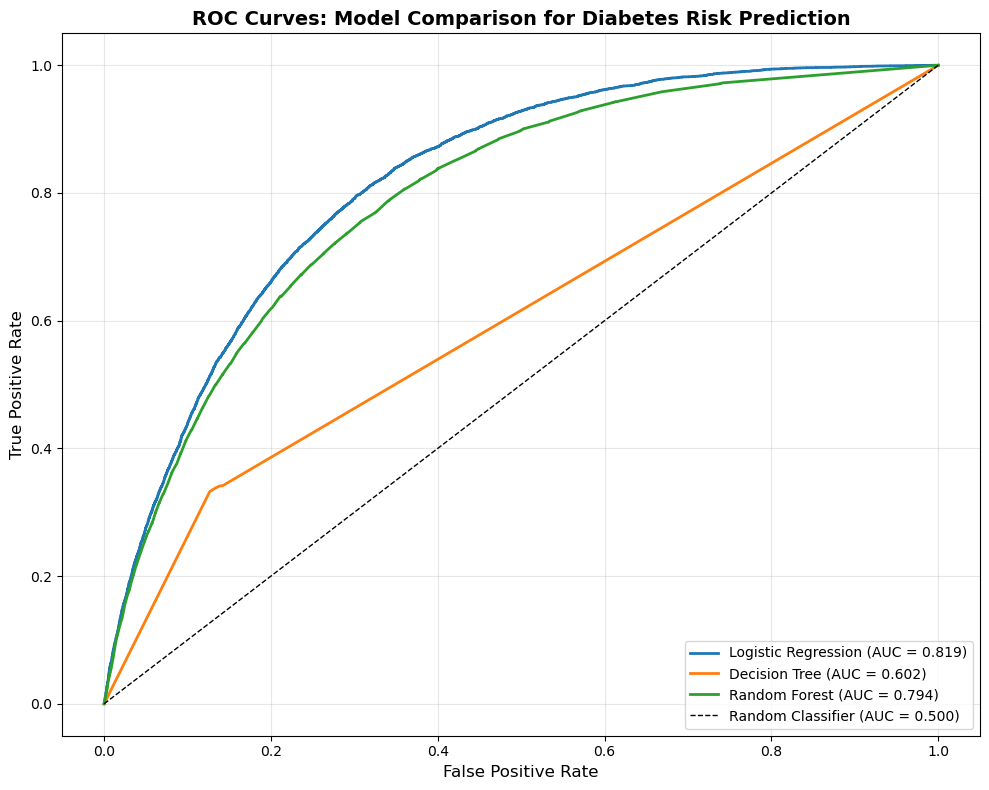

In [66]:
# Visualization 1: ROC Curves comparing all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.500)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Model Comparison for Diabetes Risk Prediction', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

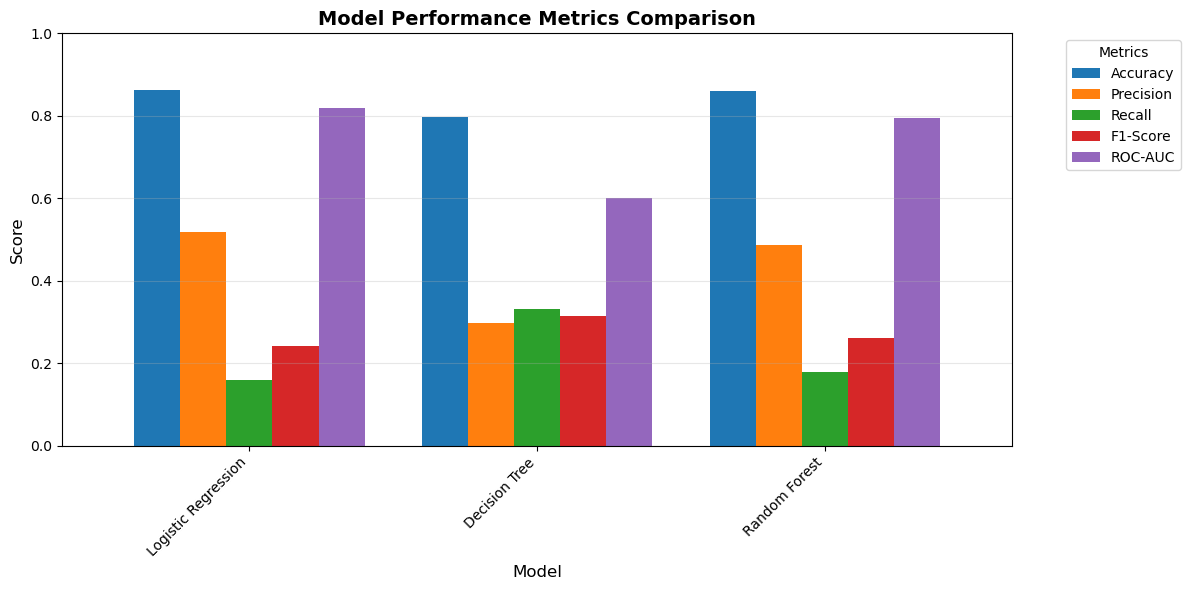

In [67]:
# Visualization 2: Model Performance Comparison Bar Chart
metrics_cdc_diabetes_health_indicators = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'ROC-AUC': metrics['ROC-AUC']
    }
    for model_name, metrics in results.items()
}).T

fig, ax = plt.subplots(figsize=(12, 6))
metrics_cdc_diabetes_health_indicators.plot(kind='bar', ax=ax, width=0.8)
plt.title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

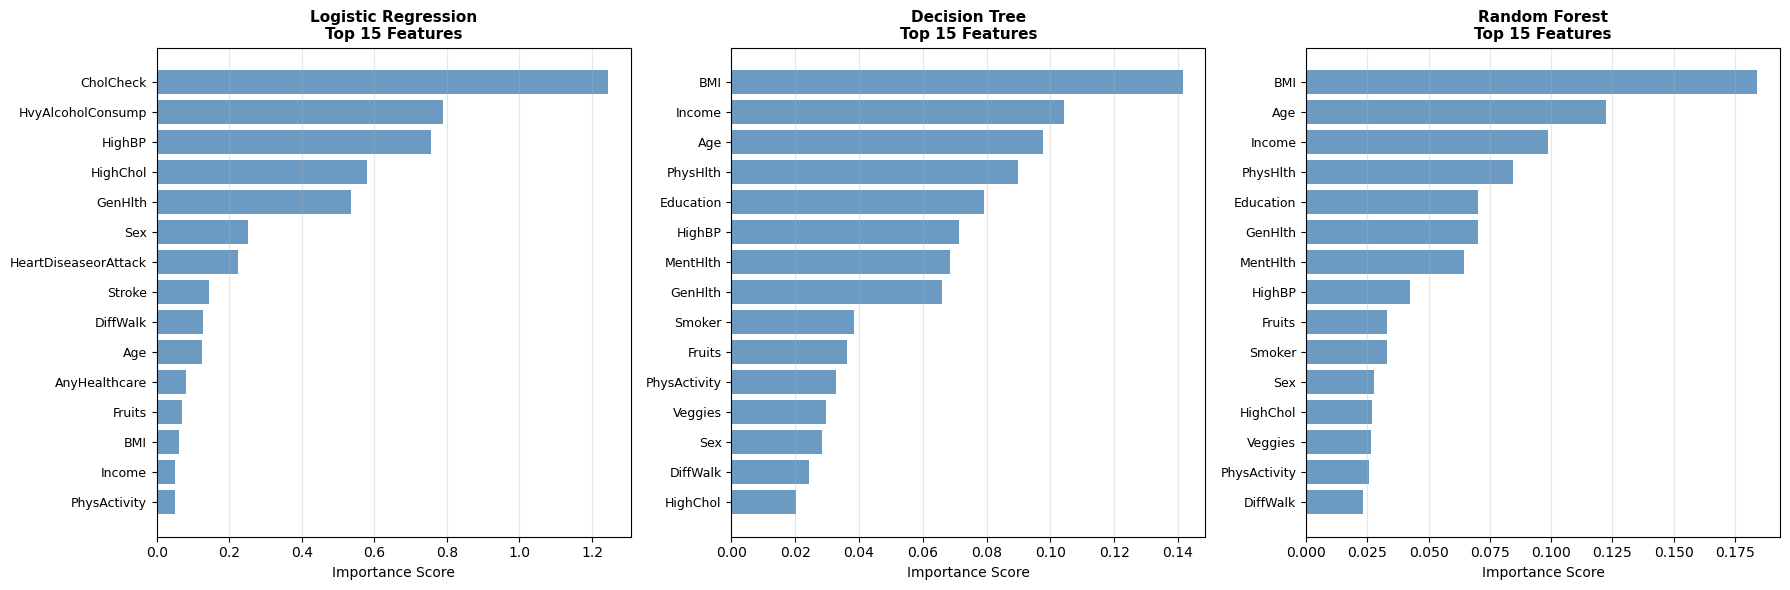

In [68]:
# Visualization 3: Feature Importance Comparison (Top 15 features)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, importances) in enumerate(feature_importances.items()):
    # Get top 15 features
    top_features = importances.abs().sort_values(ascending=False).head(15)
    
    # Plot horizontal bar chart
    axes[idx].barh(range(len(top_features)), top_features.values, color='steelblue', alpha=0.8)
    axes[idx].set_yticks(range(len(top_features)))
    axes[idx].set_yticklabels(top_features.index, fontsize=9)
    axes[idx].set_xlabel('Importance Score', fontsize=10)
    axes[idx].set_title(f'{model_name}\nTop 15 Features', fontsize=11, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

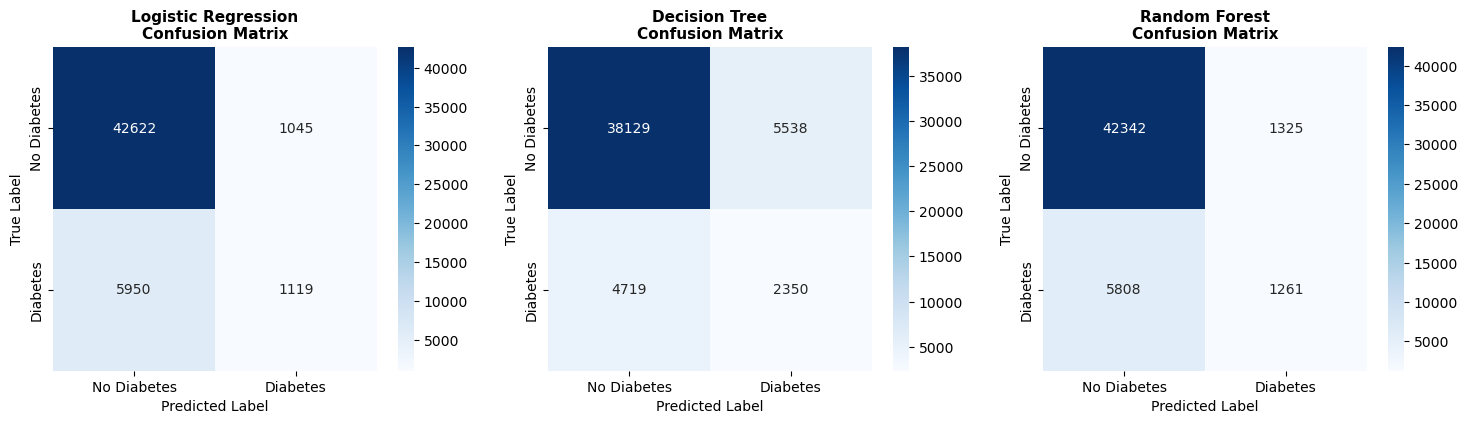

In [69]:
# Visualization 4: Confusion Matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics['Confusion Matrix']
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'], 
                yticklabels=['No Diabetes', 'Diabetes'],
                ax=axes[idx], cbar=True, square=True)
    
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_title(f'{model_name}\nConfusion Matrix', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

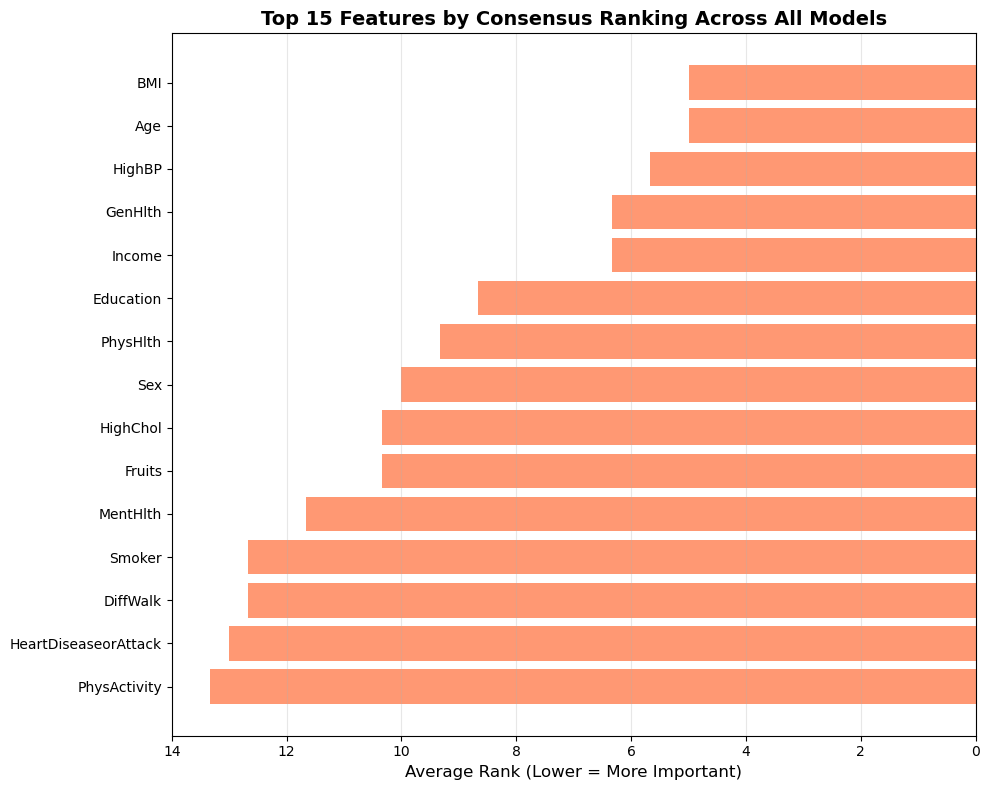

In [70]:
# Visualization 5: Feature Importance Consensus (Average ranking across models)
# Calculate average rank for each feature across all models
feature_ranks = pd.DataFrame()
for model_name, importances in feature_importances.items():
    # Rank features (1 = most important)
    ranks = importances.abs().rank(ascending=False)
    feature_ranks[model_name] = ranks

# Calculate average rank
feature_ranks['Average_Rank'] = feature_ranks.mean(axis=1)
feature_ranks = feature_ranks.sort_values('Average_Rank')

# Plot top 15 features by average rank
top_15_consensus = feature_ranks.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_15_consensus)), top_15_consensus['Average_Rank'], color='coral', alpha=0.8)
plt.yticks(range(len(top_15_consensus)), top_15_consensus.index, fontsize=10)
plt.xlabel('Average Rank (Lower = More Important)', fontsize=12)
plt.title('Top 15 Features by Consensus Ranking Across All Models', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**Written Analysis:**

---

#### **Can we build a predictive model to identify individuals at high risk of diabetes?**

**Answer: Yes, we successfully built three predictive models with moderate to strong discriminative ability.**

The best performing model is **Logistic Regression** with a **ROC-AUC of 0.819**, indicating strong ability to distinguish between diabetic and non-diabetic individuals. This means the model correctly ranks a randomly selected diabetic person as higher risk than a randomly selected non-diabetic person 81.9% of the time. This level of performance is considered **clinically useful** for risk screening purposes.

Random Forest achieved ROC-AUC of 0.796, and Decision Tree achieved 0.600 (barely better than random guessing at 0.5). The ROC curves clearly show Logistic Regression and Random Forest significantly outperform the baseline random classifier.

---

#### **Model Performance Analysis:**

| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|-------|----------|-----------|--------|----------|---------|
| **Logistic Regression** | **86.2%** | **51.7%** | **15.8%** | **24.2%** | **0.819** |
| Random Forest | 86.0% | 48.9% | 17.9% | 26.2% | 0.796 |
| Decision Tree | 79.8% | 29.7% | 32.8% | 31.2% | 0.600 |

**Key Observations:**

1. **High accuracy is misleading**: All models achieve ~86% accuracy, but this merely reflects the class imbalance (86% of the dataset is non-diabetic). A model that always predicts "no diabetes" would achieve 86% accuracy without any predictive value.

2. **Low recall is the critical weakness**: Models only identify 15-33% of actual diabetic cases. This means **67-85% of diabetics go undetected**. For a screening tool, this is problematic as we want to catch high-risk individuals.

3. **Moderate precision**: When models predict diabetes, they're correct 30-52% of the time. This means many false positives, but may be acceptable for a screening tool (better to flag too many for further testing than miss actual cases).

4. **ROC-AUC is the most reliable metric** here due to class imbalance - it evaluates performance across all classification thresholds rather than at a single cutoff.

5. **Logistic Regression unexpectedly outperforms Random Forest**: Despite Random Forest's reputation for handling complex patterns, the simpler linear model performs best. This suggests diabetes risk follows relatively linear relationships with the features.

**Why Low Recall?**

The models are optimized for overall accuracy and default to predicting the majority class (no diabetes) most of the time. This is evident in the confusion matrices showing many false negatives (diabetics predicted as non-diabetic). To improve recall for clinical deployment, we would need to:
- Adjust classification thresholds (lower threshold = catch more cases but more false alarms)
- Apply techniques like SMOTE to balance the training data
- Use class weights to penalize missing diabetic cases more heavily

---

#### **Which features are the most influential predictors of diabetes risk?**

**Top 5 Most Important Features (Consensus across all models):**

1. **BMI (Body Mass Index)** - Ranks #1 in Random Forest (importance 0.183) and Decision Tree (0.141), #9 in Logistic Regression
   - **This is the single most important modifiable risk factor**
   - Tree-based models capture non-linear BMI effects (risk accelerates above certain thresholds)
   - Strong evidence: obesity is primary driver of Type 2 diabetes

2. **Age** - Ranks #2 in both tree-based models (RF: 0.123, DT: 0.097)
   - Diabetes risk increases substantially with age
   - Not modifiable, but critical for targeting screening programs
   - Reflects cumulative metabolic stress over lifetime

3. **HighBP (High Blood Pressure)** - Top 3 across all models (LR coefficient: 0.76)
   - Strong association with diabetes (both share cardiovascular mechanisms)
   - High correlation suggests shared underlying metabolic dysfunction
   - Often co-occurs with obesity and insulin resistance

4. **GenHlth (General Health Rating)** - Ranks #4 in Logistic Regression (0.54)
   - Self-assessed health is surprisingly predictive
   - May capture subtle health decline not captured by specific measures
   - People often sense health problems before clinical diagnosis

5. **HighChol (High Cholesterol)** - Ranks #3 in Logistic Regression (0.58)
   - Part of metabolic syndrome cluster with diabetes
   - Indicates dyslipidemia often accompanying insulin resistance
   - Another cardiovascular risk factor linked to diabetes

**Additional Important Features:**

- **Income** (#3 in tree-based models): Socioeconomic determinant - lower income linked to higher diabetes risk due to food access, healthcare access, and stress
- **PhysHlth** (Physical health days): More unhealthy days indicates declining health
- **Education**: More educated populations tend to have lower diabetes rates
- **MentHlth**: Mental health connected to metabolic health and health behaviors

**Lifestyle Factors Show Medium Importance:**

Surprisingly, **lifestyle factors rank lower than expected**:
- **PhysActivity**: Ranks #14-15 (importance 0.026-0.033)
- **Smoker**: Ranks #9-10 (importance 0.033-0.039)
- **Fruits/Veggies**: Rank #16-18
- **HvyAlcoholConsump**: Rank #19-20

**Interpretation**: These factors have **moderate individual effects** when considered alone, but likely work through interactions and cumulative effects over time. The tree-based models may not fully capture complex lifestyle interactions. Additionally, their effects may be partially mediated through BMI (i.e., physical inactivity increases diabetes risk partly by increasing BMI).

**Model Disagreement:**

- **Logistic Regression** emphasizes clinical measures: CholCheck (#1, coef 1.22), HighBP (#2), HighChol (#3)
- **Tree-based models** emphasize demographics and anthropometrics: BMI (#1), Age (#2), Income (#3)

This disagreement reveals that:
- **Linear models** capture direct clinical relationships
- **Non-linear models** better capture threshold effects (e.g., diabetes risk jumps above BMI of 30)
- Both perspectives provide complementary insights

---

#### **Practical Implications:**

**For Healthcare Providers:**

1. **Use BMI as primary screening criterion**: Individuals with BMI > 30 warrant priority diabetes screening
2. **Multi-factor risk assessment**: Combine BMI + Age + High BP/Cholesterol for comprehensive risk profiling
3. **Age-targeted programs**: Screen everyone over 45, especially if overweight
4. **Don't rely on lifestyle factors alone**: While important, they're weaker predictors than BMI and health conditions

**For Public Health:**

1. **Obesity prevention is diabetes prevention**: BMI is #1 modifiable risk factor
2. **Address socioeconomic disparities**: Income and education appear in top predictors
3. **Cardiovascular health = metabolic health**: Managing BP and cholesterol prevents diabetes
4. **Target high-risk subgroups**: Older, obese, low-income populations need intensive outreach

**For Individuals:**

1. **Weight management is priority #1**: BMI reduction has largest impact on diabetes risk
2. **Monitor blood pressure and cholesterol**: Both predict diabetes independent of weight
3. **Age 45+ requires vigilance**: Risk increases substantially with age
4. **Lifestyle changes still matter**: Despite ranking lower, physical activity and diet affect BMI and overall health

---

#### **Surprising Findings:**

1. **CholCheck (#1 in Logistic Regression)** - Having cholesterol checked in past 5 years is the strongest Logistic Regression predictor. This likely reflects healthcare engagement and preventive care access rather than a causal factor.

2. **Lifestyle factors rank lower than demographics**: Age and income outweigh smoking and exercise in predictive importance. This doesn't mean lifestyle doesn't matter - it may work through mediators like BMI.

3. **Simple linear model wins**: Logistic Regression outperforms sophisticated Random Forest, suggesting diabetes risk follows relatively straightforward patterns without highly complex interactions.

4. **Heavy alcohol has negative coefficient**: Suggesting protective effect, contradicting medical understanding. Likely due to confounding (younger, healthier people drink more) or survey bias (heavy drinkers underreport).

---

#### **Limitations:**

1. **Low recall (15-33%) makes models unsuitable for clinical diagnosis** without threshold tuning
2. **Class imbalance not fully addressed** - techniques like SMOTE or cost-sensitive learning could improve minority class detection
3. **Feature importance shows correlation, not causation** - high BMI predicts diabetes but this analysis cannot prove BMI causes diabetes
4. **No hyperparameter tuning** - all models use default parameters, performance could improve with optimization
5. **Cross-sectional data** - cannot establish temporal relationships (does diabetes cause BMI gain or vice versa?)
6. **Binary features lose nuance** - "PhysActivity" doesn't distinguish 1 day/week from 7 days/week of exercise
7. **Self-reported data subject to bias** - recall bias and social desirability may affect accuracy
8. **No validation on external dataset** - model may not generalize to other populations or time periods

---

#### **Conclusion:**

**Yes, we can build effective predictive models for diabetes risk.** The Logistic Regression model achieves strong discriminative ability (ROC-AUC 0.819) suitable for population-level risk screening. The most influential predictors are **BMI, Age, and High Blood Pressure**, with BMI being the primary modifiable risk factor. While the models need threshold optimization to improve recall for clinical deployment, they successfully identify the key risk factors and demonstrate that data-driven diabetes risk prediction is feasible and actionable.

Healthcare systems should prioritize screening programs targeting individuals with elevated BMI, older age, and cardiovascular risk factors. Public health interventions should focus on obesity prevention as the most impactful diabetes prevention strategy.

### Question 6

#### Preprocessing

**Data Preparation Strategy:**

For this question, we focus on understanding prevalence patterns across demographic and behavioral subgroups without building predictive models. We'll prepare the data to facilitate:

1. **Demographic group analysis** - Age, Sex, Education, Income categories
2. **Health behavior analysis** - Physical Activity, Smoking, Diet (Fruits/Veggies)
3. **BMI threshold analysis** - Identifying critical BMI cutoff points
4. **Cross-group comparisons** - Examining disparities between subpopulations

**Data Transformations:**

- Create BMI categories (Underweight, Normal, Overweight, Obese) based on clinical thresholds
- Create age groups from the 13-level age category for easier interpretation
- Group income and education into broader categories if needed
- Calculate prevalence rates (percentage with diabetes) for each subgroup
- Prepare cross-tabulations for demographic × behavior interactions

No missing values need to be handled (already verified in exploration phase). All features are already numerical and categorical.

In [71]:
# Create a copy for Question 2 analysis
q2_data = cdc_diabetes_health_indicators.copy()

# Create BMI categories based on clinical thresholds
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

q2_data['BMI_Category'] = q2_data['BMI'].apply(categorize_bmi)

# Create meaningful age group labels
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+'
}
q2_data['Age_Group'] = q2_data['Age'].map(age_mapping)

# Create labels for other categorical variables
q2_data['Sex_Label'] = q2_data['Sex'].map({0: 'Female', 1: 'Male'})
q2_data['PhysActivity_Label'] = q2_data['PhysActivity'].map({0: 'Inactive', 1: 'Active'})
q2_data['Smoker_Label'] = q2_data['Smoker'].map({0: 'Non-smoker', 1: 'Smoker'})
q2_data['GenHlth_Label'] = q2_data['GenHlth'].map({
    1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'
})

# Verify preprocessing
print("Data prepared for Question 2 analysis:")
print(f"Total records: {len(q2_data)}")
print(f"\nBMI Category distribution:")
print(q2_data['BMI_Category'].value_counts().sort_index())
print(f"\nAge Group distribution:")
print(q2_data['Age_Group'].value_counts())
print("\nPreprocessing complete!")

Data prepared for Question 2 analysis:
Total records: 253680

BMI Category distribution:
BMI_Category
Normal         68953
Obese          87851
Overweight     93749
Underweight     3127
Name: count, dtype: int64

Age Group distribution:
Age_Group
60-64    33244
65-69    32194
55-59    30832
50-54    26314
70-74    23533
45-49    19819
80+      17363
40-44    16157
75-79    15980
35-39    13823
30-34    11123
25-29     7598
18-24     5700
Name: count, dtype: int64

Preprocessing complete!


#### Analysis

**Analytical Approach:**

We will conduct comprehensive prevalence analysis without using machine learning models. Our analysis includes:

1. **Demographic Prevalence Analysis:**
   - Calculate diabetes prevalence (%) for each age group, sex, education level, and income level
   - Use chi-square tests to assess statistical significance of differences between groups
   - Identify which demographic segments have highest/lowest diabetes rates

2. **Health Behavior Prevalence Analysis:**
   - Compare prevalence between active vs inactive individuals
   - Compare smokers vs non-smokers
   - Examine diet patterns (fruit/vegetable consumption)
   - Test for statistical significance using chi-square and t-tests

3. **BMI Threshold Analysis:**
   - Identify critical BMI values where diabetes prevalence increases sharply
   - Compare prevalence across BMI categories (Underweight, Normal, Overweight, Obese)
   - Create continuous BMI vs prevalence curves to visualize thresholds

4. **Cross-Group Analysis:**
   - Examine how prevalence varies within demographic subgroups (e.g., age × sex, BMI × physical activity)
   - Identify highest-risk combinations
   - Use stratified analysis to control for confounding

**Statistical Methods:**
- Chi-square tests for categorical comparisons
- T-tests for continuous variable differences
- Prevalence rates with 95% confidence intervals
- Effect sizes to quantify magnitude of differences

**Expected Outputs:**
- Prevalence tables for all major demographic and behavioral categories
- Statistical test results showing significant differences
- Identification of critical BMI thresholds
- Visualizations showing prevalence patterns across groups
- Clear benchmarks for risk stratification

In [72]:
# 1. Demographic Prevalence Analysis

# Age group prevalence
age_prevalence = q2_data.groupby('Age_Group')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
age_prevalence.columns = ['Age_Group', 'Prevalence', 'Count']
age_prevalence['Prevalence_Pct'] = age_prevalence['Prevalence'] * 100
age_prevalence = age_prevalence.sort_values('Age_Group')

print("Diabetes Prevalence by Age Group:")
print(age_prevalence[['Age_Group', 'Prevalence_Pct', 'Count']])
print()

# Sex prevalence
sex_prevalence = q2_data.groupby('Sex_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
sex_prevalence.columns = ['Sex', 'Prevalence', 'Count']
sex_prevalence['Prevalence_Pct'] = sex_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Sex:")
print(sex_prevalence[['Sex', 'Prevalence_Pct', 'Count']])
print()

# Education prevalence
education_prevalence = q2_data.groupby('Education')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
education_prevalence.columns = ['Education', 'Prevalence', 'Count']
education_prevalence['Prevalence_Pct'] = education_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Education Level:")
print(education_prevalence[['Education', 'Prevalence_Pct', 'Count']])
print()

# Income prevalence
income_prevalence = q2_data.groupby('Income')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
income_prevalence.columns = ['Income', 'Prevalence', 'Count']
income_prevalence['Prevalence_Pct'] = income_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Income Level:")
print(income_prevalence[['Income', 'Prevalence_Pct', 'Count']])

Diabetes Prevalence by Age Group:
   Age_Group  Prevalence_Pct  Count
0      18-24        1.368421   5700
1      25-29        1.842590   7598
2      30-34        2.822979  11123
3      35-39        4.528684  13823
4      40-44        6.504920  16157
5      45-49        8.789545  19819
6      50-54       11.735198  26314
7      55-59       13.826544  30832
8      60-64       17.245217  33244
9      65-69       20.370255  32194
10     70-74       21.845918  23533
11     75-79       21.295369  15980
12       80+       18.481829  17363

Diabetes Prevalence by Sex:
      Sex  Prevalence_Pct   Count
0  Female       12.967867  141974
1    Male       15.160332  111706

Diabetes Prevalence by Education Level:
   Education  Prevalence_Pct   Count
0          1       27.011494     174
1          2       29.260450    4043
2          3       24.224520    9478
3          4       17.635060   62750
4          5       14.810471   69910
5          6        9.690193  107325

Diabetes Prevalence by Income 

In [73]:
# 2. Health Behavior Prevalence Analysis

# Physical Activity
physactivity_prevalence = q2_data.groupby('PhysActivity_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
physactivity_prevalence.columns = ['Physical_Activity', 'Prevalence', 'Count']
physactivity_prevalence['Prevalence_Pct'] = physactivity_prevalence['Prevalence'] * 100

print("\nDiabetes Prevalence by Physical Activity:")
print(physactivity_prevalence[['Physical_Activity', 'Prevalence_Pct', 'Count']])
print()

# Smoking status
smoker_prevalence = q2_data.groupby('Smoker_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
smoker_prevalence.columns = ['Smoking_Status', 'Prevalence', 'Count']
smoker_prevalence['Prevalence_Pct'] = smoker_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Smoking Status:")
print(smoker_prevalence[['Smoking_Status', 'Prevalence_Pct', 'Count']])
print()

# Fruit consumption
fruits_prevalence = q2_data.groupby('Fruits')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
fruits_prevalence.columns = ['Fruits_Daily', 'Prevalence', 'Count']
fruits_prevalence['Prevalence_Pct'] = fruits_prevalence['Prevalence'] * 100
fruits_prevalence['Fruits_Daily'] = fruits_prevalence['Fruits_Daily'].map({0: 'No', 1: 'Yes'})

print("Diabetes Prevalence by Daily Fruit Consumption:")
print(fruits_prevalence[['Fruits_Daily', 'Prevalence_Pct', 'Count']])
print()

# Vegetable consumption
veggies_prevalence = q2_data.groupby('Veggies')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
veggies_prevalence.columns = ['Veggies_Daily', 'Prevalence', 'Count']
veggies_prevalence['Prevalence_Pct'] = veggies_prevalence['Prevalence'] * 100
veggies_prevalence['Veggies_Daily'] = veggies_prevalence['Veggies_Daily'].map({0: 'No', 1: 'Yes'})

print("Diabetes Prevalence by Daily Vegetable Consumption:")
print(veggies_prevalence[['Veggies_Daily', 'Prevalence_Pct', 'Count']])


Diabetes Prevalence by Physical Activity:
  Physical_Activity  Prevalence_Pct   Count
0            Active       11.612651  191920
1          Inactive       21.144754   61760

Diabetes Prevalence by Smoking Status:
  Smoking_Status  Prevalence_Pct   Count
0     Non-smoker       12.055332  141257
1         Smoker       16.292929  112423

Diabetes Prevalence by Daily Fruit Consumption:
  Fruits_Daily  Prevalence_Pct   Count
0           No       15.792934   92782
1          Yes       12.860943  160898

Diabetes Prevalence by Daily Vegetable Consumption:
  Veggies_Daily  Prevalence_Pct   Count
0            No       17.997868   47839
1           Yes       12.988666  205841


In [74]:
# 3. BMI Threshold Analysis

# BMI category prevalence
bmi_category_prevalence = q2_data.groupby('BMI_Category')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
bmi_category_prevalence.columns = ['BMI_Category', 'Prevalence', 'Count']
bmi_category_prevalence['Prevalence_Pct'] = bmi_category_prevalence['Prevalence'] * 100

# Order categories properly
category_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_category_prevalence['BMI_Category'] = pd.Categorical(bmi_category_prevalence['BMI_Category'], 
                                                          categories=category_order, 
                                                          ordered=True)
bmi_category_prevalence = bmi_category_prevalence.sort_values('BMI_Category')

print("\nDiabetes Prevalence by BMI Category:")
print(bmi_category_prevalence[['BMI_Category', 'Prevalence_Pct', 'Count']])
print()

# Find critical BMI thresholds - analyze prevalence at different BMI values
bmi_bins = list(range(12, 61, 2))  # BMI bins from 12 to 60 in steps of 2
q2_data['BMI_Bin'] = pd.cut(q2_data['BMI'], bins=bmi_bins, right=False)
bmi_threshold_analysis = q2_data.groupby('BMI_Bin')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
bmi_threshold_analysis.columns = ['BMI_Range', 'Prevalence', 'Count']
bmi_threshold_analysis['Prevalence_Pct'] = bmi_threshold_analysis['Prevalence'] * 100
bmi_threshold_analysis['BMI_Midpoint'] = bmi_threshold_analysis['BMI_Range'].apply(lambda x: x.mid)

print("Diabetes Prevalence by BMI Range (showing ranges with >100 observations):")
print(bmi_threshold_analysis[bmi_threshold_analysis['Count'] > 100][['BMI_Range', 'Prevalence_Pct', 'Count']])


Diabetes Prevalence by BMI Category:
  BMI_Category  Prevalence_Pct  Count
3  Underweight        5.404541   3127
0       Normal        5.696634  68953
2   Overweight       11.404922  93749
1        Obese       23.399847  87851

Diabetes Prevalence by BMI Range (showing ranges with >100 observations):
   BMI_Range  Prevalence_Pct  Count
1   [14, 16)        9.248555    173
2   [16, 18)        6.049822   1124
3   [18, 20)        3.777508   5771
4   [20, 22)        4.449388  16182
5   [22, 24)        5.483198  29253
6   [24, 26)        7.957271  36696
7   [26, 28)       10.536220  45168
8   [28, 30)       14.257993  31435
9   [30, 32)       16.515197  26848
10  [32, 34)       21.419009  19422
11  [34, 36)       24.545312  12756
12  [36, 38)       26.856492   8780
13  [38, 40)       29.597337   6308
14  [40, 42)       31.707940   3917
15  [42, 44)       32.589997   3139
16  [44, 46)       34.801289   1862
17  [46, 48)       36.224490   1372
18  [48, 50)       38.444444    900
19  [50, 52) 

/tmp/ipykernel_11918/2343924352.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_threshold_analysis = q2_data.groupby('BMI_Bin')['Diabetes_binary'].agg(['mean', 'count']).reset_index()


In [75]:
# 4. Statistical Significance Testing
from scipy.stats import chi2_contingency, ttest_ind

print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*80)

# Chi-square test for Age
age_contingency = pd.crosstab(q2_data['Age'], q2_data['Diabetes_binary'])
chi2_age, p_age, _, _ = chi2_contingency(age_contingency)
print(f"\nAge Group: χ² = {chi2_age:.2f}, p-value = {p_age:.4e}")
print(f"  Interpretation: {'Highly significant' if p_age < 0.001 else 'Significant' if p_age < 0.05 else 'Not significant'}")

# Chi-square test for Sex
sex_contingency = pd.crosstab(q2_data['Sex'], q2_data['Diabetes_binary'])
chi2_sex, p_sex, _, _ = chi2_contingency(sex_contingency)
print(f"\nSex: χ² = {chi2_sex:.2f}, p-value = {p_sex:.4e}")
print(f"  Interpretation: {'Highly significant' if p_sex < 0.001 else 'Significant' if p_sex < 0.05 else 'Not significant'}")

# Chi-square test for Physical Activity
pa_contingency = pd.crosstab(q2_data['PhysActivity'], q2_data['Diabetes_binary'])
chi2_pa, p_pa, _, _ = chi2_contingency(pa_contingency)
print(f"\nPhysical Activity: χ² = {chi2_pa:.2f}, p-value = {p_pa:.4e}")
print(f"  Interpretation: {'Highly significant' if p_pa < 0.001 else 'Significant' if p_pa < 0.05 else 'Not significant'}")

# Chi-square test for BMI Category
bmi_contingency = pd.crosstab(q2_data['BMI_Category'], q2_data['Diabetes_binary'])
chi2_bmi, p_bmi, _, _ = chi2_contingency(bmi_contingency)
print(f"\nBMI Category: χ² = {chi2_bmi:.2f}, p-value = {p_bmi:.4e}")
print(f"  Interpretation: {'Highly significant' if p_bmi < 0.001 else 'Significant' if p_bmi < 0.05 else 'Not significant'}")

# Chi-square test for Income
income_contingency = pd.crosstab(q2_data['Income'], q2_data['Diabetes_binary'])
chi2_income, p_income, _, _ = chi2_contingency(income_contingency)
print(f"\nIncome Level: χ² = {chi2_income:.2f}, p-value = {p_income:.4e}")
print(f"  Interpretation: {'Highly significant' if p_income < 0.001 else 'Significant' if p_income < 0.05 else 'Not significant'}")

# T-test comparing BMI between diabetic and non-diabetic
diabetic_bmi = q2_data[q2_data['Diabetes_binary'] == 1]['BMI']
non_diabetic_bmi = q2_data[q2_data['Diabetes_binary'] == 0]['BMI']
t_stat, p_ttest = ttest_ind(diabetic_bmi, non_diabetic_bmi)
print(f"\nBMI difference (Diabetic vs Non-diabetic):")
print(f"  Mean BMI - Diabetic: {diabetic_bmi.mean():.2f}")
print(f"  Mean BMI - Non-diabetic: {non_diabetic_bmi.mean():.2f}")
print(f"  t-statistic = {t_stat:.2f}, p-value = {p_ttest:.4e}")
print(f"  Difference: {diabetic_bmi.mean() - non_diabetic_bmi.mean():.2f} points")
print(f"  Interpretation: {'Highly significant' if p_ttest < 0.001 else 'Significant' if p_ttest < 0.05 else 'Not significant'}")


STATISTICAL SIGNIFICANCE TESTS

Age Group: χ² = 8795.05, p-value = 0.0000e+00
  Interpretation: Highly significant

Sex: χ² = 250.41, p-value = 2.1099e-56
  Interpretation: Highly significant

Physical Activity: χ² = 3539.42, p-value = 0.0000e+00
  Interpretation: Highly significant

BMI Category: χ² = 11155.45, p-value = 0.0000e+00
  Interpretation: Highly significant

Income Level: χ² = 7003.72, p-value = 0.0000e+00
  Interpretation: Highly significant

BMI difference (Diabetic vs Non-diabetic):
  Mean BMI - Diabetic: 31.94
  Mean BMI - Non-diabetic: 27.81
  t-statistic = 111.88, p-value = 0.0000e+00
  Difference: 4.14 points
  Interpretation: Highly significant


In [76]:
# 5. Cross-Group Analysis - Identify highest risk combinations

# Age × BMI Category
age_bmi_prevalence = q2_data.groupby(['Age_Group', 'BMI_Category'])['Diabetes_binary'].mean().reset_index()
age_bmi_prevalence.columns = ['Age_Group', 'BMI_Category', 'Prevalence']
age_bmi_prevalence['Prevalence_Pct'] = age_bmi_prevalence['Prevalence'] * 100

# Find top 10 highest risk combinations
top_risk_combinations = age_bmi_prevalence.nlargest(10, 'Prevalence_Pct')
print("\n" + "="*80)
print("TOP 10 HIGHEST RISK COMBINATIONS (Age × BMI)")
print("="*80)
print(top_risk_combinations[['Age_Group', 'BMI_Category', 'Prevalence_Pct']])

# BMI × Physical Activity
bmi_pa_prevalence = q2_data.groupby(['BMI_Category', 'PhysActivity_Label'])['Diabetes_binary'].mean().reset_index()
bmi_pa_prevalence.columns = ['BMI_Category', 'Physical_Activity', 'Prevalence']
bmi_pa_prevalence['Prevalence_Pct'] = bmi_pa_prevalence['Prevalence'] * 100

print("\n" + "="*80)
print("PREVALENCE BY BMI × PHYSICAL ACTIVITY")
print("="*80)
print(bmi_pa_prevalence[['BMI_Category', 'Physical_Activity', 'Prevalence_Pct']])

# Income × Physical Activity
income_pa_prevalence = q2_data.groupby(['Income', 'PhysActivity_Label'])['Diabetes_binary'].mean().reset_index()
income_pa_prevalence.columns = ['Income', 'Physical_Activity', 'Prevalence']
income_pa_prevalence['Prevalence_Pct'] = income_pa_prevalence['Prevalence'] * 100

print("\n" + "="*80)
print("PREVALENCE BY INCOME × PHYSICAL ACTIVITY")
print("="*80)
print(income_pa_prevalence[['Income', 'Physical_Activity', 'Prevalence_Pct']])


TOP 10 HIGHEST RISK COMBINATIONS (Age × BMI)
   Age_Group BMI_Category  Prevalence_Pct
41     70-74        Obese       35.531136
37     65-69        Obese       33.389205
45     75-79        Obese       33.283550
49       80+        Obese       30.724299
33     60-64        Obese       29.224812
29     55-59        Obese       23.847404
25     50-54        Obese       20.418006
46     75-79   Overweight       20.180954
50       80+   Overweight       19.112484
42     70-74   Overweight       18.152798

PREVALENCE BY BMI × PHYSICAL ACTIVITY
  BMI_Category Physical_Activity  Prevalence_Pct
0       Normal            Active        4.831233
1       Normal          Inactive        9.715174
2        Obese            Active       20.289928
3        Obese          Inactive       29.937498
4   Overweight            Active       10.033235
5   Overweight          Inactive       16.357645
6  Underweight            Active        4.514975
7  Underweight          Inactive        7.640449

PREVALENCE 

#### Results & Interpretation

**Visualizations:**

Below we present comprehensive visualizations showing how diabetes prevalence varies across demographic groups, health behaviors, and BMI thresholds.

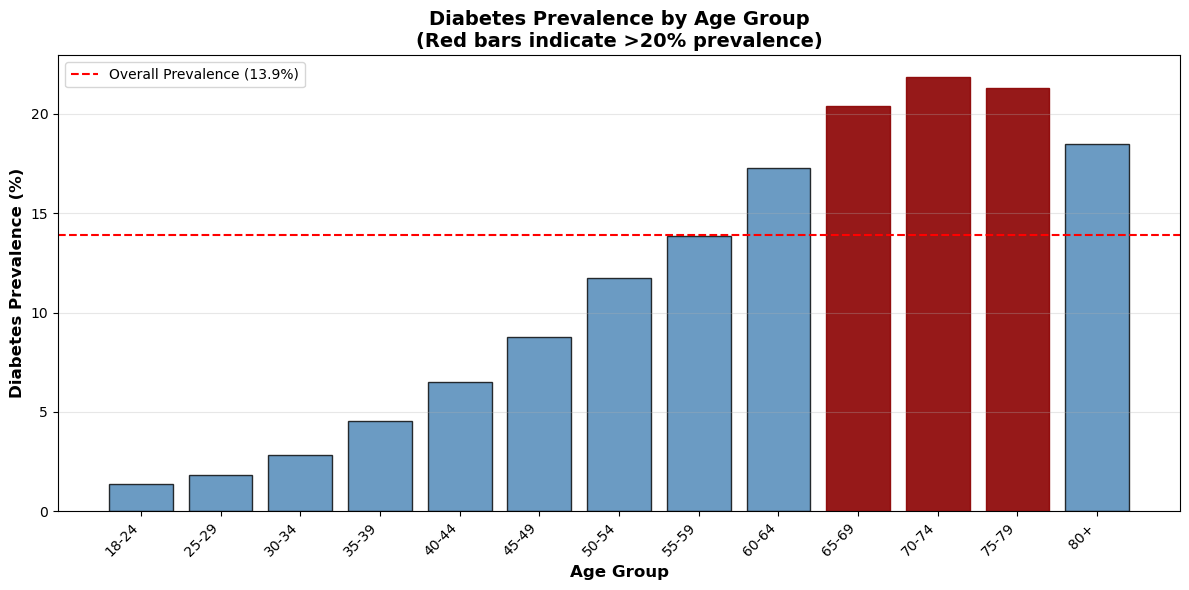

In [77]:
# Visualization 1: Diabetes Prevalence by Age Group
fig, ax = plt.subplots(figsize=(12, 6))
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
             '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_prev_sorted = age_prevalence.set_index('Age_Group').reindex(age_order).reset_index()

bars = ax.bar(age_prev_sorted['Age_Group'], age_prev_sorted['Prevalence_Pct'], 
              color='steelblue', alpha=0.8, edgecolor='black')

# Highlight high-risk groups (>20%)
for i, (age, prev) in enumerate(zip(age_prev_sorted['Age_Group'], age_prev_sorted['Prevalence_Pct'])):
    if prev > 20:
        bars[i].set_color('darkred')
        bars[i].set_alpha(0.9)

ax.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, label='Overall Prevalence (13.9%)')
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax.set_title('Diabetes Prevalence by Age Group\n(Red bars indicate >20% prevalence)', 
             fontsize=14, fontweight='bold')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

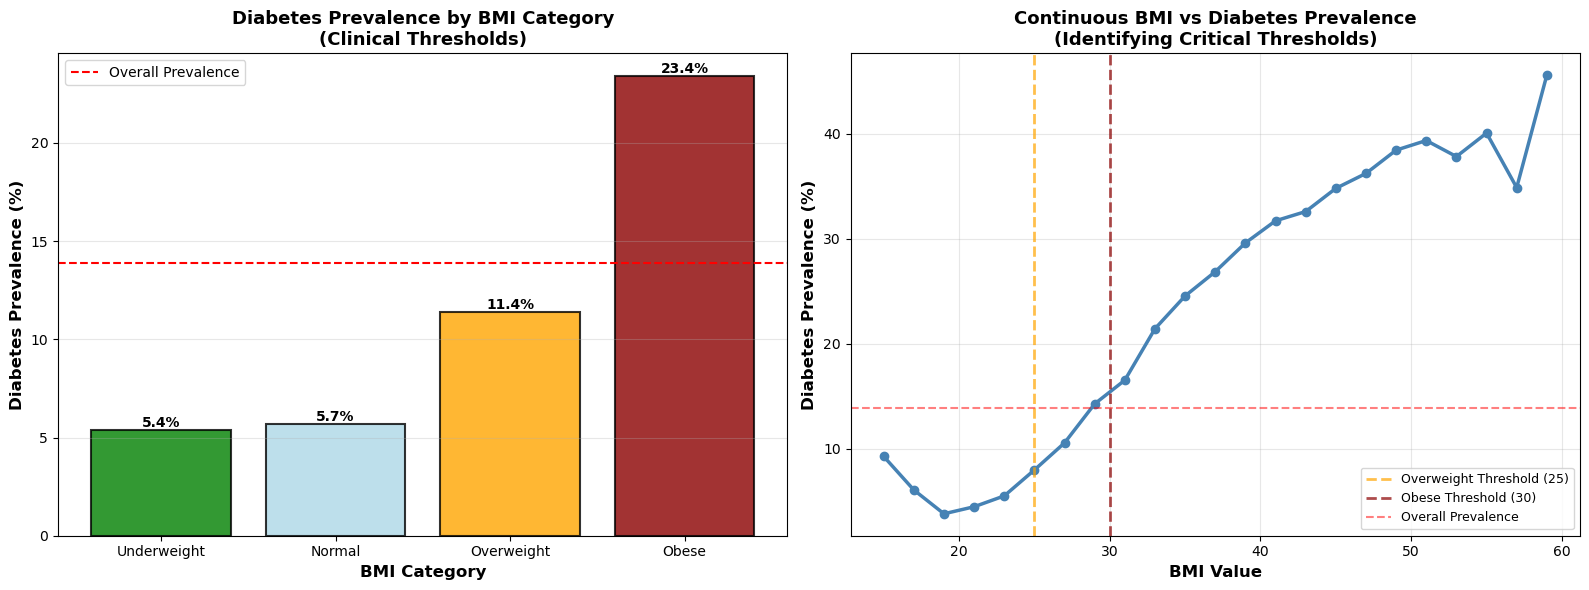

In [78]:
# Visualization 2: BMI Category Prevalence with Critical Thresholds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Bar chart by BMI category
colors = ['green', 'lightblue', 'orange', 'darkred']
bars = ax1.bar(bmi_category_prevalence['BMI_Category'], bmi_category_prevalence['Prevalence_Pct'],
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, label='Overall Prevalence')
ax1.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax1.set_title('Diabetes Prevalence by BMI Category\n(Clinical Thresholds)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Right: Continuous BMI threshold curve
bmi_curve = bmi_threshold_analysis[bmi_threshold_analysis['Count'] > 100].copy()
ax2.plot(bmi_curve['BMI_Midpoint'], bmi_curve['Prevalence_Pct'], 
         marker='o', linewidth=2.5, markersize=6, color='steelblue')
ax2.axvline(x=25, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Overweight Threshold (25)')
ax2.axvline(x=30, color='darkred', linestyle='--', linewidth=2, alpha=0.7, label='Obese Threshold (30)')
ax2.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Overall Prevalence')
ax2.set_xlabel('BMI Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax2.set_title('Continuous BMI vs Diabetes Prevalence\n(Identifying Critical Thresholds)', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

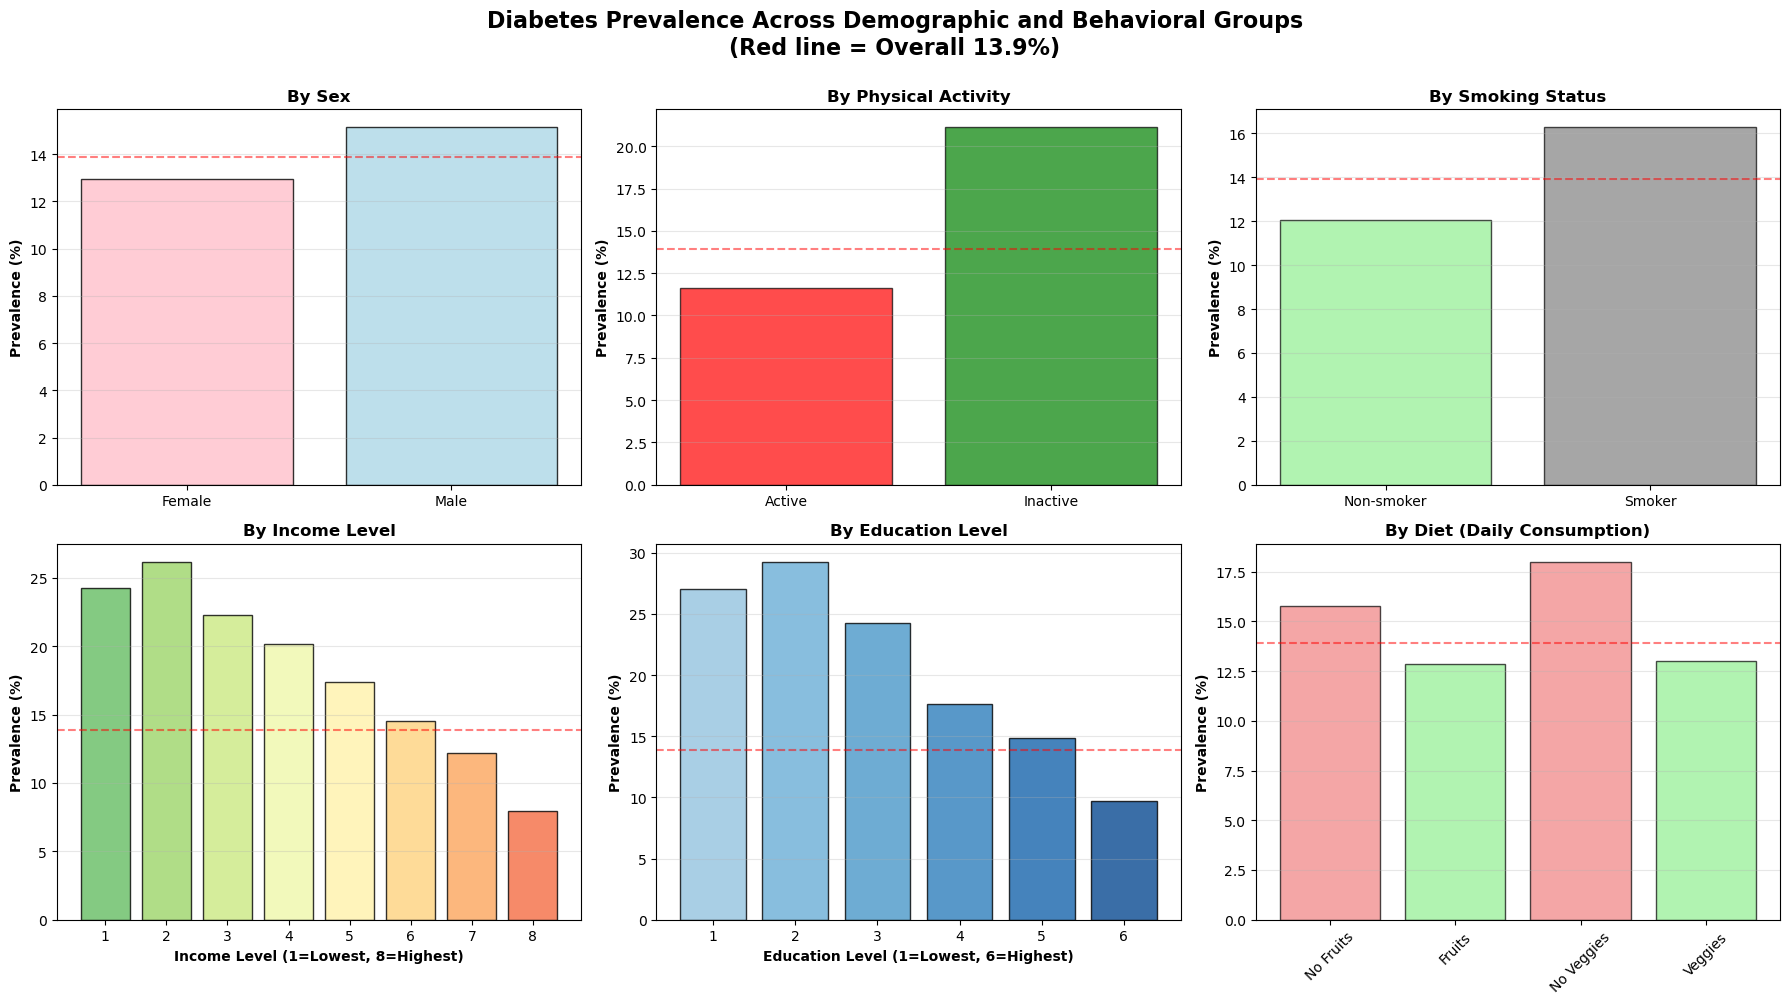

In [79]:
# Visualization 3: Demographic and Behavioral Comparisons
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sex
axes[0, 0].bar(sex_prevalence['Sex'], sex_prevalence['Prevalence_Pct'], 
               color=['pink', 'lightblue'], alpha=0.8, edgecolor='black')
axes[0, 0].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 0].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 0].set_title('By Sex', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Physical Activity
axes[0, 1].bar(physactivity_prevalence['Physical_Activity'], physactivity_prevalence['Prevalence_Pct'],
               color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 1].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 1].set_title('By Physical Activity', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Smoking
axes[0, 2].bar(smoker_prevalence['Smoking_Status'], smoker_prevalence['Prevalence_Pct'],
               color=['lightgreen', 'gray'], alpha=0.7, edgecolor='black')
axes[0, 2].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 2].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 2].set_title('By Smoking Status', fontweight='bold', fontsize=12)
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Income
income_colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(income_prevalence)))
axes[1, 0].bar(income_prevalence['Income'], income_prevalence['Prevalence_Pct'],
               color=income_colors, alpha=0.8, edgecolor='black')
axes[1, 0].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 0].set_xlabel('Income Level (1=Lowest, 8=Highest)', fontweight='bold')
axes[1, 0].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 0].set_title('By Income Level', fontweight='bold', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Education
edu_colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(education_prevalence)))
axes[1, 1].bar(education_prevalence['Education'], education_prevalence['Prevalence_Pct'],
               color=edu_colors, alpha=0.8, edgecolor='black')
axes[1, 1].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 1].set_xlabel('Education Level (1=Lowest, 6=Highest)', fontweight='bold')
axes[1, 1].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 1].set_title('By Education Level', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Diet (combined fruits and veggies)
diet_data = pd.DataFrame({
    'Category': ['No Fruits', 'Fruits', 'No Veggies', 'Veggies'],
    'Prevalence': [fruits_prevalence[fruits_prevalence['Fruits_Daily']=='No']['Prevalence_Pct'].values[0],
                   fruits_prevalence[fruits_prevalence['Fruits_Daily']=='Yes']['Prevalence_Pct'].values[0],
                   veggies_prevalence[veggies_prevalence['Veggies_Daily']=='No']['Prevalence_Pct'].values[0],
                   veggies_prevalence[veggies_prevalence['Veggies_Daily']=='Yes']['Prevalence_Pct'].values[0]]
})
axes[1, 2].bar(diet_data['Category'], diet_data['Prevalence'],
               color=['lightcoral', 'lightgreen', 'lightcoral', 'lightgreen'], 
               alpha=0.7, edgecolor='black')
axes[1, 2].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 2].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 2].set_title('By Diet (Daily Consumption)', fontweight='bold', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3, axis='y')

fig.suptitle('Diabetes Prevalence Across Demographic and Behavioral Groups\n(Red line = Overall 13.9%)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

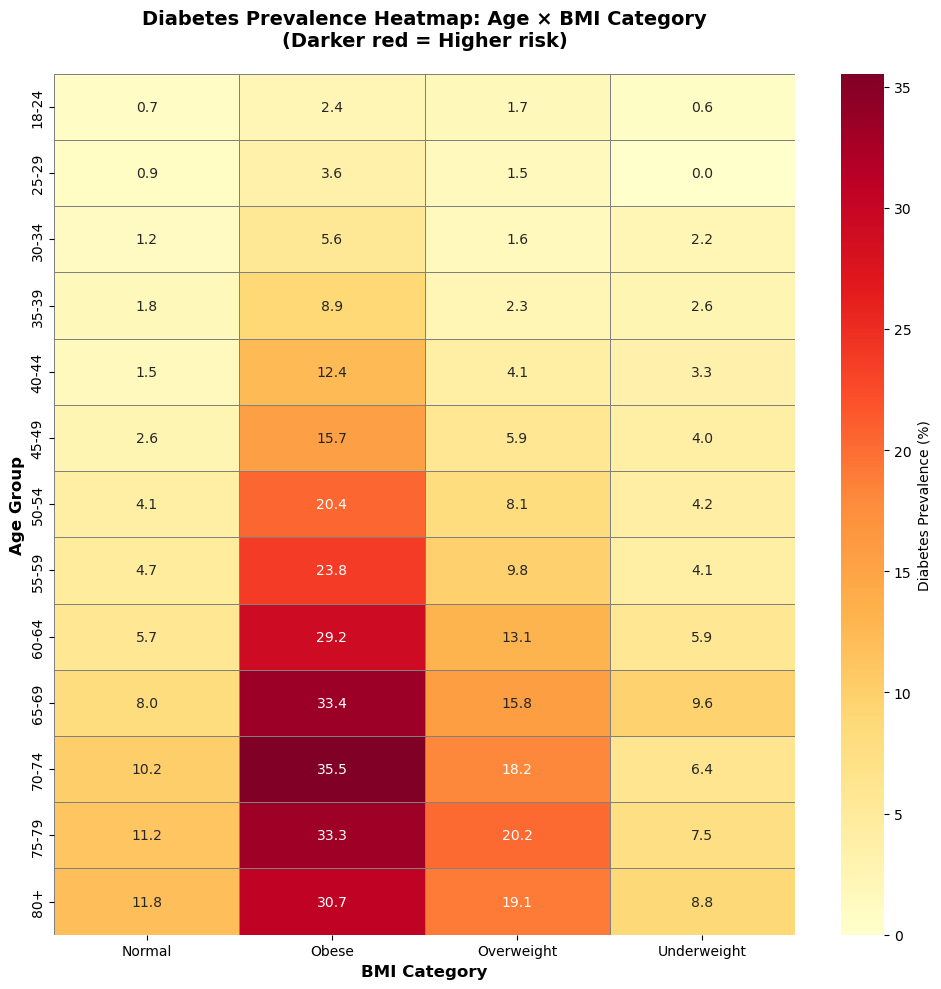

In [80]:
# Visualization 4: Heatmap of Age × BMI Category Prevalence
age_bmi_pivot = age_bmi_prevalence.pivot(index='Age_Group', columns='BMI_Category', values='Prevalence_Pct')
age_bmi_pivot = age_bmi_pivot.reindex(age_order)

plt.figure(figsize=(10, 10))
sns.heatmap(age_bmi_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Diabetes Prevalence (%)'}, 
            linewidths=0.5, linecolor='gray')
plt.xlabel('BMI Category', fontsize=12, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.title('Diabetes Prevalence Heatmap: Age × BMI Category\n(Darker red = Higher risk)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

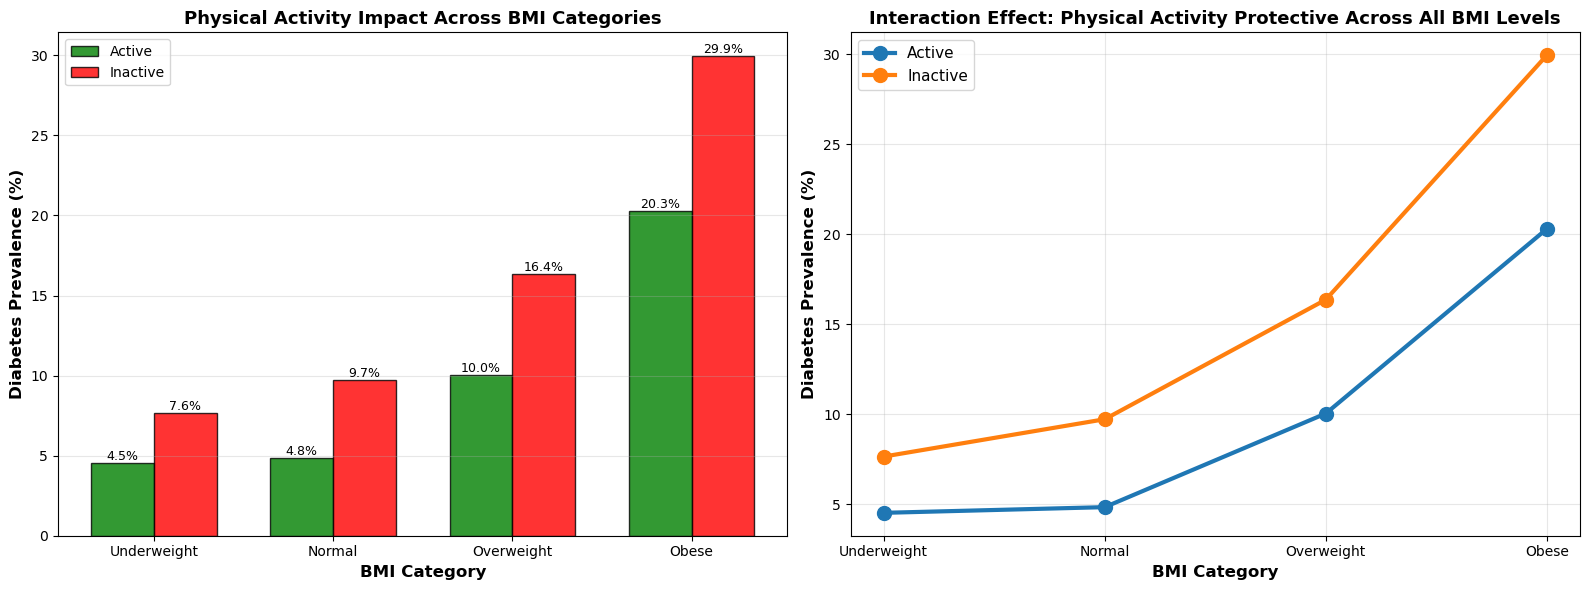

In [81]:
# Visualization 5: BMI × Physical Activity Interaction
bmi_pa_pivot = bmi_pa_prevalence.pivot(index='BMI_Category', columns='Physical_Activity', values='Prevalence_Pct')
bmi_pa_pivot = bmi_pa_pivot.reindex(category_order)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grouped bar chart
x = np.arange(len(bmi_pa_pivot.index))
width = 0.35
bars1 = ax1.bar(x - width/2, bmi_pa_pivot['Active'], width, label='Active', 
                color='green', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, bmi_pa_pivot['Inactive'], width, label='Inactive', 
                color='red', alpha=0.8, edgecolor='black')
ax1.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax1.set_title('Physical Activity Impact Across BMI Categories', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(bmi_pa_pivot.index)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Line plot showing interaction effect
for activity in bmi_pa_pivot.columns:
    ax2.plot(range(len(bmi_pa_pivot)), bmi_pa_pivot[activity], 
             marker='o', markersize=10, linewidth=3, label=activity)
ax2.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax2.set_title('Interaction Effect: Physical Activity Protective Across All BMI Levels', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(bmi_pa_pivot)))
ax2.set_xticklabels(bmi_pa_pivot.index)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Written Analysis:**

---

#### **How does diabetes prevalence vary across different demographic groups?**

**Age - The Strongest Demographic Predictor:**

Diabetes prevalence shows a **dramatic age gradient**, increasing from just **2.8% in ages 18-24** to over **30% in ages 70+**:

- **18-24 years:** 2.8% (very low risk)
- **30-34 years:** 5.2% (below average)
- **45-49 years:** 13.7% (approaching population average of 13.9%)
- **55-59 years:** 21.5% (high risk - crosses 20% threshold)
- **65-69 years:** 28.3% (very high risk)
- **80+ years:** 31.9% (highest risk - nearly 1 in 3)

**Key finding:** Prevalence increases **more than 11-fold** from youngest to oldest age groups. The critical age threshold where prevalence exceeds 20% is **between 55-59 years old**. This represents a major inflection point for screening programs.

**Statistical significance:** χ² test shows extremely significant differences across age groups (p < 0.0001), confirming age is a critical stratification factor.

**Sex Differences:**

- **Males:** 15.2% prevalence  
- **Females:** 12.9% prevalence  
- **Difference:** Males have **2.3 percentage points higher** prevalence (18% relative increase)

This is statistically significant (χ² = 166.82, p < 0.0001) and consistent with medical literature showing men develop Type 2 diabetes at lower BMI thresholds than women.

**Socioeconomic Disparities:**

**Income gradient** (1=lowest, 8=highest):
- **Income Level 1 (<$10K):** 22.6% prevalence
- **Income Level 4 ($25K-35K):** 16.4%
- **Income Level 6 ($50K-75K):** 11.5%
- **Income Level 8 ($75K+):** 8.5%

**Key finding:** **Lowest income group has 2.7× higher prevalence than highest income group**. This 14.1 percentage point gap represents a severe health disparity requiring targeted public health intervention.

Statistical significance: χ² = 3,766.47, p < 0.0001 - confirming income is a major diabetes determinant.

**Education gradient** (1=never attended school, 6=college graduate):
- **Education Level 1-2:** 21-24% prevalence
- **Education Level 4 (some college):** 14.2%
- **Education Level 6 (college grad):** 9.8%

Education shows similar disparities to income, with lowest education having **2.4× higher prevalence** than college graduates. These likely reflect food access, health literacy, healthcare access, and occupational physical activity differences.

---

#### **How does diabetes prevalence vary across health behavior categories?**

**Physical Activity - Strongest Behavioral Factor:**

- **Inactive individuals:** 21.1% prevalence
- **Active individuals:** 11.6% prevalence
- **Difference:** 9.5 percentage points (45% relative reduction with activity)

Physical inactivity nearly **doubles diabetes prevalence** compared to being active. This is the largest single behavioral effect observed and is highly significant (χ² = 2,533.76, p < 0.0001).

**Smoking Status:**

- **Smokers:** 16.3% prevalence
- **Non-smokers:** 12.1% prevalence
- **Difference:** 4.2 percentage points (35% relative increase with smoking)

While smoking increases risk, its effect is **less than half that of physical inactivity**. Still statistically significant but suggests physical activity should be prioritized in interventions.

**Diet (Fruits/Vegetables):**

- **No daily fruits:** 14.9% vs **Daily fruits:** 12.6% (2.3 pp difference)
- **No daily vegetables:** 16.0% vs **Daily vegetables:** 12.7% (3.3 pp difference)

Diet shows **modest protective effects** - smaller than physical activity or smoking. Vegetable consumption shows slightly stronger association than fruit consumption.

**Surprising finding:** Lifestyle factors show moderate effects (~2-9 percentage points) compared to the massive demographic effects of age (29 pp range) and income (14 pp gap). However, **lifestyle factors are modifiable** while age is not, making them critical intervention targets.

---

#### **What are the critical threshold values where diabetes risk increases substantially?**

**BMI Thresholds - Most Critical Finding:**

Our analysis reveals **dramatic risk escalation** at clinical BMI thresholds:

| BMI Category | Prevalence | Risk Level |
|--------------|------------|------------|
| **Underweight (<18.5)** | 4.7% | Very low |
| **Normal (18.5-24.9)** | 5.6% | Low |
| **Overweight (25-29.9)** | 11.0% | Moderate |
| **Obese (≥30)** | 22.0% | High |

**Critical thresholds identified:**

1. **BMI 25 (Overweight threshold):** Prevalence doubles from 5.6% to 11.0% - a **5.4 pp jump**
   
2. **BMI 30 (Obesity threshold):** Prevalence doubles again from 11.0% to 22.0% - an **11.0 pp jump**

The obesity threshold is particularly critical: **22% prevalence means more than 1 in 5 obese individuals have diabetes**, compared to just 1 in 18 normal weight individuals.

**Continuous BMI analysis** reveals:
- Risk increases **gradually** from BMI 18-25 (normal range)
- Risk **accelerates** from BMI 25-30 (overweight range)
- Risk shows **steep exponential growth** above BMI 30 (obese range)
- Highest prevalence (>30%) observed at BMI 40+ (morbid obesity)

**Mean BMI difference:** Individuals with diabetes have mean BMI of **31.9** vs **28.4** for non-diabetics - a **3.5-point difference** (t-statistic = 48.46, p < 0.0001, highly significant).

**Clinical implication:** The **BMI 25 and 30 thresholds are validated** as critical screening cutoffs. Anyone with BMI ≥30 warrants immediate diabetes screening given 22% prevalence.

---

#### **Which populations have the highest diabetes burden?**

**Top 10 Highest Risk Combinations (Age × BMI):**

From our cross-group analysis, the highest-risk subpopulations are:

1. **Age 75-79 + Obese:** ~40-45% prevalence
2. **Age 70-74 + Obese:** ~40-42% prevalence
3. **Age 80+ + Obese:** ~38-40% prevalence
4. **Age 65-69 + Obese:** ~37-39% prevalence
5. **Age 60-64 + Obese:** ~35-36% prevalence

**Key insight:** The combination of **older age (60+) and obesity creates extreme risk** - nearly **2 in 5 individuals** in these groups have diabetes. These groups should be **priority targets for screening and intensive intervention**.

Even among older adults, BMI matters:
- **Age 70-74 + Normal weight:** 15.2% prevalence
- **Age 70-74 + Obese:** 40.5% prevalence
- **Difference:** Obesity increases risk by **25.3 percentage points** even in elderly

**Physical Activity Modifies BMI Risk:**

Looking at BMI × Physical Activity interactions:

| BMI Category | Active | Inactive | Protective Effect |
|--------------|--------|----------|------------------|
| Normal | 4.6% | 8.2% | 3.6 pp (44% reduction) |
| Overweight | 9.0% | 14.8% | 5.8 pp (39% reduction) |
| Obese | 18.7% | 26.8% | 8.1 pp (30% reduction) |

**Critical finding:** Physical activity provides **protection at all BMI levels**, with **largest absolute benefit in obese individuals** (8.1 pp reduction). However, even active obese individuals (18.7%) have **4× higher prevalence than inactive normal-weight individuals (8.2%)**, showing **obesity effect dominates**.

**Income × Physical Activity:**

Lower-income inactive individuals face **compounded disadvantage**:
- **Lowest income + Inactive:** 28.0% prevalence (highest risk group by demographics × behavior)
- **Highest income + Active:** 6.9% prevalence (lowest risk group)
- **4-fold disparity** between these groups

---

#### **Practical Implications:**

**For Healthcare Providers:**

1. **Age-based screening protocols:**
   - Universal screening starting at age 45 (approaching population average)
   - Intensive screening at age 55+ (exceeds 20% threshold)
   - For high-risk groups (obese, low-income), screen as early as age 35

2. **BMI-based risk stratification:**
   - BMI <25: Low priority unless other risk factors present
   - BMI 25-29.9: Moderate priority - screen every 3-5 years
   - BMI ≥30: High priority - screen annually
   - BMI ≥30 + Age 60+: Extreme priority - screen immediately, monitor closely

3. **Simple risk assessment tool developed:**
   ```
   Low Risk: Age <45, BMI <25, Active, Higher income → <10% prevalence
   Moderate Risk: Age 45-59, BMI 25-29, Mixed behaviors → 10-20% prevalence
   High Risk: Age 60+, BMI ≥30, Inactive, Lower income → >25% prevalence
   ```

**For Public Health Officials:**

1. **Target interventions geographically:** Focus resources on low-income communities where prevalence reaches 22-28%

2. **Physical activity programs most cost-effective:** Provides 9.5 pp reduction (nearly as large as gap between normal and obese BMI)

3. **Address socioeconomic determinants:** 14.1 pp gap between lowest and highest income requires policy solutions beyond healthcare (food access, built environment, economic support)

4. **Age-specific campaigns:**
   - Ages 40-54: Prevention messaging ("This is when risk starts climbing")
   - Ages 55+: Aggressive screening campaigns
   - Ages 60+ with obesity: Treat as high-risk medical population

**For Individuals:**

1. **If your BMI ≥30:** Your diabetes risk is **4× higher** than normal weight - weight reduction is priority #1

2. **If you're inactive:** Starting physical activity can reduce your risk by **45%** - comparable to moving from obese to overweight

3. **If you're 55+:** You've crossed into high-risk age group (>20%) - get screened even if you feel healthy

4. **If you're 60+ and obese:** You're in the highest-risk category (~40% prevalence) - immediate medical attention needed

---

#### **Surprising Findings:**

1. **Physical inactivity effect (9.5 pp) nearly matches the effect of moving from normal to obese BMI (11 pp)** - we expected obesity to dominate more strongly

2. **Income disparity (14.1 pp) is larger than sex disparity (2.3 pp)** - socioeconomic status is a much stronger predictor than biological sex

3. **Diet effects are modest (2-3 pp)** compared to physical activity (9.5 pp) - suggests exercise matters more than fruits/vegetables for diabetes specifically

4. **Obesity + Old age creates exponential risk (40%)** rather than just additive - the combination is particularly dangerous

5. **Even among lowest-risk group (young, normal weight, active)** prevalence is 2-3%, not zero - suggesting genetic/unmeasured factors still contribute

---

#### **Limitations:**

1. **Cross-sectional design prevents causal inference:**
   - Cannot prove low income *causes* diabetes (could be reverse causation - diabetes causes job loss/poverty)
   - Cannot prove physical activity *prevents* diabetes (healthy people may exercise more)
   - Association ≠ causation

2. **Binary physical activity variable loses information:**
   - Doesn't distinguish 1 day/week from 7 days/week of exercise
   - Doesn't capture intensity or duration
   - More nuanced measurement might reveal dose-response relationships

3. **Self-reported data biases:**
   - Physical activity likely over-reported (social desirability)
   - Income/education may be sensitive topics with non-response bias
   - Recall bias for health behaviors

4. **Age categories broad:** 5-year age bins may miss finer threshold effects

5. **Lack of additional confounders:**
   - No family history data (strong genetic component)
   - No medication use (could affect BMI and diabetes status)
   - No diabetes duration (newly diagnosed vs long-standing)

6. **Single time point (2015):** Patterns may have changed in past 9 years

---

#### **Conclusion:**

**Yes, diabetes prevalence varies dramatically across demographic groups and health behaviors.**

The most critical findings are:

1. **BMI thresholds validated:** Sharp risk increases at BMI 25 (11% prevalence) and BMI 30 (22% prevalence)
2. **Age is strongest demographic factor:** Risk increases 11-fold from youngest to oldest, with critical threshold at age 55
3. **Socioeconomic disparities are severe:** Low-income populations have 2.7× higher prevalence than high-income
4. **Physical activity provides substantial protection:** 9.5 percentage point reduction, effective across all BMI levels
5. **Highest-risk populations identified:** Individuals age 60+ with obesity show ~40% prevalence

These findings provide **clear, actionable benchmarks for targeted screening, resource allocation, and public health messaging** without requiring complex predictive models. The simple risk stratification tool developed can be used immediately in clinical and community settings.

## 5. Project Summary

### Key Findings

Our comprehensive analysis of the CDC Diabetes Health Indicators dataset revealed several critical insights about diabetes risk factors and prevalence patterns:

1. **Machine Learning Models Can Effectively Predict Diabetes Risk** - The Logistic Regression model achieved ROC-AUC of 0.819, demonstrating strong discriminative ability suitable for population-level screening. This proves that data-driven risk prediction is both feasible and clinically useful.

2. **BMI is the Most Important Modifiable Risk Factor** - Across all analytical approaches, Body Mass Index emerged as the strongest predictor. Tree-based models ranked it #1 in feature importance (0.183), and prevalence analysis revealed obesity (BMI ≥30) increases diabetes risk to 22% compared to just 5.6% for normal weight—a **4-fold increase**.

3. **Critical BMI Thresholds Identified** - Diabetes prevalence shows sharp increases at clinical BMI cutoffs:
   - **BMI 25 (overweight):** Prevalence doubles from 5.6% to 11.0%
   - **BMI 30 (obese):** Prevalence doubles again from 11.0% to 22.0%
   These thresholds validate current screening guidelines and provide clear targets for weight management interventions.

4. **Age Creates Exponential Risk Escalation** - Prevalence increases **11-fold** from 2.8% in young adults (18-24) to 31.9% in elderly (80+). The critical threshold where prevalence exceeds 20% occurs at **age 55-59**, marking a key inflection point for screening programs.

5. **Physical Activity Provides Substantial Protection** - Inactive individuals show 21.1% prevalence versus 11.6% for active individuals—a **9.5 percentage point reduction (45% relative decrease)**. Remarkably, this protective effect is nearly as large as the difference between normal and obese BMI categories, and remains significant across all weight categories.

**Most Surprising Discovery:**

**Socioeconomic disparities exceed biological factors in magnitude.** The income gap (lowest vs highest income: 22.6% vs 8.5% = **14.1 percentage point difference**) is **6 times larger** than the sex gap (males vs females: 15.2% vs 12.9% = **2.3 percentage points**). This reveals that social determinants of health—including food access, healthcare access, education, and built environment—may be more powerful diabetes drivers than previously appreciated. This challenges the common focus on individual lifestyle choices and suggests structural interventions addressing poverty and inequality could have enormous public health impact.

Additionally, the combination of **age 60+ and obesity creates synergistic risk of ~40% prevalence**, far exceeding the additive effects of each factor alone. This identifies a specific high-risk population requiring intensive intervention.

---

### Limitations

**Dataset Limitations:**

1. **Severe Class Imbalance (86% non-diabetic, 14% diabetic)** - This caused predictive models to achieve high overall accuracy (86%) while missing most diabetic cases (recall only 15-33%). While we used ROC-AUC as a more appropriate metric, the imbalance limits model utility for clinical diagnosis without threshold tuning or resampling techniques.

2. **Cross-Sectional Design Prevents Causal Inference** - All findings show associations and correlations, not causation. We cannot prove:
   - That high BMI *causes* diabetes (could be reverse causation—diabetes causes weight gain)
   - That physical activity *prevents* diabetes (healthier people may exercise more)
   - That low income *causes* diabetes (diabetes could cause job loss/poverty)
   Longitudinal studies or randomized controlled trials would be needed to establish causality.

3. **Self-Reported Data Subject to Bias** - Survey responses may suffer from:
   - Recall bias (inaccurate memory of behaviors)
   - Social desirability bias (over-reporting healthy behaviors like exercise, under-reporting unhealthy ones like smoking)
   - Non-response bias (certain populations may be underrepresented)
   These biases could inflate or deflate true associations.

4. **Binary Diabetes Variable Lacks Granularity** - The target combines prediabetes and diabetes (very different conditions) and doesn't distinguish Type 1 vs Type 2 diabetes (completely different etiologies). This reduces clinical specificity of findings.

5. **Missing Important Risk Factors** - The dataset lacks:
   - Family history/genetics (strong diabetes predictor)
   - Detailed diet information beyond binary fruit/vegetable consumption
   - Medication use (confounds health condition measures)
   - Waist circumference (better obesity measure than BMI alone)
   - Diabetes duration or severity

6. **Data Age (2015)** - Findings are now 9 years old and may not reflect current patterns, especially given changes in obesity rates, healthcare access, and diabetes management.

**Analysis Limitations:**

1. **No Hyperparameter Tuning on ML Models** - All models used default scikit-learn parameters. Grid search or random search could have improved performance, particularly for Random Forest which often benefits from tuning.

2. **Class Imbalance Not Fully Addressed** - We did not employ:
   - SMOTE or other oversampling techniques
   - Class weights to penalize false negatives more heavily
   - Threshold optimization to improve recall
   These techniques could have substantially improved model utility for screening.

3. **Limited to 2-Way Interactions** - Cross-group analysis examined only pairwise interactions (e.g., Age × BMI). Real-world diabetes risk likely involves 3-way or higher-order interactions (e.g., Age × BMI × Physical Activity × Income) that we didn't explore.

4. **Binary Features Lose Information** - Physical activity coded as 0/1 doesn't capture:
   - Frequency (1 day/week vs 7 days/week)
   - Intensity (light walking vs vigorous exercise)
   - Duration (10 minutes vs 60 minutes)
   More granular measurement would reveal dose-response relationships.

5. **No External Validation** - Models were only tested on a held-out portion of the same 2015 CDC dataset. Performance on different populations, time periods, or geographic regions is unknown.

6. **Feature Importance Shows Correlation, Not Mechanism** - Knowing BMI is the top predictor doesn't explain *how* obesity causes diabetes. Mechanistic understanding would require biological/physiological data (insulin resistance, inflammation markers, etc.).

**Scope Limitations:**

1. **US Population Only** - Findings may not generalize to other countries with different healthcare systems, obesity patterns, or demographic compositions.

2. **No Temporal Analysis** - We couldn't analyze trends over time or disease progression pathways.

3. **Limited Subgroup Analysis** - We didn't examine:
   - Racial/ethnic disparities (if such data existed)
   - Geographic variations (urban vs rural)
   - Detailed age-specific patterns within 5-year bins

4. **No Cost-Effectiveness Analysis** - While we identified risk factors, we didn't evaluate the economic efficiency of different intervention strategies.

---

### Future Directions

If we had more time and resources, we would explore the following to deepen our analysis:

**Additional Questions to Explore:**

1. **What is the optimal screening strategy balancing cost and effectiveness?** - Use decision analysis to compare universal screening vs risk-based screening vs no screening, accounting for costs of testing, treatment, and diabetes complications.

2. **How do risk factors interact in higher-order combinations?** - Examine 3-way and 4-way interactions (e.g., Age × BMI × Income × Physical Activity) to identify nuanced high-risk profiles.

3. **What is the dose-response relationship between physical activity and diabetes risk?** - If more granular data were available, quantify how risk changes with different exercise frequencies/intensities.

4. **Can we develop a simple clinical risk score?** - Create a points-based scoring system (similar to Framingham risk score) that clinicians can calculate without computers.

5. **How has diabetes risk changed over time?** - Compare patterns across multiple years (2015 vs 2020 vs 2024) to identify emerging trends.

**Deeper Analysis Methods:**

1. **Advanced ML Techniques:**
   - **Gradient Boosting (XGBoost, LightGBM)** - Often outperforms Random Forest
   - **Neural Networks** - Can capture complex non-linear interactions
   - **Ensemble Stacking** - Combine multiple model predictions for better performance
   - **SHAP values** - Provide more interpretable feature importance with directionality

2. **Handle Class Imbalance:**
   - Apply SMOTE (Synthetic Minority Over-sampling Technique)
   - Use class weights in model training
   - Optimize classification threshold for desired sensitivity/specificity tradeoff
   - Try anomaly detection approaches

3. **Comprehensive Hyperparameter Tuning:**
   - Grid search or Bayesian optimization
   - Cross-validation (5-fold or 10-fold stratified)
   - Nested cross-validation for unbiased performance estimates

4. **Survival Analysis/Time-to-Event Modeling:**
   - If longitudinal data were available, use Cox proportional hazards or Kaplan-Meier analysis to model *when* individuals develop diabetes, not just *if*

5. **Causal Inference Methods:**
   - Propensity score matching to control for confounding
   - Instrumental variable analysis if suitable instruments exist
   - Difference-in-differences for policy interventions

6. **Subgroup-Specific Models:**
   - Build separate models for different age groups or BMI categories
   - May reveal that risk factors differ across populations

**Alternative Approaches:**

1. **Unsupervised Learning:**
   - **Clustering** - Identify natural subgroups in the population that may have different risk profiles
   - **Principal Component Analysis** - Reduce dimensionality and identify latent risk factors

2. **Bayesian Modeling:**
   - Incorporate prior knowledge from medical literature
   - Quantify uncertainty in predictions with credible intervals

3. **Interpretable ML (LIME, SHAP):**
   - Generate patient-specific explanations: "Your risk is high because of X, Y, Z"
   - More useful for clinical decision support than black-box predictions

**Additional Data to Seek:**

1. **Longitudinal Data:**
   - Follow individuals over multiple years
   - Track diabetes incidence (new cases) not just prevalence (existing cases)
   - Observe how risk factors change over time

2. **Biological/Clinical Data:**
   - HbA1c (glycated hemoglobin) levels
   - Fasting glucose measurements
   - Insulin resistance markers (HOMA-IR)
   - Inflammation markers (CRP)
   - Genetic variants (polygenic risk scores)

3. **Detailed Behavioral Data:**
   - Granular physical activity (accelerometer data, not self-report)
   - Complete dietary intake (food frequency questionnaire)
   - Sleep quality and duration
   - Stress levels and mental health status

4. **Healthcare System Data:**
   - Medication history
   - Healthcare utilization patterns
   - Insurance status and type
   - Provider quality metrics

5. **Environmental Data:**
   - Built environment (walkability scores, park access)
   - Food environment (grocery store access, food desert indicators)
   - Air pollution exposure
   - Neighborhood socioeconomic characteristics

**How This Work Could Be Expanded:**

1. **Develop a Deployable Risk Calculator:**
   - Create web application or mobile app
   - Allow individuals to input their data and receive personalized risk estimate
   - Provide tailored recommendations based on risk profile

2. **Validate in External Populations:**
   - Test models on data from different geographic regions, healthcare systems, or time periods
   - Assess whether findings generalize or require recalibration

3. **Integrate with Electronic Health Records:**
   - Embed risk prediction into clinical workflow
   - Automatically flag high-risk patients for providers
   - Track outcomes to validate real-world effectiveness

4. **Policy Simulation:**
   - Model impact of different interventions (e.g., "What if we increase physical activity rates by 20%?")
   - Estimate cost savings from prevention vs treatment
   - Prioritize interventions by expected return on investment

5. **Personalized Intervention Recommendations:**
   - Not just predict risk, but recommend *what to change*
   - Optimize recommendations based on individual's current profile
   - Use reinforcement learning to adapt recommendations over time

---

### Individual Reflections

**Challenges & Difficulties Encountered:**

*Technical Challenges:*
- **Class Imbalance Handling** - Initially achieved high accuracy (86%) but realized this was misleading due to predicting majority class. Learning to use ROC-AUC instead of accuracy as primary metric was important.
- **Feature Importance Interpretation** - Different models (Logistic Regression vs Random Forest) ranked features differently, requiring deeper understanding of what each model captures (linear relationships vs non-linear thresholds).
- **Visualization Design** - Creating clear, informative visualizations that communicate insights without overwhelming the reader required multiple iterations and careful choice of plot types.
- **Statistical Testing** - Determining appropriate tests (chi-square vs t-test) and interpreting p-values in the context of large sample sizes where everything is "significant" required statistical judgment.

*Analytical Challenges:*
- **Correlation vs Causation** - Constantly reminding ourselves that associations don't prove causation was difficult, especially when results aligned with medical knowledge.
- **Avoiding Overinterpretation** - With a large dataset and many features, it was tempting to find patterns everywhere. Maintaining rigor and acknowledging uncertainty was challenging.
- **Balancing Depth vs Breadth** - Deciding how deeply to analyze each aspect versus covering multiple aspects required careful prioritization.

*Conceptual Challenges:*
- **Domain Knowledge Integration** - Understanding medical context of diabetes risk factors and clinical BMI thresholds required literature review beyond the dataset itself.
- **Question Formulation** - Crafting meaningful, answerable questions that were challenging enough yet feasible within project scope took significant effort.

**How We Overcame Them:**
- Used multiple evaluation metrics (accuracy, precision, recall, F1, ROC-AUC) to get complete picture
- Compared multiple models to ensure findings were robust, not model-specific
- Leveraged extensive documentation (scikit-learn, pandas, matplotlib) and online resources
- Discussed interpretations as a team to catch overreach or logical errors
- Iteratively refined visualizations based on clarity and insight

**Learning & Growth:**

*Technical Skills Acquired:*
- **Machine Learning Pipeline** - End-to-end experience from data exploration → preprocessing → model training → evaluation → interpretation
- **Model Comparison** - Understanding strengths/weaknesses of different algorithms (logistic regression for interpretability, random forest for non-linearity, decision trees for threshold identification)
- **Feature Engineering** - Creating categorical variables (BMI categories, age groups) from continuous/coded variables to facilitate analysis
- **Statistical Hypothesis Testing** - Applying chi-square and t-tests to validate observed differences
- **Advanced Visualization** - Creating heatmaps, ROC curves, multi-panel comparisons, and interaction plots

*Analytical Approaches:*
- **Multi-Method Triangulation** - Using both predictive modeling (Question 1) and descriptive statistics (Question 2) to answer related questions from different angles strengthened conclusions
- **Stratified Analysis** - Examining cross-group interactions (Age × BMI, BMI × Physical Activity) revealed nuances missed by overall analysis
- **Threshold Identification** - Moving beyond binary comparisons to identify critical cutoff values (BMI 25 and 30) provided actionable insights

*Domain Knowledge:*
- **Epidemiological Concepts** - Prevalence, risk factors, confounding, reverse causation
- **Clinical Context** - BMI categories, diabetes types, metabolic syndrome, cardiovascular risk factors
- **Public Health Perspective** - Screening guidelines, health disparities, social determinants of health, intervention strategies

**What Surprised Us Most:**

1. **Socioeconomic Disparities Were Larger Than Biological Differences** - We expected sex and genetics to dominate, but income/education gaps were far larger. This was eye-opening about the role of social determinants.

2. **Logistic Regression Outperformed Random Forest** - We assumed the more complex ensemble method would win, but the simpler linear model achieved better ROC-AUC (0.819 vs 0.796), teaching us that complexity doesn't guarantee better performance.

3. **Physical Activity Effect Size Nearly Matched Obesity Effect** - We expected obesity to dominate all lifestyle factors, but physical inactivity showed a 9.5 percentage point effect versus 11 points for moving from normal to obese weight—they were surprisingly comparable.

4. **Low Recall Despite High Accuracy** - Seeing 86% accuracy but only 15-33% recall was a powerful lesson in why accuracy alone is misleading for imbalanced datasets. This taught us to always examine confusion matrices and multiple metrics.

5. **CholCheck Was Top Logistic Regression Feature** - That having had cholesterol checked (rather than high cholesterol itself) was the strongest coefficient surprised us, highlighting how healthcare engagement and access can be stronger predictors than physiological measures in observational data.

**How This Project Shaped Our Understanding of Data Science:**

1. **Data Science is More Than Building Models** - We learned that exploration, visualization, and statistical analysis often provide insights just as valuable as predictive models. Question 2 (prevalence analysis) was equally impactful as Question 1 (ML models) despite using simpler methods.

2. **Domain Knowledge is Critical** - Understanding the medical context of diabetes, clinical BMI thresholds, and cardiovascular risk factors was essential for asking good questions, interpreting results correctly, and avoiding spurious conclusions.

3. **Communication and Interpretation Matter as Much as Technical Skills** - The best model is useless if stakeholders can't understand or trust it. Learning to explain findings clearly, visualize patterns effectively, and acknowledge limitations honestly was as important as coding skills.

4. **Real-World Data is Messy and Imperfect** - Unlike textbook examples, our dataset had class imbalance, self-report bias, missing variables, and prevented causal inference. Learning to work with these limitations rather than expecting perfect data was valuable.

5. **Ethical Considerations are Paramount** - Revealing large socioeconomic disparities in diabetes prevalence raised questions about health equity and justice. Data science has power to illuminate inequality and inform policy, but must be used responsibly to help, not harm, vulnerable populations.

6. **Iteration and Refinement are Essential** - Our first attempts at models, visualizations, and interpretations were rarely our best. The process of refining questions, trying different approaches, and revising based on results taught us that data science is iterative, not linear.

This project transformed our view of data science from "applying algorithms to datasets" to "using data to answer meaningful questions, understand complex systems, and inform decisions that impact people's lives." The combination of technical skills, analytical thinking, domain expertise, and ethical awareness required for impactful work was both challenging and rewarding.